In [1]:
import numpy as np
import pandas as pd 
import cv2
import PIL
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import glob
import random
import os
from os import listdir
random.seed(100)
np.random.seed(100)
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d awsaf49/cbis-ddsm-breast-cancer-image-dataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
100% 4.95G/4.95G [02:52<00:00, 34.4MB/s]
100% 4.95G/4.95G [02:52<00:00, 30.9MB/s]


In [ ]:
!unzip /content/cbis-ddsm-breast-cancer-image-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295326067813319071803507885093865003464/1-076.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/1-265.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295334798611650724727702371150477767947/2-266.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295360926313492745441868049270168300162/1-067.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295394441612082321922200964343746626621/1-002.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295397487412067903910787953980192002590/1-233.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/1-294.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295400289412664594307776853882592114725/2-223.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/1-013.jpg  
  inflating: jpeg/1.3.6.1.4.1.9590.100.1.2.295438974411063274614777547962485322182/2-012.jpg  

In [ ]:
!kaggle datasets download -d paultimothymooney/breast-histopathology-images

100% 3.10G/3.10G [01:41<00:00, 42.9MB/s]
100% 3.10G/3.10G [01:41<00:00, 32.7MB/s]


In [ ]:
!unzip /content/breast-histopathology-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2251_class0.png  
  inflating: IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2301_class0.png  
  inflating: IDC_regular_

In [3]:
dicom_data = pd.read_csv('/content/dicom_info.csv')
dicom_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [4]:
dicom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 38 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   file_path                                    10237 non-null  object 
 1   image_path                                   10237 non-null  object 
 2   AccessionNumber                              0 non-null      float64
 3   BitsAllocated                                10237 non-null  int64  
 4   BitsStored                                   10237 non-null  int64  
 5   BodyPartExamined                             10237 non-null  object 
 6   Columns                                      10237 non-null  int64  
 7   ContentDate                                  10237 non-null  int64  
 8   ContentTime                                  10237 non-null  float64
 9   ConversionType                               10237 non-null  object 
 10

In [5]:
cropped_images=dicom_data[dicom_data.SeriesDescription == 'cropped images'].image_path
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

In [6]:
image_dir = '/content/CBIS-DDSM/jpeg'

In [7]:
cropped_images = cropped_images.apply(lambda x: x.replace('/content/CBIS-DDSM/jpeg', image_dir))
cropped_images.head()

0     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...
3     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...
6     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
7     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
10    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
Name: image_path, dtype: object

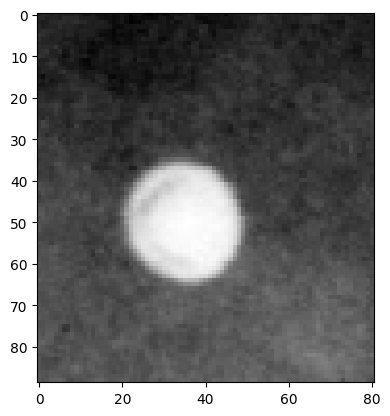

In [8]:
for file  in cropped_images[0:20]:
    cropped_images_show = PIL.Image.open(file)
    gray_img= cropped_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [9]:
full_mammogram_images=dicom_data[dicom_data.SeriesDescription == 'full mammogram images'].image_path
full_mammogram_images.head()

1     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...
2     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...
11    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.210396...
12    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.749566...
15    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.987658...
Name: image_path, dtype: object

In [10]:
full_mammogram_images = full_mammogram_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
full_mammogram_images[1]

'/content/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg'

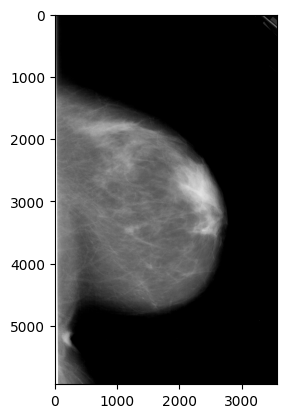

In [11]:
for file  in full_mammogram_images[0:20]:    
    full_mammogram_images_show = PIL.Image.open(file)
    gray_img= full_mammogram_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [12]:
ROI_mask_images=dicom_data[dicom_data.SeriesDescription == 'ROI mask images'].image_path
ROI_mask_images.head()

5     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.153339...
8     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.178994...
9     CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.411833...
14    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.236373...
20    CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.357008...
Name: image_path, dtype: object

In [13]:
ROI_mask_images = ROI_mask_images.apply(lambda x: x.replace('CBIS-DDSM/jpeg', image_dir))
ROI_mask_images.head()

5     /content/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1...
8     /content/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1...
9     /content/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1...
14    /content/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1...
20    /content/CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1...
Name: image_path, dtype: object

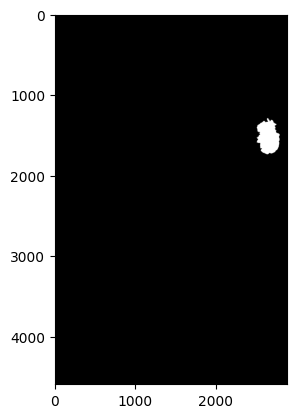

In [14]:
for file  in ROI_mask_images[0:5]:
    ROI_mask_images_show = PIL.Image.open(file)
    gray_img= ROI_mask_images_show.convert("L")
    plt.imshow(gray_img, cmap='gray')

In [15]:
data_1=pd.read_csv('/content/calc_case_description_train_set.csv')
data_1.head()

patient_id  breast density left or right breast image view  abnormality id  \
0    P_00005               3                RIGHT         CC               1   
1    P_00005               3                RIGHT        MLO               1   
2    P_00007               4                 LEFT         CC               1   
3    P_00007               4                 LEFT        MLO               1   
4    P_00008               1                 LEFT         CC               1   

  abnormality type    calc type calc distribution  assessment  \
0    calcification    AMORPHOUS         CLUSTERED           3   
1    calcification    AMORPHOUS         CLUSTERED           3   
2    calcification  PLEOMORPHIC            LINEAR           4   
3    calcification  PLEOMORPHIC            LINEAR           4   
4    calcification          NaN          REGIONAL           2   

                 pathology  subtlety  \
0                MALIGNANT         3   
1                MALIGNANT         3   
2                   BENIGN         4   
3                   BENIGN         4   
4  BENIGN_WITHOUT_CALLBACK         3   

                                     image file path  \
0  Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1  Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2  Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3  Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4  Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   

                             cropped image file path  \
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   

                                  ROI mask file path  
0  Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...  
1  Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....  
2  Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...

In [16]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1546 non-null   object
 1   breast density           1546 non-null   int64 
 2   left or right breast     1546 non-null   object
 3   image view               1546 non-null   object
 4   abnormality id           1546 non-null   int64 
 5   abnormality type         1546 non-null   object
 6   calc type                1526 non-null   object
 7   calc distribution        1170 non-null   object
 8   assessment               1546 non-null   int64 
 9   pathology                1546 non-null   object
 10  subtlety                 1546 non-null   int64 
 11  image file path          1546 non-null   object
 12  cropped image file path  1546 non-null   object
 13  ROI mask file path       1546 non-null   object
dtypes: int64(4), object(10)
memory usage: 16

In [17]:
data_1.describe()

breast density  abnormality id   assessment     subtlety
count     1546.000000     1546.000000  1546.000000  1546.000000
mean         2.663648        1.415265     3.258732     3.411384
std          0.937219        0.903571     1.229231     1.179754
min          1.000000        1.000000     0.000000     1.000000
25%          2.000000        1.000000     2.000000     3.000000
50%          3.000000        1.000000     4.000000     3.000000
75%          3.000000        1.000000     4.000000     4.000000
max          4.000000        7.000000     5.000000     5.000000

In [18]:
data_2=pd.read_csv('/content/mass_case_description_train_set.csv')
data_2.head()

patient_id  breast_density left or right breast image view  abnormality id  \
0    P_00001               3                 LEFT         CC               1   
1    P_00001               3                 LEFT        MLO               1   
2    P_00004               3                 LEFT         CC               1   
3    P_00004               3                 LEFT        MLO               1   
4    P_00004               3                RIGHT        MLO               1   

  abnormality type                          mass shape   mass margins  \
0             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
1             mass  IRREGULAR-ARCHITECTURAL_DISTORTION     SPICULATED   
2             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
3             mass            ARCHITECTURAL_DISTORTION    ILL_DEFINED   
4             mass                                OVAL  CIRCUMSCRIBED   

   assessment  pathology  subtlety  \
0           4  MALIGNANT         4   
1           4  MALIGNANT         4   
2           4     BENIGN         3   
3           4     BENIGN         3   
4           4     BENIGN         5   

                                     image file path  \
0  Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...   
1  Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...   
2  Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...   
3  Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...   
4  Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...   

                             cropped image file path  \
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...   
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...   
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...   
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...   
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....   

                                  ROI mask file path  
0  Mass-Training_P_00001_LEFT_CC_1/1.3.6.1.4.1.95...  
1  Mass-Training_P_00001_LEFT_MLO_1/1.3.6.1.4.1.9...  
2  Mass-Training_P_00004_LEFT_CC_1/1.3.6.1.4.1.95...  
3  Mass-Training_P_00004_LEFT_MLO_1/1.3.6.1.4.1.9...  
4  Mass-Training_P_00004_RIGHT_MLO_1/1.3.6.1.4.1....

In [19]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   patient_id               1318 non-null   object
 1   breast_density           1318 non-null   int64 
 2   left or right breast     1318 non-null   object
 3   image view               1318 non-null   object
 4   abnormality id           1318 non-null   int64 
 5   abnormality type         1318 non-null   object
 6   mass shape               1314 non-null   object
 7   mass margins             1275 non-null   object
 8   assessment               1318 non-null   int64 
 9   pathology                1318 non-null   object
 10  subtlety                 1318 non-null   int64 
 11  image file path          1318 non-null   object
 12  cropped image file path  1318 non-null   object
 13  ROI mask file path       1318 non-null   object
dtypes: int64(4), object(10)
memory usage: 14

In [20]:
data_2.describe()

breast_density  abnormality id   assessment     subtlety
count     1318.000000     1318.000000  1318.000000  1318.000000
mean         2.203338        1.116085     3.504552     3.965857
std          0.873774        0.467013     1.414609     1.102032
min          1.000000        1.000000     0.000000     0.000000
25%          2.000000        1.000000     3.000000     3.000000
50%          2.000000        1.000000     4.000000     4.000000
75%          3.000000        1.000000     4.000000     5.000000
max          4.000000        6.000000     5.000000     5.000000

In [21]:
dicom_cleaning_data = dicom_data.copy()
dicom_cleaning_data.head()

file_path  \
0  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.12930...   
1  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.24838...   
2  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.26721...   
3  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   
4  CBIS-DDSM/dicom/1.3.6.1.4.1.9590.100.1.2.38118...   

                                          image_path  AccessionNumber  \
0  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.129308...              NaN   
1  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.248386...              NaN   
2  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.267213...              NaN   
3  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   
4  CBIS-DDSM/jpeg/1.3.6.1.4.1.9590.100.1.2.381187...              NaN   

   BitsAllocated  BitsStored BodyPartExamined  Columns  ContentDate  \
0             16          16           BREAST      351     20160426   
1             16          16           BREAST     3526     20160426   
2             16          16           BREAST     1546     20160503   
3             16          16           BREAST       97     20160503   
4              8           8      Left Breast     3104     20160503   

   ContentTime ConversionType  ...  \
0   131732.685            WSD  ...   
1   143829.101            WSD  ...   
2   111956.298            WSD  ...   
3   115347.770            WSD  ...   
4   115347.770            WSD  ...   

   SecondaryCaptureDeviceManufacturerModelName      SeriesDescription  \
0                                       MATLAB         cropped images   
1                                       MATLAB  full mammogram images   
2                                       MATLAB  full mammogram images   
3                                       MATLAB         cropped images   
4                                       MATLAB                    NaN   

                                   SeriesInstanceUID SeriesNumber  \
0  1.3.6.1.4.1.9590.100.1.2.129308726812851964007...            1   
1  1.3.6.1.4.1.9590.100.1.2.248386742010678582309...            1   
2  1.3.6.1.4.1.9590.100.1.2.267213171011171858918...            1   
3  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   
4  1.3.6.1.4.1.9590.100.1.2.381187369611524586537...            1   

  SmallestImagePixelValue  SpecificCharacterSet   StudyDate StudyID  \
0                   23078            ISO_IR 100  20160720.0    DDSM   
1                       0            ISO_IR 100  20160720.0    DDSM   
2                       0            ISO_IR 100  20160807.0    DDSM   
3                   32298            ISO_IR 100  20170829.0    DDSM   
4                       0            ISO_IR 100         NaN    DDSM   

                                    StudyInstanceUID  StudyTime  
0  1.3.6.1.4.1.9590.100.1.2.271867287611061855725...   214951.0  
1  1.3.6.1.4.1.9590.100.1.2.161516517311681906612...   193426.0  
2  1.3.6.1.4.1.9590.100.1.2.291043622711253836701...   161814.0  
3  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...   180109.0  
4  1.3.6.1.4.1.9590.100.1.2.335006093711888937440...        NaN  

[5 rows x 38 columns]

In [22]:
dicom_cleaning_data.drop(['PatientBirthDate','AccessionNumber','Columns','ContentDate','ContentTime','PatientSex','PatientBirthDate',
                                                'ReferringPhysicianName','Rows','SOPClassUID','SOPInstanceUID',
                                                'StudyDate','StudyID','StudyInstanceUID','StudyTime','InstanceNumber','SeriesInstanceUID','SeriesNumber'],axis =1, inplace=True) 

In [23]:
dicom_cleaning_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10237 entries, 0 to 10236
Data columns (total 21 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   file_path                                    10237 non-null  object
 1   image_path                                   10237 non-null  object
 2   BitsAllocated                                10237 non-null  int64 
 3   BitsStored                                   10237 non-null  int64 
 4   BodyPartExamined                             10237 non-null  object
 5   ConversionType                               10237 non-null  object
 6   HighBit                                      10237 non-null  int64 
 7   LargestImagePixelValue                       10237 non-null  int64 
 8   Laterality                                   9671 non-null   object
 9   Modality                                     10237 non-null  object
 10  PatientID 

In [24]:
dicom_cleaning_data.isna().sum()

file_path                                        0
image_path                                       0
BitsAllocated                                    0
BitsStored                                       0
BodyPartExamined                                 0
ConversionType                                   0
HighBit                                          0
LargestImagePixelValue                           0
Laterality                                     566
Modality                                         0
PatientID                                        0
PatientName                                      0
PatientOrientation                               0
PhotometricInterpretation                        0
PixelRepresentation                              0
SamplesPerPixel                                  0
SecondaryCaptureDeviceManufacturer               0
SecondaryCaptureDeviceManufacturerModelName      0
SeriesDescription                              566
SmallestImagePixelValue        

In [25]:
dicom_cleaning_data['SeriesDescription'].fillna(method = 'bfill', axis = 0, inplace=True)
dicom_cleaning_data['Laterality'].fillna(method = 'bfill', axis = 0, inplace=True)

In [26]:
dicom_cleaning_data.isna().sum()

file_path                                      0
image_path                                     0
BitsAllocated                                  0
BitsStored                                     0
BodyPartExamined                               0
ConversionType                                 0
HighBit                                        0
LargestImagePixelValue                         0
Laterality                                     0
Modality                                       0
PatientID                                      0
PatientName                                    0
PatientOrientation                             0
PhotometricInterpretation                      0
PixelRepresentation                            0
SamplesPerPixel                                0
SecondaryCaptureDeviceManufacturer             0
SecondaryCaptureDeviceManufacturerModelName    0
SeriesDescription                              0
SmallestImagePixelValue                        0
SpecificCharacterSet

In [27]:
Data_cleaning_1 = data_1.copy()
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc type':'calc_type'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'calc distribution':'calc_distribution'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'image view':'image_view'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'breast density':'breast_density'})
Data_cleaning_1 = Data_cleaning_1.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_1['pathology'] = Data_cleaning_1['pathology'].astype('category')
Data_cleaning_1['calc_type'] = Data_cleaning_1['calc_type'].astype('category')
Data_cleaning_1['calc_distribution'] = Data_cleaning_1['calc_distribution'].astype('category')
Data_cleaning_1['abnormality_type'] = Data_cleaning_1['abnormality_type'].astype('category')
Data_cleaning_1['image_view'] = Data_cleaning_1['image_view'].astype('category')
Data_cleaning_1['left_or_right_breast'] = Data_cleaning_1['left_or_right_breast'].astype('category')

In [28]:
Data_cleaning_1.isna().sum()

patient_id                   0
breast_density               0
left_or_right_breast         0
image_view                   0
abnormality id               0
abnormality_type             0
calc_type                   20
calc_distribution          376
assessment                   0
pathology                    0
subtlety                     0
image file path              0
cropped image file path      0
ROI mask file path           0
dtype: int64

In [29]:
Data_cleaning_1['calc_type'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_1['calc_distribution'].fillna(method = 'bfill', axis = 0, inplace=True)

In [30]:
Data_cleaning_1.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
calc_type                  0
calc_distribution          0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [31]:
Data_cleaning_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1546 entries, 0 to 1545
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   patient_id               1546 non-null   object  
 1   breast_density           1546 non-null   int64   
 2   left_or_right_breast     1546 non-null   category
 3   image_view               1546 non-null   category
 4   abnormality id           1546 non-null   int64   
 5   abnormality_type         1546 non-null   category
 6   calc_type                1546 non-null   category
 7   calc_distribution        1546 non-null   category
 8   assessment               1546 non-null   int64   
 9   pathology                1546 non-null   category
 10  subtlety                 1546 non-null   int64   
 11  image file path          1546 non-null   object  
 12  cropped image file path  1546 non-null   object  
 13  ROI mask file path       1546 non-null   object  
dtypes: categ

In [32]:
Data_cleaning_2 = data_2.copy()
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass shape':'mass_shape'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'left or right breast':'left_or_right_breast'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'mass margins':'mass_margins'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'image view':'image_view'})
Data_cleaning_2 = Data_cleaning_2.rename(columns={'abnormality type':'abnormality_type'})
Data_cleaning_2['left_or_right_breast'] = Data_cleaning_2['left_or_right_breast'].astype('category')
Data_cleaning_2['image_view'] = Data_cleaning_2['image_view'].astype('category')
Data_cleaning_2['mass_margins'] = Data_cleaning_2['mass_margins'].astype('category')
Data_cleaning_2['mass_shape'] = Data_cleaning_2['mass_shape'].astype('category')
Data_cleaning_2['abnormality_type'] = Data_cleaning_2['abnormality_type'].astype('category')
Data_cleaning_2['pathology'] = Data_cleaning_2['pathology'].astype('category')

In [33]:
Data_cleaning_2.isna().sum()

patient_id                  0
breast_density              0
left_or_right_breast        0
image_view                  0
abnormality id              0
abnormality_type            0
mass_shape                  4
mass_margins               43
assessment                  0
pathology                   0
subtlety                    0
image file path             0
cropped image file path     0
ROI mask file path          0
dtype: int64

In [34]:
Data_cleaning_2['mass_shape'].fillna(method = 'bfill', axis = 0, inplace=True) 
Data_cleaning_2['mass_margins'].fillna(method = 'bfill', axis = 0, inplace=True)

In [35]:
Data_cleaning_2.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [36]:
Data_cleaning_2.isna().sum()

patient_id                 0
breast_density             0
left_or_right_breast       0
image_view                 0
abnormality id             0
abnormality_type           0
mass_shape                 0
mass_margins               0
assessment                 0
pathology                  0
subtlety                   0
image file path            0
cropped image file path    0
ROI mask file path         0
dtype: int64

In [37]:
breast_img = glob.glob('/content/IDC_regular_ps50_idx5/**/*.png', recursive = True)

In [38]:
for imgname in breast_img[:3]:
    print(imgname)

/content/IDC_regular_ps50_idx5/12880/0/12880_idx5_x1551_y601_class0.png
/content/IDC_regular_ps50_idx5/12880/0/12880_idx5_x2051_y2051_class0.png
/content/IDC_regular_ps50_idx5/12880/0/12880_idx5_x1201_y401_class0.png


In [39]:
non_can_img = []
can_img = []

for img in breast_img:
    if img[-5] == '0' :
        non_can_img.append(img)
    
    elif img[-5] == '1' :
        can_img.append(img)

In [40]:
non_can_num = len(non_can_img)
can_num = len(can_img)
        
total_img_num = non_can_num + can_num
        
print('Number of Images of no cancer: {}' .format(non_can_num))
print('Number of Images of cancer : {}' .format(can_num))
print('Total Number of Images : {}' .format(total_img_num))

Number of Images of no cancer: 198738
Number of Images of cancer : 78786
Total Number of Images : 277524


In [41]:
data_insight_1 = pd.DataFrame({'state of cancer' : ['0','1'],'Numbers of Patients' : [198738,78786]})

In [42]:
data_insight_1

state of cancer  Numbers of Patients
0               0               198738
1               1                78786

In [43]:
bar = px.bar(data_frame=data_insight_1, x = 'state of cancer', y='Numbers of Patients', color='state of cancer')
bar.update_layout(title_text='Number of Patients with cancer (1) and patients with no cancer (0)', title_x=0.5)
bar.show()

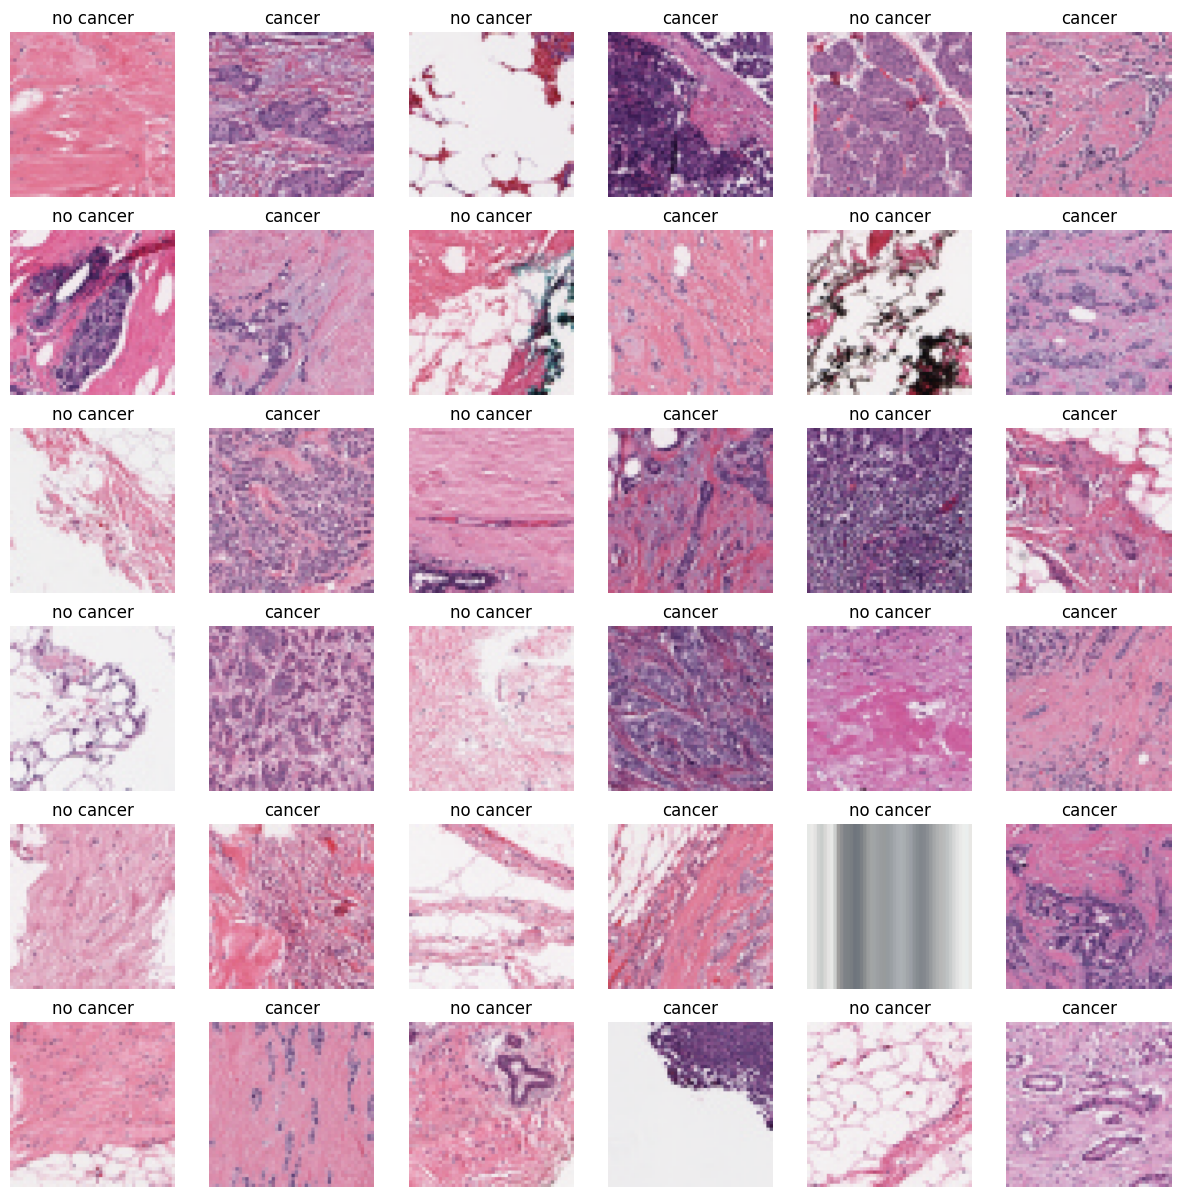

In [44]:
from keras.preprocessing import image
import tensorflow as tf
plt.figure(figsize = (15, 15))

some_non = np.random.randint(0, len(non_can_img), 18)
some_can = np.random.randint(0, len(can_img), 18)

s = 0
for num in some_non:
    
        img = tf.keras.utils.load_img((non_can_img[num]), target_size=(100, 100))
        img = tf.keras.utils.img_to_array(img)
        
        plt.subplot(6, 6, 2*s+1)
        plt.axis('off')
        plt.title('no cancer')
        plt.imshow(img.astype('uint8'))
        s += 1
        
s = 1
for num in some_can:
    
        img = tf.keras.utils.load_img((can_img[num]), target_size=(100, 100))
        img =tf.keras.utils.img_to_array(img)
        plt.subplot(6, 6, 2*s)
        plt.axis('off')        
        plt.title('cancer')
        plt.imshow(img.astype('uint8'))
        s += 1

In [45]:
from matplotlib.image import imread
import cv2

some_non_img = random.sample(non_can_img, len(non_can_img))
some_can_img = random.sample(can_img, len(can_img))

non_img_arr = []
can_img_arr = []

for img in some_non_img:
        
    n_img = cv2.imread(img, cv2.IMREAD_COLOR)
    n_img_size = cv2.resize(n_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    non_img_arr.append([n_img_size, 0])
    
for img in some_can_img:
    
    c_img = cv2.imread(img, cv2.IMREAD_COLOR)
    c_img_size = cv2.resize(c_img, (50, 50), interpolation = cv2.INTER_LINEAR)
    can_img_arr.append([c_img_size, 1])

In [46]:
X = []
y = []

breast_img_arr = np.concatenate((non_img_arr, can_img_arr))
random.shuffle(breast_img_arr)

for feature, label in breast_img_arr:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

print('X shape : {}' .format(X.shape))

<__array_function__ internals>:180: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.



X shape : (277524, 50, 50, 3)


In [47]:
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

rate = 0.5
num = int(X.shape[0] * rate)

y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)


print('X_train shape : {}' .format(X_train.shape))
print('X_test shape : {}' .format(X_test.shape))
print('y_train shape : {}' .format(y_train.shape))
print('y_test shape : {}' .format(y_test.shape))

X_train shape : (208143, 50, 50, 3)
X_test shape : (69381, 50, 50, 3)
y_train shape : (208143, 2)
y_test shape : (69381, 2)


In [48]:
model = Sequential()
model.add(Conv2D(input_shape=(50,50,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

In [49]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [50]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 50, 50, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 25, 25, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 25, 25, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                    

In [52]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')

In [53]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 1 , batch_size = 75,callbacks=[checkpoint,early])

   1/2776 [..............................] - ETA: 10:38:59 - loss: 0.8128 - accuracy: 0.0267

   2/2776 [..............................] - ETA: 6:25 - loss: 9.5841 - accuracy: 0.4933    

   3/2776 [..............................] - ETA: 4:58 - loss: 6.6072 - accuracy: 0.6400

   4/2776 [..............................] - ETA: 4:33 - loss: 5.1090 - accuracy: 0.7200

   5/2776 [..............................] - ETA: 4:24 - loss: 4.1352 - accuracy: 0.7627

   6/2776 [..............................] - ETA: 4:14 - loss: 3.7245 - accuracy: 0.7933

   7/2776 [..............................] - ETA: 4:08 - loss: 3.2550 - accuracy: 0.8133

   8/2776 [..............................] - ETA: 4:07 - loss: 2.9236 - accuracy: 0.8283

   9/2776 [..............................] - ETA: 4:02 - loss: 2.6643 - accuracy: 0.8459

  10/2776 [..............................] - ETA: 3:58 - loss: 2.4565 - accuracy: 0.8533

  11/2776 [..............................] - ETA: 3:56 - loss: 2.2824 - accuracy: 0.8642

  12/2776 [..............................] - ETA: 3:55 - loss: 2.1338 - accuracy: 0.8722

  13/2776 [..............................] - ETA: 3:55 - loss: 2.0009 - accuracy: 0.8769

  14/2776 [..............................] - ETA: 3:54 - loss: 1.8659 - accuracy: 0.8838

  15/2776 [..............................] - ETA: 3:52 - loss: 1.7595 - accuracy: 0.8907

  16/2776 [..............................] - ETA: 3:51 - loss: 1.6951 - accuracy: 0.8933

  17/2776 [..............................] - ETA: 3:50 - loss: 1.6044 - accuracy: 0.8988

  18/2776 [..............................] - ETA: 3:49 - loss: 1.5319 - accuracy: 0.9030

  19/2776 [..............................] - ETA: 3:49 - loss: 1.4695 - accuracy: 0.9053

  20/2776 [..............................] - ETA: 3:48 - loss: 1.4127 - accuracy: 0.9073

  21/2776 [..............................] - ETA: 3:47 - loss: 1.3568 - accuracy: 0.9111

  22/2776 [..............................] - ETA: 3:47 - loss: 1.3053 - accuracy: 0.9127

  23/2776 [..............................] - ETA: 3:47 - loss: 1.2666 - accuracy: 0.9125

  24/2776 [..............................] - ETA: 3:46 - loss: 1.2173 - accuracy: 0.9156

  25/2776 [..............................] - ETA: 3:46 - loss: 1.1793 - accuracy: 0.9157

  26/2776 [..............................] - ETA: 3:46 - loss: 1.1444 - accuracy: 0.9159

  27/2776 [..............................] - ETA: 3:46 - loss: 1.1100 - accuracy: 0.9170

  28/2776 [..............................] - ETA: 3:46 - loss: 1.0789 - accuracy: 0.9176

  29/2776 [..............................] - ETA: 3:46 - loss: 1.0478 - accuracy: 0.9191

  30/2776 [..............................] - ETA: 3:45 - loss: 1.0207 - accuracy: 0.9196

  31/2776 [..............................] - ETA: 3:45 - loss: 0.9917 - accuracy: 0.9213

  32/2776 [..............................] - ETA: 3:44 - loss: 0.9646 - accuracy: 0.9229

  33/2776 [..............................] - ETA: 3:44 - loss: 0.9390 - accuracy: 0.9244

  34/2776 [..............................] - ETA: 3:43 - loss: 0.9136 - accuracy: 0.9263

  35/2776 [..............................] - ETA: 3:43 - loss: 0.8910 - accuracy: 0.9276

  36/2776 [..............................] - ETA: 3:43 - loss: 0.8682 - accuracy: 0.9293

  37/2776 [..............................] - ETA: 3:43 - loss: 0.8494 - accuracy: 0.9301

  38/2776 [..............................] - ETA: 3:43 - loss: 0.8326 - accuracy: 0.9305

  39/2776 [..............................] - ETA: 3:43 - loss: 0.8166 - accuracy: 0.9309

  40/2776 [..............................] - ETA: 3:42 - loss: 0.7989 - accuracy: 0.9323

  41/2776 [..............................] - ETA: 3:42 - loss: 0.7828 - accuracy: 0.9333

  42/2776 [..............................] - ETA: 3:42 - loss: 0.7690 - accuracy: 0.9337

  43/2776 [..............................] - ETA: 3:42 - loss: 0.7541 - accuracy: 0.9346

  44/2776 [..............................] - ETA: 3:41 - loss: 0.7416 - accuracy: 0.9348

  45/2776 [..............................] - ETA: 3:41 - loss: 0.7277 - accuracy: 0.9357

  46/2776 [..............................] - ETA: 3:41 - loss: 0.7177 - accuracy: 0.9357

  47/2776 [..............................] - ETA: 3:40 - loss: 0.7040 - accuracy: 0.9367

  48/2776 [..............................] - ETA: 3:40 - loss: 0.6927 - accuracy: 0.9372

  49/2776 [..............................] - ETA: 3:40 - loss: 0.6855 - accuracy: 0.9366

  50/2776 [..............................] - ETA: 3:40 - loss: 0.6745 - accuracy: 0.9373

  51/2776 [..............................] - ETA: 3:40 - loss: 0.6639 - accuracy: 0.9380

  52/2776 [..............................] - ETA: 3:40 - loss: 0.6564 - accuracy: 0.9377

  53/2776 [..............................] - ETA: 3:40 - loss: 0.6473 - accuracy: 0.9381

  54/2776 [..............................] - ETA: 3:39 - loss: 0.6398 - accuracy: 0.9380

  55/2776 [..............................] - ETA: 3:39 - loss: 0.6301 - accuracy: 0.9389

  56/2776 [..............................] - ETA: 3:39 - loss: 0.6231 - accuracy: 0.9388

  57/2776 [..............................] - ETA: 3:39 - loss: 0.6144 - accuracy: 0.9394

  58/2776 [..............................] - ETA: 3:39 - loss: 0.6067 - accuracy: 0.9398

  59/2776 [..............................] - ETA: 3:39 - loss: 0.5984 - accuracy: 0.9403

  60/2776 [..............................] - ETA: 3:39 - loss: 0.5903 - accuracy: 0.9409

  61/2776 [..............................] - ETA: 3:39 - loss: 0.5856 - accuracy: 0.9408

  62/2776 [..............................] - ETA: 3:39 - loss: 0.5780 - accuracy: 0.9413

  63/2776 [..............................] - ETA: 3:39 - loss: 0.5715 - accuracy: 0.9416

  64/2776 [..............................] - ETA: 3:38 - loss: 0.5669 - accuracy: 0.9413

  65/2776 [..............................] - ETA: 3:38 - loss: 0.5608 - accuracy: 0.9415

  66/2776 [..............................] - ETA: 3:38 - loss: 0.5549 - accuracy: 0.9418

  67/2776 [..............................] - ETA: 3:38 - loss: 0.5493 - accuracy: 0.9421

  68/2776 [..............................] - ETA: 3:38 - loss: 0.5433 - accuracy: 0.9425

  69/2776 [..............................] - ETA: 3:38 - loss: 0.5389 - accuracy: 0.9424

  70/2776 [..............................] - ETA: 3:38 - loss: 0.5347 - accuracy: 0.9423

  71/2776 [..............................] - ETA: 3:38 - loss: 0.5289 - accuracy: 0.9427

  72/2776 [..............................] - ETA: 3:38 - loss: 0.5255 - accuracy: 0.9424

  73/2776 [..............................] - ETA: 3:38 - loss: 0.5216 - accuracy: 0.9423

  74/2776 [..............................] - ETA: 3:38 - loss: 0.5167 - accuracy: 0.9425

  75/2776 [..............................] - ETA: 3:38 - loss: 0.5115 - accuracy: 0.9429

  76/2776 [..............................] - ETA: 3:38 - loss: 0.5058 - accuracy: 0.9435

  77/2776 [..............................] - ETA: 3:38 - loss: 0.5025 - accuracy: 0.9434

  78/2776 [..............................] - ETA: 3:38 - loss: 0.4999 - accuracy: 0.9431

  79/2776 [..............................] - ETA: 3:38 - loss: 0.4945 - accuracy: 0.9436

  80/2776 [..............................] - ETA: 3:37 - loss: 0.4914 - accuracy: 0.9435

  81/2776 [..............................] - ETA: 3:37 - loss: 0.4869 - accuracy: 0.9439

  82/2776 [..............................] - ETA: 3:37 - loss: 0.4820 - accuracy: 0.9444

  83/2776 [..............................] - ETA: 3:37 - loss: 0.4795 - accuracy: 0.9441

  84/2776 [..............................] - ETA: 3:37 - loss: 0.4763 - accuracy: 0.9441

  85/2776 [..............................] - ETA: 3:37 - loss: 0.4727 - accuracy: 0.9443

  86/2776 [..............................] - ETA: 3:37 - loss: 0.4690 - accuracy: 0.9445

  87/2776 [..............................] - ETA: 3:37 - loss: 0.4654 - accuracy: 0.9447

  88/2776 [..............................] - ETA: 3:37 - loss: 0.4625 - accuracy: 0.9447

  89/2776 [..............................] - ETA: 3:37 - loss: 0.4586 - accuracy: 0.9450

  90/2776 [..............................] - ETA: 3:37 - loss: 0.4549 - accuracy: 0.9453

  91/2776 [..............................] - ETA: 3:37 - loss: 0.4518 - accuracy: 0.9455

  92/2776 [..............................] - ETA: 3:37 - loss: 0.4490 - accuracy: 0.9455

  93/2776 [>.............................] - ETA: 3:37 - loss: 0.4467 - accuracy: 0.9454

  94/2776 [>.............................] - ETA: 3:37 - loss: 0.4437 - accuracy: 0.9455

  95/2776 [>.............................] - ETA: 3:36 - loss: 0.4411 - accuracy: 0.9455

  96/2776 [>.............................] - ETA: 3:36 - loss: 0.4382 - accuracy: 0.9457

  97/2776 [>.............................] - ETA: 3:36 - loss: 0.4357 - accuracy: 0.9457

  98/2776 [>.............................] - ETA: 3:36 - loss: 0.4325 - accuracy: 0.9460

  99/2776 [>.............................] - ETA: 3:36 - loss: 0.4292 - accuracy: 0.9463

 100/2776 [>.............................] - ETA: 3:36 - loss: 0.4275 - accuracy: 0.9461

 101/2776 [>.............................] - ETA: 3:35 - loss: 0.4247 - accuracy: 0.9463

 102/2776 [>.............................] - ETA: 3:35 - loss: 0.4214 - accuracy: 0.9467

 103/2776 [>.............................] - ETA: 3:35 - loss: 0.4186 - accuracy: 0.9469

 104/2776 [>.............................] - ETA: 3:35 - loss: 0.4165 - accuracy: 0.9469

 105/2776 [>.............................] - ETA: 3:35 - loss: 0.4143 - accuracy: 0.9469

 106/2776 [>.............................] - ETA: 3:35 - loss: 0.4131 - accuracy: 0.9467

 107/2776 [>.............................] - ETA: 3:35 - loss: 0.4104 - accuracy: 0.9469

 108/2776 [>.............................] - ETA: 3:35 - loss: 0.4084 - accuracy: 0.9469

 109/2776 [>.............................] - ETA: 3:35 - loss: 0.4063 - accuracy: 0.9469

 110/2776 [>.............................] - ETA: 3:35 - loss: 0.4049 - accuracy: 0.9468

 111/2776 [>.............................] - ETA: 3:35 - loss: 0.4020 - accuracy: 0.9471

 112/2776 [>.............................] - ETA: 3:34 - loss: 0.4005 - accuracy: 0.9470

 113/2776 [>.............................] - ETA: 3:34 - loss: 0.3984 - accuracy: 0.9471

 114/2776 [>.............................] - ETA: 3:34 - loss: 0.3970 - accuracy: 0.9469

 115/2776 [>.............................] - ETA: 3:34 - loss: 0.3948 - accuracy: 0.9470

 116/2776 [>.............................] - ETA: 3:34 - loss: 0.3923 - accuracy: 0.9472

 117/2776 [>.............................] - ETA: 3:34 - loss: 0.3904 - accuracy: 0.9474

 118/2776 [>.............................] - ETA: 3:34 - loss: 0.3882 - accuracy: 0.9476

 119/2776 [>.............................] - ETA: 3:34 - loss: 0.3866 - accuracy: 0.9476

 120/2776 [>.............................] - ETA: 3:34 - loss: 0.3840 - accuracy: 0.9479

 121/2776 [>.............................] - ETA: 3:34 - loss: 0.3841 - accuracy: 0.9477

 122/2776 [>.............................] - ETA: 3:33 - loss: 0.3822 - accuracy: 0.9478

 123/2776 [>.............................] - ETA: 3:33 - loss: 0.3807 - accuracy: 0.9479

 124/2776 [>.............................] - ETA: 3:33 - loss: 0.3794 - accuracy: 0.9478

 125/2776 [>.............................] - ETA: 3:33 - loss: 0.3780 - accuracy: 0.9479

 126/2776 [>.............................] - ETA: 3:33 - loss: 0.3762 - accuracy: 0.9481

 127/2776 [>.............................] - ETA: 3:33 - loss: 0.3745 - accuracy: 0.9482

 128/2776 [>.............................] - ETA: 3:33 - loss: 0.3736 - accuracy: 0.9481

 129/2776 [>.............................] - ETA: 3:33 - loss: 0.3719 - accuracy: 0.9482

 130/2776 [>.............................] - ETA: 3:33 - loss: 0.3706 - accuracy: 0.9482

 131/2776 [>.............................] - ETA: 3:33 - loss: 0.3690 - accuracy: 0.9483

 132/2776 [>.............................] - ETA: 3:33 - loss: 0.3681 - accuracy: 0.9482

 133/2776 [>.............................] - ETA: 3:33 - loss: 0.3666 - accuracy: 0.9483

 134/2776 [>.............................] - ETA: 3:32 - loss: 0.3646 - accuracy: 0.9486

 135/2776 [>.............................] - ETA: 3:32 - loss: 0.3631 - accuracy: 0.9486

 136/2776 [>.............................] - ETA: 3:32 - loss: 0.3622 - accuracy: 0.9485

 137/2776 [>.............................] - ETA: 3:32 - loss: 0.3605 - accuracy: 0.9487

 138/2776 [>.............................] - ETA: 3:32 - loss: 0.3593 - accuracy: 0.9487

 139/2776 [>.............................] - ETA: 3:32 - loss: 0.3578 - accuracy: 0.9488

 140/2776 [>.............................] - ETA: 3:32 - loss: 0.3571 - accuracy: 0.9487

 141/2776 [>.............................] - ETA: 3:32 - loss: 0.3557 - accuracy: 0.9487

 142/2776 [>.............................] - ETA: 3:32 - loss: 0.3538 - accuracy: 0.9490

 143/2776 [>.............................] - ETA: 3:32 - loss: 0.3519 - accuracy: 0.9493

 144/2776 [>.............................] - ETA: 3:32 - loss: 0.3518 - accuracy: 0.9490

 145/2776 [>.............................] - ETA: 3:32 - loss: 0.3505 - accuracy: 0.9491

 146/2776 [>.............................] - ETA: 3:31 - loss: 0.3490 - accuracy: 0.9492

 147/2776 [>.............................] - ETA: 3:31 - loss: 0.3477 - accuracy: 0.9493

 148/2776 [>.............................] - ETA: 3:31 - loss: 0.3466 - accuracy: 0.9493

 149/2776 [>.............................] - ETA: 3:31 - loss: 0.3456 - accuracy: 0.9493

 150/2776 [>.............................] - ETA: 3:31 - loss: 0.3443 - accuracy: 0.9493

 151/2776 [>.............................] - ETA: 3:31 - loss: 0.3427 - accuracy: 0.9495

 152/2776 [>.............................] - ETA: 3:31 - loss: 0.3411 - accuracy: 0.9497

 153/2776 [>.............................] - ETA: 3:31 - loss: 0.3400 - accuracy: 0.9498

 154/2776 [>.............................] - ETA: 3:31 - loss: 0.3392 - accuracy: 0.9497

 155/2776 [>.............................] - ETA: 3:31 - loss: 0.3381 - accuracy: 0.9497

 156/2776 [>.............................] - ETA: 3:31 - loss: 0.3371 - accuracy: 0.9497

 157/2776 [>.............................] - ETA: 3:30 - loss: 0.3358 - accuracy: 0.9499

 158/2776 [>.............................] - ETA: 3:30 - loss: 0.3349 - accuracy: 0.9499

 159/2776 [>.............................] - ETA: 3:30 - loss: 0.3339 - accuracy: 0.9499

 160/2776 [>.............................] - ETA: 3:30 - loss: 0.3324 - accuracy: 0.9500

 161/2776 [>.............................] - ETA: 3:30 - loss: 0.3314 - accuracy: 0.9500

 162/2776 [>.............................] - ETA: 3:30 - loss: 0.3321 - accuracy: 0.9496

 163/2776 [>.............................] - ETA: 3:30 - loss: 0.3315 - accuracy: 0.9495

 164/2776 [>.............................] - ETA: 3:30 - loss: 0.3309 - accuracy: 0.9495

 165/2776 [>.............................] - ETA: 3:30 - loss: 0.3302 - accuracy: 0.9496

 166/2776 [>.............................] - ETA: 3:30 - loss: 0.3299 - accuracy: 0.9495

 167/2776 [>.............................] - ETA: 3:30 - loss: 0.3289 - accuracy: 0.9497

 168/2776 [>.............................] - ETA: 3:29 - loss: 0.3283 - accuracy: 0.9497

 169/2776 [>.............................] - ETA: 3:29 - loss: 0.3274 - accuracy: 0.9498

 170/2776 [>.............................] - ETA: 3:29 - loss: 0.3265 - accuracy: 0.9499

 171/2776 [>.............................] - ETA: 3:29 - loss: 0.3260 - accuracy: 0.9498

 172/2776 [>.............................] - ETA: 3:29 - loss: 0.3254 - accuracy: 0.9498

 173/2776 [>.............................] - ETA: 3:29 - loss: 0.3242 - accuracy: 0.9499

 174/2776 [>.............................] - ETA: 3:29 - loss: 0.3236 - accuracy: 0.9499

 175/2776 [>.............................] - ETA: 3:29 - loss: 0.3232 - accuracy: 0.9498

 176/2776 [>.............................] - ETA: 3:29 - loss: 0.3221 - accuracy: 0.9499

 177/2776 [>.............................] - ETA: 3:29 - loss: 0.3223 - accuracy: 0.9497

 178/2776 [>.............................] - ETA: 3:29 - loss: 0.3210 - accuracy: 0.9499

 179/2776 [>.............................] - ETA: 3:28 - loss: 0.3206 - accuracy: 0.9498

 180/2776 [>.............................] - ETA: 3:28 - loss: 0.3200 - accuracy: 0.9498

 181/2776 [>.............................] - ETA: 3:28 - loss: 0.3207 - accuracy: 0.9494

 182/2776 [>.............................] - ETA: 3:28 - loss: 0.3205 - accuracy: 0.9492

 183/2776 [>.............................] - ETA: 3:28 - loss: 0.3203 - accuracy: 0.9491

 184/2776 [>.............................] - ETA: 3:28 - loss: 0.3193 - accuracy: 0.9492

 185/2776 [>.............................] - ETA: 3:28 - loss: 0.3196 - accuracy: 0.9488

 186/2776 [=>............................] - ETA: 3:28 - loss: 0.3191 - accuracy: 0.9488

 187/2776 [=>............................] - ETA: 3:28 - loss: 0.3190 - accuracy: 0.9486

 188/2776 [=>............................] - ETA: 3:28 - loss: 0.3182 - accuracy: 0.9487

 189/2776 [=>............................] - ETA: 3:28 - loss: 0.3178 - accuracy: 0.9486

 190/2776 [=>............................] - ETA: 3:28 - loss: 0.3175 - accuracy: 0.9486

 191/2776 [=>............................] - ETA: 3:28 - loss: 0.3168 - accuracy: 0.9486

 192/2776 [=>............................] - ETA: 3:27 - loss: 0.3161 - accuracy: 0.9487

 193/2776 [=>............................] - ETA: 3:27 - loss: 0.3152 - accuracy: 0.9488

 194/2776 [=>............................] - ETA: 3:27 - loss: 0.3146 - accuracy: 0.9489

 195/2776 [=>............................] - ETA: 3:27 - loss: 0.3138 - accuracy: 0.9489

 196/2776 [=>............................] - ETA: 3:27 - loss: 0.3129 - accuracy: 0.9490

 197/2776 [=>............................] - ETA: 3:27 - loss: 0.3121 - accuracy: 0.9492

 198/2776 [=>............................] - ETA: 3:27 - loss: 0.3115 - accuracy: 0.9492

 199/2776 [=>............................] - ETA: 3:27 - loss: 0.3112 - accuracy: 0.9491

 200/2776 [=>............................] - ETA: 3:27 - loss: 0.3105 - accuracy: 0.9491

 201/2776 [=>............................] - ETA: 3:27 - loss: 0.3094 - accuracy: 0.9493

 202/2776 [=>............................] - ETA: 3:27 - loss: 0.3085 - accuracy: 0.9494

 203/2776 [=>............................] - ETA: 3:27 - loss: 0.3084 - accuracy: 0.9493

 204/2776 [=>............................] - ETA: 3:26 - loss: 0.3075 - accuracy: 0.9494

 205/2776 [=>............................] - ETA: 3:26 - loss: 0.3066 - accuracy: 0.9495

 206/2776 [=>............................] - ETA: 3:26 - loss: 0.3055 - accuracy: 0.9497

 207/2776 [=>............................] - ETA: 3:26 - loss: 0.3046 - accuracy: 0.9498

 208/2776 [=>............................] - ETA: 3:26 - loss: 0.3047 - accuracy: 0.9497

 209/2776 [=>............................] - ETA: 3:26 - loss: 0.3047 - accuracy: 0.9495

 210/2776 [=>............................] - ETA: 3:26 - loss: 0.3039 - accuracy: 0.9497

 211/2776 [=>............................] - ETA: 3:26 - loss: 0.3039 - accuracy: 0.9495

 212/2776 [=>............................] - ETA: 3:26 - loss: 0.3026 - accuracy: 0.9497

 213/2776 [=>............................] - ETA: 3:26 - loss: 0.3020 - accuracy: 0.9498

 214/2776 [=>............................] - ETA: 3:26 - loss: 0.3014 - accuracy: 0.9498

 215/2776 [=>............................] - ETA: 3:26 - loss: 0.3011 - accuracy: 0.9498

 216/2776 [=>............................] - ETA: 3:26 - loss: 0.3003 - accuracy: 0.9499

 217/2776 [=>............................] - ETA: 3:25 - loss: 0.2997 - accuracy: 0.9499

 218/2776 [=>............................] - ETA: 3:25 - loss: 0.2995 - accuracy: 0.9498

 219/2776 [=>............................] - ETA: 3:25 - loss: 0.2998 - accuracy: 0.9496

 220/2776 [=>............................] - ETA: 3:25 - loss: 0.2995 - accuracy: 0.9495

 221/2776 [=>............................] - ETA: 3:25 - loss: 0.2993 - accuracy: 0.9494

 222/2776 [=>............................] - ETA: 3:25 - loss: 0.2997 - accuracy: 0.9491

 223/2776 [=>............................] - ETA: 3:25 - loss: 0.2997 - accuracy: 0.9489

 224/2776 [=>............................] - ETA: 3:25 - loss: 0.2991 - accuracy: 0.9490

 225/2776 [=>............................] - ETA: 3:25 - loss: 0.2987 - accuracy: 0.9490

 226/2776 [=>............................] - ETA: 3:25 - loss: 0.2986 - accuracy: 0.9489

 227/2776 [=>............................] - ETA: 3:25 - loss: 0.2983 - accuracy: 0.9489

 228/2776 [=>............................] - ETA: 3:25 - loss: 0.2980 - accuracy: 0.9488

 229/2776 [=>............................] - ETA: 3:25 - loss: 0.2975 - accuracy: 0.9489

 230/2776 [=>............................] - ETA: 3:24 - loss: 0.2969 - accuracy: 0.9490

 231/2776 [=>............................] - ETA: 3:24 - loss: 0.2967 - accuracy: 0.9489

 232/2776 [=>............................] - ETA: 3:24 - loss: 0.2960 - accuracy: 0.9490

 233/2776 [=>............................] - ETA: 3:24 - loss: 0.2956 - accuracy: 0.9490

 234/2776 [=>............................] - ETA: 3:24 - loss: 0.2951 - accuracy: 0.9491

 235/2776 [=>............................] - ETA: 3:24 - loss: 0.2947 - accuracy: 0.9490

 236/2776 [=>............................] - ETA: 3:24 - loss: 0.2945 - accuracy: 0.9490

 237/2776 [=>............................] - ETA: 3:24 - loss: 0.2936 - accuracy: 0.9491

 238/2776 [=>............................] - ETA: 3:24 - loss: 0.2929 - accuracy: 0.9492

 239/2776 [=>............................] - ETA: 3:24 - loss: 0.2926 - accuracy: 0.9492

 240/2776 [=>............................] - ETA: 3:24 - loss: 0.2915 - accuracy: 0.9494

 241/2776 [=>............................] - ETA: 3:24 - loss: 0.2912 - accuracy: 0.9494

 242/2776 [=>............................] - ETA: 3:24 - loss: 0.2901 - accuracy: 0.9496

 243/2776 [=>............................] - ETA: 3:23 - loss: 0.2898 - accuracy: 0.9496

 244/2776 [=>............................] - ETA: 3:23 - loss: 0.2895 - accuracy: 0.9496

 245/2776 [=>............................] - ETA: 3:23 - loss: 0.2890 - accuracy: 0.9497

 246/2776 [=>............................] - ETA: 3:23 - loss: 0.2884 - accuracy: 0.9498

 247/2776 [=>............................] - ETA: 3:23 - loss: 0.2879 - accuracy: 0.9498

 248/2776 [=>............................] - ETA: 3:23 - loss: 0.2870 - accuracy: 0.9499

 249/2776 [=>............................] - ETA: 3:23 - loss: 0.2877 - accuracy: 0.9497

 250/2776 [=>............................] - ETA: 3:23 - loss: 0.2876 - accuracy: 0.9496

 251/2776 [=>............................] - ETA: 3:23 - loss: 0.2869 - accuracy: 0.9497

 252/2776 [=>............................] - ETA: 3:23 - loss: 0.2863 - accuracy: 0.9498

 253/2776 [=>............................] - ETA: 3:23 - loss: 0.2865 - accuracy: 0.9496

 254/2776 [=>............................] - ETA: 3:23 - loss: 0.2859 - accuracy: 0.9497

 255/2776 [=>............................] - ETA: 3:22 - loss: 0.2856 - accuracy: 0.9497

 256/2776 [=>............................] - ETA: 3:22 - loss: 0.2851 - accuracy: 0.9497

 257/2776 [=>............................] - ETA: 3:22 - loss: 0.2847 - accuracy: 0.9498

 258/2776 [=>............................] - ETA: 3:22 - loss: 0.2841 - accuracy: 0.9499

 259/2776 [=>............................] - ETA: 3:22 - loss: 0.2840 - accuracy: 0.9498

 260/2776 [=>............................] - ETA: 3:22 - loss: 0.2834 - accuracy: 0.9499

 261/2776 [=>............................] - ETA: 3:22 - loss: 0.2835 - accuracy: 0.9497

 262/2776 [=>............................] - ETA: 3:22 - loss: 0.2828 - accuracy: 0.9499

 263/2776 [=>............................] - ETA: 3:22 - loss: 0.2827 - accuracy: 0.9498

 264/2776 [=>............................] - ETA: 3:22 - loss: 0.2820 - accuracy: 0.9499

 265/2776 [=>............................] - ETA: 3:22 - loss: 0.2814 - accuracy: 0.9500

 266/2776 [=>............................] - ETA: 3:22 - loss: 0.2811 - accuracy: 0.9500

 267/2776 [=>............................] - ETA: 3:22 - loss: 0.2812 - accuracy: 0.9499

 268/2776 [=>............................] - ETA: 3:21 - loss: 0.2811 - accuracy: 0.9499

 269/2776 [=>............................] - ETA: 3:21 - loss: 0.2806 - accuracy: 0.9499

 270/2776 [=>............................] - ETA: 3:21 - loss: 0.2802 - accuracy: 0.9499

 271/2776 [=>............................] - ETA: 3:21 - loss: 0.2800 - accuracy: 0.9499

 272/2776 [=>............................] - ETA: 3:21 - loss: 0.2797 - accuracy: 0.9499

 273/2776 [=>............................] - ETA: 3:21 - loss: 0.2793 - accuracy: 0.9499

 274/2776 [=>............................] - ETA: 3:21 - loss: 0.2787 - accuracy: 0.9500

 275/2776 [=>............................] - ETA: 3:21 - loss: 0.2783 - accuracy: 0.9501

 276/2776 [=>............................] - ETA: 3:21 - loss: 0.2779 - accuracy: 0.9501

 277/2776 [=>............................] - ETA: 3:21 - loss: 0.2772 - accuracy: 0.9502

 278/2776 [==>...........................] - ETA: 3:21 - loss: 0.2770 - accuracy: 0.9502

 279/2776 [==>...........................] - ETA: 3:21 - loss: 0.2766 - accuracy: 0.9503

 280/2776 [==>...........................] - ETA: 3:20 - loss: 0.2759 - accuracy: 0.9504

 281/2776 [==>...........................] - ETA: 3:20 - loss: 0.2755 - accuracy: 0.9504

 282/2776 [==>...........................] - ETA: 3:20 - loss: 0.2755 - accuracy: 0.9504

 283/2776 [==>...........................] - ETA: 3:20 - loss: 0.2756 - accuracy: 0.9502

 284/2776 [==>...........................] - ETA: 3:20 - loss: 0.2749 - accuracy: 0.9504

 285/2776 [==>...........................] - ETA: 3:20 - loss: 0.2743 - accuracy: 0.9505

 286/2776 [==>...........................] - ETA: 3:20 - loss: 0.2741 - accuracy: 0.9504

 287/2776 [==>...........................] - ETA: 3:20 - loss: 0.2738 - accuracy: 0.9505

 288/2776 [==>...........................] - ETA: 3:20 - loss: 0.2740 - accuracy: 0.9503

 289/2776 [==>...........................] - ETA: 3:20 - loss: 0.2735 - accuracy: 0.9504

 290/2776 [==>...........................] - ETA: 3:20 - loss: 0.2735 - accuracy: 0.9503

 291/2776 [==>...........................] - ETA: 3:20 - loss: 0.2734 - accuracy: 0.9502

 292/2776 [==>...........................] - ETA: 3:20 - loss: 0.2732 - accuracy: 0.9502

 293/2776 [==>...........................] - ETA: 3:20 - loss: 0.2727 - accuracy: 0.9503

 294/2776 [==>...........................] - ETA: 3:19 - loss: 0.2724 - accuracy: 0.9503

 295/2776 [==>...........................] - ETA: 3:19 - loss: 0.2721 - accuracy: 0.9504

 296/2776 [==>...........................] - ETA: 3:19 - loss: 0.2723 - accuracy: 0.9502

 297/2776 [==>...........................] - ETA: 3:19 - loss: 0.2721 - accuracy: 0.9502

 298/2776 [==>...........................] - ETA: 3:19 - loss: 0.2717 - accuracy: 0.9502

 299/2776 [==>...........................] - ETA: 3:19 - loss: 0.2716 - accuracy: 0.9502

 300/2776 [==>...........................] - ETA: 3:19 - loss: 0.2715 - accuracy: 0.9501

 301/2776 [==>...........................] - ETA: 3:19 - loss: 0.2713 - accuracy: 0.9501

 302/2776 [==>...........................] - ETA: 3:19 - loss: 0.2711 - accuracy: 0.9501

 303/2776 [==>...........................] - ETA: 3:19 - loss: 0.2705 - accuracy: 0.9502

 304/2776 [==>...........................] - ETA: 3:19 - loss: 0.2704 - accuracy: 0.9502

 305/2776 [==>...........................] - ETA: 3:19 - loss: 0.2701 - accuracy: 0.9502

 306/2776 [==>...........................] - ETA: 3:18 - loss: 0.2698 - accuracy: 0.9502

 307/2776 [==>...........................] - ETA: 3:18 - loss: 0.2693 - accuracy: 0.9503

 308/2776 [==>...........................] - ETA: 3:18 - loss: 0.2689 - accuracy: 0.9504

 309/2776 [==>...........................] - ETA: 3:18 - loss: 0.2688 - accuracy: 0.9503

 310/2776 [==>...........................] - ETA: 3:18 - loss: 0.2685 - accuracy: 0.9504

 311/2776 [==>...........................] - ETA: 3:18 - loss: 0.2680 - accuracy: 0.9504

 312/2776 [==>...........................] - ETA: 3:18 - loss: 0.2680 - accuracy: 0.9504

 313/2776 [==>...........................] - ETA: 3:18 - loss: 0.2677 - accuracy: 0.9504

 314/2776 [==>...........................] - ETA: 3:18 - loss: 0.2676 - accuracy: 0.9504

 315/2776 [==>...........................] - ETA: 3:18 - loss: 0.2673 - accuracy: 0.9504

 316/2776 [==>...........................] - ETA: 3:18 - loss: 0.2669 - accuracy: 0.9505

 317/2776 [==>...........................] - ETA: 3:17 - loss: 0.2664 - accuracy: 0.9505

 318/2776 [==>...........................] - ETA: 3:17 - loss: 0.2662 - accuracy: 0.9505

 319/2776 [==>...........................] - ETA: 3:17 - loss: 0.2659 - accuracy: 0.9506

 320/2776 [==>...........................] - ETA: 3:17 - loss: 0.2656 - accuracy: 0.9506

 321/2776 [==>...........................] - ETA: 3:17 - loss: 0.2653 - accuracy: 0.9506

 322/2776 [==>...........................] - ETA: 3:17 - loss: 0.2653 - accuracy: 0.9506

 323/2776 [==>...........................] - ETA: 3:17 - loss: 0.2651 - accuracy: 0.9505

 324/2776 [==>...........................] - ETA: 3:17 - loss: 0.2647 - accuracy: 0.9506

 325/2776 [==>...........................] - ETA: 3:17 - loss: 0.2644 - accuracy: 0.9506

 326/2776 [==>...........................] - ETA: 3:17 - loss: 0.2641 - accuracy: 0.9507

 327/2776 [==>...........................] - ETA: 3:17 - loss: 0.2639 - accuracy: 0.9507

 328/2776 [==>...........................] - ETA: 3:17 - loss: 0.2636 - accuracy: 0.9507

 329/2776 [==>...........................] - ETA: 3:16 - loss: 0.2638 - accuracy: 0.9506

 330/2776 [==>...........................] - ETA: 3:16 - loss: 0.2634 - accuracy: 0.9506

 331/2776 [==>...........................] - ETA: 3:16 - loss: 0.2629 - accuracy: 0.9507

 332/2776 [==>...........................] - ETA: 3:16 - loss: 0.2623 - accuracy: 0.9509

 333/2776 [==>...........................] - ETA: 3:16 - loss: 0.2618 - accuracy: 0.9510

 334/2776 [==>...........................] - ETA: 3:16 - loss: 0.2612 - accuracy: 0.9511

 335/2776 [==>...........................] - ETA: 3:16 - loss: 0.2610 - accuracy: 0.9511

 336/2776 [==>...........................] - ETA: 3:16 - loss: 0.2608 - accuracy: 0.9511

 337/2776 [==>...........................] - ETA: 3:16 - loss: 0.2607 - accuracy: 0.9511

 338/2776 [==>...........................] - ETA: 3:16 - loss: 0.2603 - accuracy: 0.9512

 339/2776 [==>...........................] - ETA: 3:16 - loss: 0.2602 - accuracy: 0.9512

 340/2776 [==>...........................] - ETA: 3:16 - loss: 0.2597 - accuracy: 0.9512

 341/2776 [==>...........................] - ETA: 3:16 - loss: 0.2600 - accuracy: 0.9511

 342/2776 [==>...........................] - ETA: 3:15 - loss: 0.2596 - accuracy: 0.9512

 343/2776 [==>...........................] - ETA: 3:15 - loss: 0.2599 - accuracy: 0.9510

 344/2776 [==>...........................] - ETA: 3:15 - loss: 0.2596 - accuracy: 0.9510

 345/2776 [==>...........................] - ETA: 3:15 - loss: 0.2597 - accuracy: 0.9510

 346/2776 [==>...........................] - ETA: 3:15 - loss: 0.2598 - accuracy: 0.9509

 347/2776 [==>...........................] - ETA: 3:15 - loss: 0.2597 - accuracy: 0.9509

 348/2776 [==>...........................] - ETA: 3:15 - loss: 0.2593 - accuracy: 0.9509

 349/2776 [==>...........................] - ETA: 3:15 - loss: 0.2592 - accuracy: 0.9509

 350/2776 [==>...........................] - ETA: 3:15 - loss: 0.2590 - accuracy: 0.9509

 351/2776 [==>...........................] - ETA: 3:15 - loss: 0.2586 - accuracy: 0.9510

 352/2776 [==>...........................] - ETA: 3:15 - loss: 0.2583 - accuracy: 0.9511

 353/2776 [==>...........................] - ETA: 3:15 - loss: 0.2578 - accuracy: 0.9512

 354/2776 [==>...........................] - ETA: 3:15 - loss: 0.2581 - accuracy: 0.9510

 355/2776 [==>...........................] - ETA: 3:14 - loss: 0.2577 - accuracy: 0.9511

 356/2776 [==>...........................] - ETA: 3:14 - loss: 0.2574 - accuracy: 0.9511

 357/2776 [==>...........................] - ETA: 3:14 - loss: 0.2572 - accuracy: 0.9511

 358/2776 [==>...........................] - ETA: 3:14 - loss: 0.2572 - accuracy: 0.9511

 359/2776 [==>...........................] - ETA: 3:14 - loss: 0.2567 - accuracy: 0.9512

 360/2776 [==>...........................] - ETA: 3:14 - loss: 0.2565 - accuracy: 0.9512

 361/2776 [==>...........................] - ETA: 3:14 - loss: 0.2564 - accuracy: 0.9512

 362/2776 [==>...........................] - ETA: 3:14 - loss: 0.2561 - accuracy: 0.9512

 363/2776 [==>...........................] - ETA: 3:14 - loss: 0.2557 - accuracy: 0.9513

 364/2776 [==>...........................] - ETA: 3:14 - loss: 0.2555 - accuracy: 0.9513

 365/2776 [==>...........................] - ETA: 3:14 - loss: 0.2557 - accuracy: 0.9512

 366/2776 [==>...........................] - ETA: 3:14 - loss: 0.2555 - accuracy: 0.9512

 367/2776 [==>...........................] - ETA: 3:14 - loss: 0.2555 - accuracy: 0.9512

 368/2776 [==>...........................] - ETA: 3:13 - loss: 0.2551 - accuracy: 0.9512

 369/2776 [==>...........................] - ETA: 3:13 - loss: 0.2551 - accuracy: 0.9512

 370/2776 [==>...........................] - ETA: 3:13 - loss: 0.2546 - accuracy: 0.9513

 371/2776 [===>..........................] - ETA: 3:13 - loss: 0.2543 - accuracy: 0.9513

 372/2776 [===>..........................] - ETA: 3:13 - loss: 0.2543 - accuracy: 0.9513

 373/2776 [===>..........................] - ETA: 3:13 - loss: 0.2541 - accuracy: 0.9513

 374/2776 [===>..........................] - ETA: 3:13 - loss: 0.2542 - accuracy: 0.9512

 375/2776 [===>..........................] - ETA: 3:13 - loss: 0.2538 - accuracy: 0.9513

 376/2776 [===>..........................] - ETA: 3:13 - loss: 0.2536 - accuracy: 0.9513

 377/2776 [===>..........................] - ETA: 3:13 - loss: 0.2532 - accuracy: 0.9514

 378/2776 [===>..........................] - ETA: 3:13 - loss: 0.2530 - accuracy: 0.9514

 379/2776 [===>..........................] - ETA: 3:13 - loss: 0.2524 - accuracy: 0.9516

 380/2776 [===>..........................] - ETA: 3:12 - loss: 0.2521 - accuracy: 0.9516

 381/2776 [===>..........................] - ETA: 3:12 - loss: 0.2518 - accuracy: 0.9517

 382/2776 [===>..........................] - ETA: 3:12 - loss: 0.2518 - accuracy: 0.9516

 383/2776 [===>..........................] - ETA: 3:12 - loss: 0.2515 - accuracy: 0.9517

 384/2776 [===>..........................] - ETA: 3:12 - loss: 0.2512 - accuracy: 0.9517

 385/2776 [===>..........................] - ETA: 3:12 - loss: 0.2511 - accuracy: 0.9517

 386/2776 [===>..........................] - ETA: 3:12 - loss: 0.2507 - accuracy: 0.9518

 387/2776 [===>..........................] - ETA: 3:12 - loss: 0.2506 - accuracy: 0.9518

 388/2776 [===>..........................] - ETA: 3:12 - loss: 0.2509 - accuracy: 0.9516

 389/2776 [===>..........................] - ETA: 3:12 - loss: 0.2505 - accuracy: 0.9517

 390/2776 [===>..........................] - ETA: 3:12 - loss: 0.2502 - accuracy: 0.9518

 391/2776 [===>..........................] - ETA: 3:12 - loss: 0.2502 - accuracy: 0.9517

 392/2776 [===>..........................] - ETA: 3:12 - loss: 0.2499 - accuracy: 0.9518

 393/2776 [===>..........................] - ETA: 3:12 - loss: 0.2495 - accuracy: 0.9519

 394/2776 [===>..........................] - ETA: 3:11 - loss: 0.2493 - accuracy: 0.9519

 395/2776 [===>..........................] - ETA: 3:11 - loss: 0.2490 - accuracy: 0.9519

 396/2776 [===>..........................] - ETA: 3:11 - loss: 0.2490 - accuracy: 0.9519

 397/2776 [===>..........................] - ETA: 3:11 - loss: 0.2489 - accuracy: 0.9519

 398/2776 [===>..........................] - ETA: 3:11 - loss: 0.2489 - accuracy: 0.9518

 399/2776 [===>..........................] - ETA: 3:11 - loss: 0.2487 - accuracy: 0.9518

 400/2776 [===>..........................] - ETA: 3:11 - loss: 0.2487 - accuracy: 0.9518

 401/2776 [===>..........................] - ETA: 3:11 - loss: 0.2485 - accuracy: 0.9518

 402/2776 [===>..........................] - ETA: 3:11 - loss: 0.2481 - accuracy: 0.9519

 403/2776 [===>..........................] - ETA: 3:11 - loss: 0.2477 - accuracy: 0.9520

 404/2776 [===>..........................] - ETA: 3:11 - loss: 0.2475 - accuracy: 0.9520

 405/2776 [===>..........................] - ETA: 3:11 - loss: 0.2472 - accuracy: 0.9521

 406/2776 [===>..........................] - ETA: 3:11 - loss: 0.2468 - accuracy: 0.9522

 407/2776 [===>..........................] - ETA: 3:10 - loss: 0.2466 - accuracy: 0.9522

 408/2776 [===>..........................] - ETA: 3:10 - loss: 0.2467 - accuracy: 0.9521

 409/2776 [===>..........................] - ETA: 3:10 - loss: 0.2469 - accuracy: 0.9520

 410/2776 [===>..........................] - ETA: 3:10 - loss: 0.2466 - accuracy: 0.9521

 411/2776 [===>..........................] - ETA: 3:10 - loss: 0.2464 - accuracy: 0.9521

 412/2776 [===>..........................] - ETA: 3:10 - loss: 0.2462 - accuracy: 0.9521

 413/2776 [===>..........................] - ETA: 3:10 - loss: 0.2461 - accuracy: 0.9521

 414/2776 [===>..........................] - ETA: 3:10 - loss: 0.2462 - accuracy: 0.9520

 415/2776 [===>..........................] - ETA: 3:10 - loss: 0.2459 - accuracy: 0.9521

 416/2776 [===>..........................] - ETA: 3:10 - loss: 0.2455 - accuracy: 0.9521

 417/2776 [===>..........................] - ETA: 3:10 - loss: 0.2456 - accuracy: 0.9521

 418/2776 [===>..........................] - ETA: 3:10 - loss: 0.2456 - accuracy: 0.9521

 419/2776 [===>..........................] - ETA: 3:10 - loss: 0.2453 - accuracy: 0.9521

 420/2776 [===>..........................] - ETA: 3:09 - loss: 0.2453 - accuracy: 0.9521

 421/2776 [===>..........................] - ETA: 3:09 - loss: 0.2452 - accuracy: 0.9521

 422/2776 [===>..........................] - ETA: 3:09 - loss: 0.2448 - accuracy: 0.9521

 423/2776 [===>..........................] - ETA: 3:09 - loss: 0.2447 - accuracy: 0.9522

 424/2776 [===>..........................] - ETA: 3:09 - loss: 0.2445 - accuracy: 0.9522

 425/2776 [===>..........................] - ETA: 3:09 - loss: 0.2441 - accuracy: 0.9523

 426/2776 [===>..........................] - ETA: 3:09 - loss: 0.2438 - accuracy: 0.9523

 427/2776 [===>..........................] - ETA: 3:09 - loss: 0.2435 - accuracy: 0.9524

 428/2776 [===>..........................] - ETA: 3:09 - loss: 0.2435 - accuracy: 0.9523

 429/2776 [===>..........................] - ETA: 3:09 - loss: 0.2434 - accuracy: 0.9523

 430/2776 [===>..........................] - ETA: 3:09 - loss: 0.2436 - accuracy: 0.9522

 431/2776 [===>..........................] - ETA: 3:09 - loss: 0.2434 - accuracy: 0.9523

 432/2776 [===>..........................] - ETA: 3:08 - loss: 0.2431 - accuracy: 0.9523

 433/2776 [===>..........................] - ETA: 3:08 - loss: 0.2429 - accuracy: 0.9523

 434/2776 [===>..........................] - ETA: 3:08 - loss: 0.2426 - accuracy: 0.9524

 435/2776 [===>..........................] - ETA: 3:08 - loss: 0.2423 - accuracy: 0.9525

 436/2776 [===>..........................] - ETA: 3:08 - loss: 0.2421 - accuracy: 0.9525

 437/2776 [===>..........................] - ETA: 3:08 - loss: 0.2420 - accuracy: 0.9525

 438/2776 [===>..........................] - ETA: 3:08 - loss: 0.2418 - accuracy: 0.9525

 439/2776 [===>..........................] - ETA: 3:08 - loss: 0.2417 - accuracy: 0.9525

 440/2776 [===>..........................] - ETA: 3:08 - loss: 0.2413 - accuracy: 0.9526

 441/2776 [===>..........................] - ETA: 3:08 - loss: 0.2415 - accuracy: 0.9525

 442/2776 [===>..........................] - ETA: 3:08 - loss: 0.2412 - accuracy: 0.9525

 443/2776 [===>..........................] - ETA: 3:08 - loss: 0.2410 - accuracy: 0.9526

 444/2776 [===>..........................] - ETA: 3:08 - loss: 0.2408 - accuracy: 0.9526

 445/2776 [===>..........................] - ETA: 3:07 - loss: 0.2407 - accuracy: 0.9526

 446/2776 [===>..........................] - ETA: 3:07 - loss: 0.2405 - accuracy: 0.9526

 447/2776 [===>..........................] - ETA: 3:07 - loss: 0.2405 - accuracy: 0.9526

 448/2776 [===>..........................] - ETA: 3:07 - loss: 0.2401 - accuracy: 0.9527

 449/2776 [===>..........................] - ETA: 3:07 - loss: 0.2402 - accuracy: 0.9526

 450/2776 [===>..........................] - ETA: 3:07 - loss: 0.2404 - accuracy: 0.9525

 451/2776 [===>..........................] - ETA: 3:07 - loss: 0.2401 - accuracy: 0.9526

 452/2776 [===>..........................] - ETA: 3:07 - loss: 0.2399 - accuracy: 0.9526

 453/2776 [===>..........................] - ETA: 3:07 - loss: 0.2399 - accuracy: 0.9526

 454/2776 [===>..........................] - ETA: 3:07 - loss: 0.2397 - accuracy: 0.9526

 455/2776 [===>..........................] - ETA: 3:07 - loss: 0.2398 - accuracy: 0.9526

 456/2776 [===>..........................] - ETA: 3:07 - loss: 0.2394 - accuracy: 0.9527

 457/2776 [===>..........................] - ETA: 3:07 - loss: 0.2390 - accuracy: 0.9527

 458/2776 [===>..........................] - ETA: 3:06 - loss: 0.2390 - accuracy: 0.9527

 459/2776 [===>..........................] - ETA: 3:06 - loss: 0.2390 - accuracy: 0.9527

 460/2776 [===>..........................] - ETA: 3:06 - loss: 0.2386 - accuracy: 0.9528

 461/2776 [===>..........................] - ETA: 3:06 - loss: 0.2383 - accuracy: 0.9528

 462/2776 [===>..........................] - ETA: 3:06 - loss: 0.2382 - accuracy: 0.9528

 463/2776 [====>.........................] - ETA: 3:06 - loss: 0.2381 - accuracy: 0.9528

 464/2776 [====>.........................] - ETA: 3:06 - loss: 0.2380 - accuracy: 0.9528

 465/2776 [====>.........................] - ETA: 3:06 - loss: 0.2377 - accuracy: 0.9529

 466/2776 [====>.........................] - ETA: 3:06 - loss: 0.2378 - accuracy: 0.9528

 467/2776 [====>.........................] - ETA: 3:06 - loss: 0.2375 - accuracy: 0.9529

 468/2776 [====>.........................] - ETA: 3:06 - loss: 0.2374 - accuracy: 0.9529

 469/2776 [====>.........................] - ETA: 3:06 - loss: 0.2373 - accuracy: 0.9529

 470/2776 [====>.........................] - ETA: 3:06 - loss: 0.2377 - accuracy: 0.9528

 471/2776 [====>.........................] - ETA: 3:05 - loss: 0.2375 - accuracy: 0.9528

 472/2776 [====>.........................] - ETA: 3:05 - loss: 0.2373 - accuracy: 0.9528

 473/2776 [====>.........................] - ETA: 3:05 - loss: 0.2370 - accuracy: 0.9529

 474/2776 [====>.........................] - ETA: 3:05 - loss: 0.2367 - accuracy: 0.9529

 475/2776 [====>.........................] - ETA: 3:05 - loss: 0.2367 - accuracy: 0.9529

 476/2776 [====>.........................] - ETA: 3:05 - loss: 0.2366 - accuracy: 0.9529

 477/2776 [====>.........................] - ETA: 3:05 - loss: 0.2366 - accuracy: 0.9529

 478/2776 [====>.........................] - ETA: 3:05 - loss: 0.2367 - accuracy: 0.9528

 479/2776 [====>.........................] - ETA: 3:05 - loss: 0.2364 - accuracy: 0.9529

 480/2776 [====>.........................] - ETA: 3:05 - loss: 0.2366 - accuracy: 0.9528

 481/2776 [====>.........................] - ETA: 3:05 - loss: 0.2365 - accuracy: 0.9528

 482/2776 [====>.........................] - ETA: 3:05 - loss: 0.2362 - accuracy: 0.9529

 483/2776 [====>.........................] - ETA: 3:04 - loss: 0.2358 - accuracy: 0.9530

 484/2776 [====>.........................] - ETA: 3:04 - loss: 0.2357 - accuracy: 0.9530

 485/2776 [====>.........................] - ETA: 3:04 - loss: 0.2356 - accuracy: 0.9530

 486/2776 [====>.........................] - ETA: 3:04 - loss: 0.2354 - accuracy: 0.9530

 487/2776 [====>.........................] - ETA: 3:04 - loss: 0.2352 - accuracy: 0.9530

 488/2776 [====>.........................] - ETA: 3:04 - loss: 0.2349 - accuracy: 0.9531

 489/2776 [====>.........................] - ETA: 3:04 - loss: 0.2348 - accuracy: 0.9531

 490/2776 [====>.........................] - ETA: 3:04 - loss: 0.2347 - accuracy: 0.9531

 491/2776 [====>.........................] - ETA: 3:04 - loss: 0.2348 - accuracy: 0.9531

 492/2776 [====>.........................] - ETA: 3:04 - loss: 0.2345 - accuracy: 0.9531

 493/2776 [====>.........................] - ETA: 3:04 - loss: 0.2344 - accuracy: 0.9531

 494/2776 [====>.........................] - ETA: 3:04 - loss: 0.2343 - accuracy: 0.9531

 495/2776 [====>.........................] - ETA: 3:04 - loss: 0.2341 - accuracy: 0.9532

 496/2776 [====>.........................] - ETA: 3:03 - loss: 0.2340 - accuracy: 0.9532

 497/2776 [====>.........................] - ETA: 3:03 - loss: 0.2336 - accuracy: 0.9533

 498/2776 [====>.........................] - ETA: 3:03 - loss: 0.2333 - accuracy: 0.9533

 499/2776 [====>.........................] - ETA: 3:03 - loss: 0.2333 - accuracy: 0.9533

 500/2776 [====>.........................] - ETA: 3:03 - loss: 0.2331 - accuracy: 0.9533

 501/2776 [====>.........................] - ETA: 3:03 - loss: 0.2335 - accuracy: 0.9532

 502/2776 [====>.........................] - ETA: 3:03 - loss: 0.2333 - accuracy: 0.9532

 503/2776 [====>.........................] - ETA: 3:03 - loss: 0.2330 - accuracy: 0.9533

 504/2776 [====>.........................] - ETA: 3:03 - loss: 0.2328 - accuracy: 0.9533

 505/2776 [====>.........................] - ETA: 3:03 - loss: 0.2328 - accuracy: 0.9533

 506/2776 [====>.........................] - ETA: 3:03 - loss: 0.2325 - accuracy: 0.9534

 507/2776 [====>.........................] - ETA: 3:03 - loss: 0.2322 - accuracy: 0.9535

 508/2776 [====>.........................] - ETA: 3:03 - loss: 0.2322 - accuracy: 0.9534

 509/2776 [====>.........................] - ETA: 3:02 - loss: 0.2318 - accuracy: 0.9535

 510/2776 [====>.........................] - ETA: 3:02 - loss: 0.2315 - accuracy: 0.9536

 511/2776 [====>.........................] - ETA: 3:02 - loss: 0.2314 - accuracy: 0.9536

 512/2776 [====>.........................] - ETA: 3:02 - loss: 0.2312 - accuracy: 0.9536

 513/2776 [====>.........................] - ETA: 3:02 - loss: 0.2308 - accuracy: 0.9537

 514/2776 [====>.........................] - ETA: 3:02 - loss: 0.2306 - accuracy: 0.9537

 515/2776 [====>.........................] - ETA: 3:02 - loss: 0.2305 - accuracy: 0.9538

 516/2776 [====>.........................] - ETA: 3:02 - loss: 0.2302 - accuracy: 0.9538

 517/2776 [====>.........................] - ETA: 3:02 - loss: 0.2298 - accuracy: 0.9539

 518/2776 [====>.........................] - ETA: 3:02 - loss: 0.2303 - accuracy: 0.9538

 519/2776 [====>.........................] - ETA: 3:02 - loss: 0.2301 - accuracy: 0.9538

 520/2776 [====>.........................] - ETA: 3:02 - loss: 0.2301 - accuracy: 0.9538

 521/2776 [====>.........................] - ETA: 3:01 - loss: 0.2299 - accuracy: 0.9538

 522/2776 [====>.........................] - ETA: 3:01 - loss: 0.2300 - accuracy: 0.9538

 523/2776 [====>.........................] - ETA: 3:01 - loss: 0.2302 - accuracy: 0.9537

 524/2776 [====>.........................] - ETA: 3:01 - loss: 0.2299 - accuracy: 0.9538

 525/2776 [====>.........................] - ETA: 3:01 - loss: 0.2296 - accuracy: 0.9538

 526/2776 [====>.........................] - ETA: 3:01 - loss: 0.2294 - accuracy: 0.9539

 527/2776 [====>.........................] - ETA: 3:01 - loss: 0.2293 - accuracy: 0.9539

 528/2776 [====>.........................] - ETA: 3:01 - loss: 0.2293 - accuracy: 0.9539

 529/2776 [====>.........................] - ETA: 3:01 - loss: 0.2293 - accuracy: 0.9538

 530/2776 [====>.........................] - ETA: 3:01 - loss: 0.2294 - accuracy: 0.9538

 531/2776 [====>.........................] - ETA: 3:01 - loss: 0.2294 - accuracy: 0.9537

 532/2776 [====>.........................] - ETA: 3:01 - loss: 0.2293 - accuracy: 0.9537

 533/2776 [====>.........................] - ETA: 3:00 - loss: 0.2292 - accuracy: 0.9537

 534/2776 [====>.........................] - ETA: 3:00 - loss: 0.2292 - accuracy: 0.9537

 535/2776 [====>.........................] - ETA: 3:00 - loss: 0.2291 - accuracy: 0.9537

 536/2776 [====>.........................] - ETA: 3:00 - loss: 0.2290 - accuracy: 0.9537

 537/2776 [====>.........................] - ETA: 3:00 - loss: 0.2289 - accuracy: 0.9538

 538/2776 [====>.........................] - ETA: 3:00 - loss: 0.2288 - accuracy: 0.9538

 539/2776 [====>.........................] - ETA: 3:00 - loss: 0.2285 - accuracy: 0.9538

 540/2776 [====>.........................] - ETA: 3:00 - loss: 0.2285 - accuracy: 0.9538

 541/2776 [====>.........................] - ETA: 3:00 - loss: 0.2286 - accuracy: 0.9538

 542/2776 [====>.........................] - ETA: 3:00 - loss: 0.2283 - accuracy: 0.9538

 543/2776 [====>.........................] - ETA: 3:00 - loss: 0.2284 - accuracy: 0.9538

 544/2776 [====>.........................] - ETA: 3:00 - loss: 0.2283 - accuracy: 0.9538

 545/2776 [====>.........................] - ETA: 3:00 - loss: 0.2283 - accuracy: 0.9538

 546/2776 [====>.........................] - ETA: 2:59 - loss: 0.2282 - accuracy: 0.9538

 547/2776 [====>.........................] - ETA: 2:59 - loss: 0.2281 - accuracy: 0.9538

 548/2776 [====>.........................] - ETA: 2:59 - loss: 0.2279 - accuracy: 0.9538

 549/2776 [====>.........................] - ETA: 2:59 - loss: 0.2279 - accuracy: 0.9538

 550/2776 [====>.........................] - ETA: 2:59 - loss: 0.2280 - accuracy: 0.9537

 551/2776 [====>.........................] - ETA: 2:59 - loss: 0.2280 - accuracy: 0.9537

 552/2776 [====>.........................] - ETA: 2:59 - loss: 0.2279 - accuracy: 0.9537

 553/2776 [====>.........................] - ETA: 2:59 - loss: 0.2279 - accuracy: 0.9537

 554/2776 [====>.........................] - ETA: 2:59 - loss: 0.2279 - accuracy: 0.9537

 555/2776 [====>.........................] - ETA: 2:59 - loss: 0.2278 - accuracy: 0.9537

 556/2776 [=====>........................] - ETA: 2:59 - loss: 0.2276 - accuracy: 0.9537

 557/2776 [=====>........................] - ETA: 2:59 - loss: 0.2273 - accuracy: 0.9538

 558/2776 [=====>........................] - ETA: 2:58 - loss: 0.2272 - accuracy: 0.9538

 559/2776 [=====>........................] - ETA: 2:58 - loss: 0.2271 - accuracy: 0.9538

 560/2776 [=====>........................] - ETA: 2:58 - loss: 0.2272 - accuracy: 0.9538

 561/2776 [=====>........................] - ETA: 2:58 - loss: 0.2271 - accuracy: 0.9538

 562/2776 [=====>........................] - ETA: 2:58 - loss: 0.2268 - accuracy: 0.9539

 563/2776 [=====>........................] - ETA: 2:58 - loss: 0.2269 - accuracy: 0.9538

 564/2776 [=====>........................] - ETA: 2:58 - loss: 0.2268 - accuracy: 0.9538

 565/2776 [=====>........................] - ETA: 2:58 - loss: 0.2266 - accuracy: 0.9538

 566/2776 [=====>........................] - ETA: 2:58 - loss: 0.2268 - accuracy: 0.9538

 567/2776 [=====>........................] - ETA: 2:58 - loss: 0.2267 - accuracy: 0.9538

 568/2776 [=====>........................] - ETA: 2:58 - loss: 0.2266 - accuracy: 0.9538

 569/2776 [=====>........................] - ETA: 2:58 - loss: 0.2265 - accuracy: 0.9538

 570/2776 [=====>........................] - ETA: 2:58 - loss: 0.2265 - accuracy: 0.9538

 571/2776 [=====>........................] - ETA: 2:58 - loss: 0.2265 - accuracy: 0.9538

 572/2776 [=====>........................] - ETA: 2:57 - loss: 0.2266 - accuracy: 0.9537

 573/2776 [=====>........................] - ETA: 2:57 - loss: 0.2269 - accuracy: 0.9536

 574/2776 [=====>........................] - ETA: 2:57 - loss: 0.2269 - accuracy: 0.9536

 575/2776 [=====>........................] - ETA: 2:57 - loss: 0.2268 - accuracy: 0.9536

 576/2776 [=====>........................] - ETA: 2:57 - loss: 0.2267 - accuracy: 0.9536

 577/2776 [=====>........................] - ETA: 2:57 - loss: 0.2266 - accuracy: 0.9536

 578/2776 [=====>........................] - ETA: 2:57 - loss: 0.2265 - accuracy: 0.9536

 579/2776 [=====>........................] - ETA: 2:57 - loss: 0.2263 - accuracy: 0.9537

 580/2776 [=====>........................] - ETA: 2:57 - loss: 0.2262 - accuracy: 0.9537

 581/2776 [=====>........................] - ETA: 2:57 - loss: 0.2262 - accuracy: 0.9536

 582/2776 [=====>........................] - ETA: 2:57 - loss: 0.2264 - accuracy: 0.9536

 583/2776 [=====>........................] - ETA: 2:57 - loss: 0.2264 - accuracy: 0.9535

 584/2776 [=====>........................] - ETA: 2:57 - loss: 0.2263 - accuracy: 0.9535

 585/2776 [=====>........................] - ETA: 2:57 - loss: 0.2262 - accuracy: 0.9535

 586/2776 [=====>........................] - ETA: 2:56 - loss: 0.2261 - accuracy: 0.9536

 587/2776 [=====>........................] - ETA: 2:56 - loss: 0.2261 - accuracy: 0.9535

 588/2776 [=====>........................] - ETA: 2:56 - loss: 0.2260 - accuracy: 0.9536

 589/2776 [=====>........................] - ETA: 2:56 - loss: 0.2258 - accuracy: 0.9536

 590/2776 [=====>........................] - ETA: 2:56 - loss: 0.2258 - accuracy: 0.9536

 591/2776 [=====>........................] - ETA: 2:56 - loss: 0.2259 - accuracy: 0.9535

 592/2776 [=====>........................] - ETA: 2:56 - loss: 0.2257 - accuracy: 0.9536

 593/2776 [=====>........................] - ETA: 2:56 - loss: 0.2257 - accuracy: 0.9536

 594/2776 [=====>........................] - ETA: 2:56 - loss: 0.2256 - accuracy: 0.9536

 595/2776 [=====>........................] - ETA: 2:56 - loss: 0.2257 - accuracy: 0.9535

 596/2776 [=====>........................] - ETA: 2:56 - loss: 0.2254 - accuracy: 0.9536

 597/2776 [=====>........................] - ETA: 2:56 - loss: 0.2254 - accuracy: 0.9536

 598/2776 [=====>........................] - ETA: 2:56 - loss: 0.2253 - accuracy: 0.9536

 599/2776 [=====>........................] - ETA: 2:55 - loss: 0.2252 - accuracy: 0.9536

 600/2776 [=====>........................] - ETA: 2:55 - loss: 0.2251 - accuracy: 0.9536

 601/2776 [=====>........................] - ETA: 2:55 - loss: 0.2250 - accuracy: 0.9536

 602/2776 [=====>........................] - ETA: 2:55 - loss: 0.2249 - accuracy: 0.9536

 603/2776 [=====>........................] - ETA: 2:55 - loss: 0.2252 - accuracy: 0.9535

 604/2776 [=====>........................] - ETA: 2:55 - loss: 0.2250 - accuracy: 0.9536

 605/2776 [=====>........................] - ETA: 2:55 - loss: 0.2248 - accuracy: 0.9536

 606/2776 [=====>........................] - ETA: 2:55 - loss: 0.2248 - accuracy: 0.9536

 607/2776 [=====>........................] - ETA: 2:55 - loss: 0.2250 - accuracy: 0.9535

 608/2776 [=====>........................] - ETA: 2:55 - loss: 0.2249 - accuracy: 0.9535

 609/2776 [=====>........................] - ETA: 2:55 - loss: 0.2250 - accuracy: 0.9535

 610/2776 [=====>........................] - ETA: 2:55 - loss: 0.2250 - accuracy: 0.9534

 611/2776 [=====>........................] - ETA: 2:55 - loss: 0.2252 - accuracy: 0.9533

 612/2776 [=====>........................] - ETA: 2:54 - loss: 0.2251 - accuracy: 0.9534

 613/2776 [=====>........................] - ETA: 2:54 - loss: 0.2250 - accuracy: 0.9534

 614/2776 [=====>........................] - ETA: 2:54 - loss: 0.2250 - accuracy: 0.9534

 615/2776 [=====>........................] - ETA: 2:54 - loss: 0.2248 - accuracy: 0.9534

 616/2776 [=====>........................] - ETA: 2:54 - loss: 0.2247 - accuracy: 0.9534

 617/2776 [=====>........................] - ETA: 2:54 - loss: 0.2246 - accuracy: 0.9535

 618/2776 [=====>........................] - ETA: 2:54 - loss: 0.2247 - accuracy: 0.9534

 619/2776 [=====>........................] - ETA: 2:54 - loss: 0.2246 - accuracy: 0.9534

 620/2776 [=====>........................] - ETA: 2:54 - loss: 0.2245 - accuracy: 0.9534

 621/2776 [=====>........................] - ETA: 2:54 - loss: 0.2243 - accuracy: 0.9535

 622/2776 [=====>........................] - ETA: 2:54 - loss: 0.2242 - accuracy: 0.9535

 623/2776 [=====>........................] - ETA: 2:54 - loss: 0.2241 - accuracy: 0.9535

 624/2776 [=====>........................] - ETA: 2:54 - loss: 0.2238 - accuracy: 0.9536

 625/2776 [=====>........................] - ETA: 2:53 - loss: 0.2238 - accuracy: 0.9536

 626/2776 [=====>........................] - ETA: 2:53 - loss: 0.2238 - accuracy: 0.9535

 627/2776 [=====>........................] - ETA: 2:53 - loss: 0.2237 - accuracy: 0.9536

 628/2776 [=====>........................] - ETA: 2:53 - loss: 0.2237 - accuracy: 0.9535

 629/2776 [=====>........................] - ETA: 2:53 - loss: 0.2237 - accuracy: 0.9535

 630/2776 [=====>........................] - ETA: 2:53 - loss: 0.2237 - accuracy: 0.9535

 631/2776 [=====>........................] - ETA: 2:53 - loss: 0.2237 - accuracy: 0.9535

 632/2776 [=====>........................] - ETA: 2:53 - loss: 0.2237 - accuracy: 0.9535

 633/2776 [=====>........................] - ETA: 2:53 - loss: 0.2235 - accuracy: 0.9535

 634/2776 [=====>........................] - ETA: 2:53 - loss: 0.2235 - accuracy: 0.9535

 635/2776 [=====>........................] - ETA: 2:53 - loss: 0.2233 - accuracy: 0.9536

 636/2776 [=====>........................] - ETA: 2:53 - loss: 0.2234 - accuracy: 0.9535

 637/2776 [=====>........................] - ETA: 2:53 - loss: 0.2234 - accuracy: 0.9535

 638/2776 [=====>........................] - ETA: 2:52 - loss: 0.2232 - accuracy: 0.9535

 639/2776 [=====>........................] - ETA: 2:52 - loss: 0.2231 - accuracy: 0.9536

 640/2776 [=====>........................] - ETA: 2:52 - loss: 0.2231 - accuracy: 0.9535

 641/2776 [=====>........................] - ETA: 2:52 - loss: 0.2231 - accuracy: 0.9535

 642/2776 [=====>........................] - ETA: 2:52 - loss: 0.2231 - accuracy: 0.9535

 643/2776 [=====>........................] - ETA: 2:52 - loss: 0.2229 - accuracy: 0.9536

 644/2776 [=====>........................] - ETA: 2:52 - loss: 0.2228 - accuracy: 0.9536

 645/2776 [=====>........................] - ETA: 2:52 - loss: 0.2229 - accuracy: 0.9535

 646/2776 [=====>........................] - ETA: 2:52 - loss: 0.2228 - accuracy: 0.9535

 647/2776 [=====>........................] - ETA: 2:52 - loss: 0.2229 - accuracy: 0.9535

 648/2776 [======>.......................] - ETA: 2:52 - loss: 0.2228 - accuracy: 0.9535

 649/2776 [======>.......................] - ETA: 2:52 - loss: 0.2229 - accuracy: 0.9534

 650/2776 [======>.......................] - ETA: 2:52 - loss: 0.2228 - accuracy: 0.9535

 651/2776 [======>.......................] - ETA: 2:51 - loss: 0.2227 - accuracy: 0.9535

 652/2776 [======>.......................] - ETA: 2:51 - loss: 0.2227 - accuracy: 0.9535

 653/2776 [======>.......................] - ETA: 2:51 - loss: 0.2225 - accuracy: 0.9535

 654/2776 [======>.......................] - ETA: 2:51 - loss: 0.2225 - accuracy: 0.9535

 655/2776 [======>.......................] - ETA: 2:51 - loss: 0.2223 - accuracy: 0.9535

 656/2776 [======>.......................] - ETA: 2:51 - loss: 0.2221 - accuracy: 0.9536

 657/2776 [======>.......................] - ETA: 2:51 - loss: 0.2221 - accuracy: 0.9536

 658/2776 [======>.......................] - ETA: 2:51 - loss: 0.2222 - accuracy: 0.9535

 659/2776 [======>.......................] - ETA: 2:51 - loss: 0.2221 - accuracy: 0.9535

 660/2776 [======>.......................] - ETA: 2:51 - loss: 0.2220 - accuracy: 0.9536

 661/2776 [======>.......................] - ETA: 2:51 - loss: 0.2221 - accuracy: 0.9535

 662/2776 [======>.......................] - ETA: 2:51 - loss: 0.2222 - accuracy: 0.9535

 663/2776 [======>.......................] - ETA: 2:51 - loss: 0.2221 - accuracy: 0.9535

 664/2776 [======>.......................] - ETA: 2:50 - loss: 0.2220 - accuracy: 0.9535

 665/2776 [======>.......................] - ETA: 2:50 - loss: 0.2219 - accuracy: 0.9535

 666/2776 [======>.......................] - ETA: 2:50 - loss: 0.2219 - accuracy: 0.9535

 667/2776 [======>.......................] - ETA: 2:50 - loss: 0.2218 - accuracy: 0.9535

 668/2776 [======>.......................] - ETA: 2:50 - loss: 0.2216 - accuracy: 0.9536

 669/2776 [======>.......................] - ETA: 2:50 - loss: 0.2217 - accuracy: 0.9535

 670/2776 [======>.......................] - ETA: 2:50 - loss: 0.2217 - accuracy: 0.9535

 671/2776 [======>.......................] - ETA: 2:50 - loss: 0.2217 - accuracy: 0.9535

 672/2776 [======>.......................] - ETA: 2:50 - loss: 0.2216 - accuracy: 0.9535

 673/2776 [======>.......................] - ETA: 2:50 - loss: 0.2218 - accuracy: 0.9534

 674/2776 [======>.......................] - ETA: 2:50 - loss: 0.2218 - accuracy: 0.9534

 675/2776 [======>.......................] - ETA: 2:50 - loss: 0.2217 - accuracy: 0.9534

 676/2776 [======>.......................] - ETA: 2:50 - loss: 0.2217 - accuracy: 0.9534

 677/2776 [======>.......................] - ETA: 2:50 - loss: 0.2216 - accuracy: 0.9534

 678/2776 [======>.......................] - ETA: 2:49 - loss: 0.2216 - accuracy: 0.9534

 679/2776 [======>.......................] - ETA: 2:49 - loss: 0.2214 - accuracy: 0.9534

 680/2776 [======>.......................] - ETA: 2:49 - loss: 0.2212 - accuracy: 0.9535

 681/2776 [======>.......................] - ETA: 2:49 - loss: 0.2211 - accuracy: 0.9535

 682/2776 [======>.......................] - ETA: 2:49 - loss: 0.2209 - accuracy: 0.9536

 683/2776 [======>.......................] - ETA: 2:49 - loss: 0.2210 - accuracy: 0.9535

 684/2776 [======>.......................] - ETA: 2:49 - loss: 0.2208 - accuracy: 0.9536

 685/2776 [======>.......................] - ETA: 2:49 - loss: 0.2207 - accuracy: 0.9536

 686/2776 [======>.......................] - ETA: 2:49 - loss: 0.2205 - accuracy: 0.9536

 687/2776 [======>.......................] - ETA: 2:49 - loss: 0.2205 - accuracy: 0.9536

 688/2776 [======>.......................] - ETA: 2:49 - loss: 0.2203 - accuracy: 0.9537

 689/2776 [======>.......................] - ETA: 2:49 - loss: 0.2203 - accuracy: 0.9537

 690/2776 [======>.......................] - ETA: 2:48 - loss: 0.2202 - accuracy: 0.9537

 691/2776 [======>.......................] - ETA: 2:48 - loss: 0.2201 - accuracy: 0.9537

 692/2776 [======>.......................] - ETA: 2:48 - loss: 0.2198 - accuracy: 0.9538

 693/2776 [======>.......................] - ETA: 2:48 - loss: 0.2196 - accuracy: 0.9538

 694/2776 [======>.......................] - ETA: 2:48 - loss: 0.2200 - accuracy: 0.9537

 695/2776 [======>.......................] - ETA: 2:48 - loss: 0.2200 - accuracy: 0.9537

 696/2776 [======>.......................] - ETA: 2:48 - loss: 0.2199 - accuracy: 0.9537

 697/2776 [======>.......................] - ETA: 2:48 - loss: 0.2197 - accuracy: 0.9537

 698/2776 [======>.......................] - ETA: 2:48 - loss: 0.2196 - accuracy: 0.9538

 699/2776 [======>.......................] - ETA: 2:48 - loss: 0.2199 - accuracy: 0.9537

 700/2776 [======>.......................] - ETA: 2:48 - loss: 0.2198 - accuracy: 0.9537

 701/2776 [======>.......................] - ETA: 2:48 - loss: 0.2199 - accuracy: 0.9536

 702/2776 [======>.......................] - ETA: 2:48 - loss: 0.2198 - accuracy: 0.9537

 703/2776 [======>.......................] - ETA: 2:47 - loss: 0.2196 - accuracy: 0.9537

 704/2776 [======>.......................] - ETA: 2:47 - loss: 0.2195 - accuracy: 0.9537

 705/2776 [======>.......................] - ETA: 2:47 - loss: 0.2195 - accuracy: 0.9537

 706/2776 [======>.......................] - ETA: 2:47 - loss: 0.2195 - accuracy: 0.9537

 707/2776 [======>.......................] - ETA: 2:47 - loss: 0.2194 - accuracy: 0.9537

 708/2776 [======>.......................] - ETA: 2:47 - loss: 0.2194 - accuracy: 0.9537

 709/2776 [======>.......................] - ETA: 2:47 - loss: 0.2194 - accuracy: 0.9537

 710/2776 [======>.......................] - ETA: 2:47 - loss: 0.2193 - accuracy: 0.9537

 711/2776 [======>.......................] - ETA: 2:47 - loss: 0.2192 - accuracy: 0.9537

 712/2776 [======>.......................] - ETA: 2:47 - loss: 0.2191 - accuracy: 0.9537

 713/2776 [======>.......................] - ETA: 2:47 - loss: 0.2190 - accuracy: 0.9538

 714/2776 [======>.......................] - ETA: 2:47 - loss: 0.2190 - accuracy: 0.9538

 715/2776 [======>.......................] - ETA: 2:46 - loss: 0.2189 - accuracy: 0.9538

 716/2776 [======>.......................] - ETA: 2:46 - loss: 0.2188 - accuracy: 0.9538

 717/2776 [======>.......................] - ETA: 2:46 - loss: 0.2186 - accuracy: 0.9538

 718/2776 [======>.......................] - ETA: 2:46 - loss: 0.2186 - accuracy: 0.9538

 719/2776 [======>.......................] - ETA: 2:46 - loss: 0.2186 - accuracy: 0.9538

 720/2776 [======>.......................] - ETA: 2:46 - loss: 0.2184 - accuracy: 0.9539

 721/2776 [======>.......................] - ETA: 2:46 - loss: 0.2184 - accuracy: 0.9538

 722/2776 [======>.......................] - ETA: 2:46 - loss: 0.2182 - accuracy: 0.9539

 723/2776 [======>.......................] - ETA: 2:46 - loss: 0.2182 - accuracy: 0.9539

 724/2776 [======>.......................] - ETA: 2:46 - loss: 0.2184 - accuracy: 0.9538

 725/2776 [======>.......................] - ETA: 2:46 - loss: 0.2183 - accuracy: 0.9538

 726/2776 [======>.......................] - ETA: 2:46 - loss: 0.2183 - accuracy: 0.9538

 727/2776 [======>.......................] - ETA: 2:45 - loss: 0.2183 - accuracy: 0.9538

 728/2776 [======>.......................] - ETA: 2:45 - loss: 0.2183 - accuracy: 0.9538

 729/2776 [======>.......................] - ETA: 2:45 - loss: 0.2183 - accuracy: 0.9538

 730/2776 [======>.......................] - ETA: 2:45 - loss: 0.2184 - accuracy: 0.9537

 731/2776 [======>.......................] - ETA: 2:45 - loss: 0.2182 - accuracy: 0.9538

 732/2776 [======>.......................] - ETA: 2:45 - loss: 0.2182 - accuracy: 0.9538

 733/2776 [======>.......................] - ETA: 2:45 - loss: 0.2180 - accuracy: 0.9538

 734/2776 [======>.......................] - ETA: 2:45 - loss: 0.2180 - accuracy: 0.9538

 735/2776 [======>.......................] - ETA: 2:45 - loss: 0.2181 - accuracy: 0.9538

 736/2776 [======>.......................] - ETA: 2:45 - loss: 0.2180 - accuracy: 0.9538

 737/2776 [======>.......................] - ETA: 2:45 - loss: 0.2180 - accuracy: 0.9538

 738/2776 [======>.......................] - ETA: 2:45 - loss: 0.2179 - accuracy: 0.9538

 739/2776 [======>.......................] - ETA: 2:45 - loss: 0.2180 - accuracy: 0.9538

 740/2776 [======>.......................] - ETA: 2:44 - loss: 0.2179 - accuracy: 0.9538

 741/2776 [=======>......................] - ETA: 2:44 - loss: 0.2178 - accuracy: 0.9538

 742/2776 [=======>......................] - ETA: 2:44 - loss: 0.2177 - accuracy: 0.9538

 743/2776 [=======>......................] - ETA: 2:44 - loss: 0.2177 - accuracy: 0.9538

 744/2776 [=======>......................] - ETA: 2:44 - loss: 0.2177 - accuracy: 0.9538

 745/2776 [=======>......................] - ETA: 2:44 - loss: 0.2176 - accuracy: 0.9538

 746/2776 [=======>......................] - ETA: 2:44 - loss: 0.2175 - accuracy: 0.9538

 747/2776 [=======>......................] - ETA: 2:44 - loss: 0.2175 - accuracy: 0.9538

 748/2776 [=======>......................] - ETA: 2:44 - loss: 0.2174 - accuracy: 0.9538

 749/2776 [=======>......................] - ETA: 2:44 - loss: 0.2172 - accuracy: 0.9539

 750/2776 [=======>......................] - ETA: 2:44 - loss: 0.2171 - accuracy: 0.9539

 751/2776 [=======>......................] - ETA: 2:44 - loss: 0.2171 - accuracy: 0.9539

 752/2776 [=======>......................] - ETA: 2:44 - loss: 0.2170 - accuracy: 0.9539

 753/2776 [=======>......................] - ETA: 2:43 - loss: 0.2169 - accuracy: 0.9539

 754/2776 [=======>......................] - ETA: 2:43 - loss: 0.2168 - accuracy: 0.9539

 755/2776 [=======>......................] - ETA: 2:43 - loss: 0.2169 - accuracy: 0.9539

 756/2776 [=======>......................] - ETA: 2:43 - loss: 0.2168 - accuracy: 0.9539

 757/2776 [=======>......................] - ETA: 2:43 - loss: 0.2168 - accuracy: 0.9539

 758/2776 [=======>......................] - ETA: 2:43 - loss: 0.2168 - accuracy: 0.9539

 759/2776 [=======>......................] - ETA: 2:43 - loss: 0.2166 - accuracy: 0.9540

 760/2776 [=======>......................] - ETA: 2:43 - loss: 0.2165 - accuracy: 0.9540

 761/2776 [=======>......................] - ETA: 2:43 - loss: 0.2165 - accuracy: 0.9540

 762/2776 [=======>......................] - ETA: 2:43 - loss: 0.2165 - accuracy: 0.9539

 763/2776 [=======>......................] - ETA: 2:43 - loss: 0.2165 - accuracy: 0.9539

 764/2776 [=======>......................] - ETA: 2:43 - loss: 0.2165 - accuracy: 0.9539

 765/2776 [=======>......................] - ETA: 2:42 - loss: 0.2163 - accuracy: 0.9540

 766/2776 [=======>......................] - ETA: 2:42 - loss: 0.2164 - accuracy: 0.9539

 767/2776 [=======>......................] - ETA: 2:42 - loss: 0.2164 - accuracy: 0.9539

 768/2776 [=======>......................] - ETA: 2:42 - loss: 0.2164 - accuracy: 0.9539

 769/2776 [=======>......................] - ETA: 2:42 - loss: 0.2164 - accuracy: 0.9539

 770/2776 [=======>......................] - ETA: 2:42 - loss: 0.2163 - accuracy: 0.9539

 771/2776 [=======>......................] - ETA: 2:42 - loss: 0.2162 - accuracy: 0.9539

 772/2776 [=======>......................] - ETA: 2:42 - loss: 0.2161 - accuracy: 0.9540

 773/2776 [=======>......................] - ETA: 2:42 - loss: 0.2160 - accuracy: 0.9540

 774/2776 [=======>......................] - ETA: 2:42 - loss: 0.2160 - accuracy: 0.9540

 775/2776 [=======>......................] - ETA: 2:42 - loss: 0.2161 - accuracy: 0.9539

 776/2776 [=======>......................] - ETA: 2:42 - loss: 0.2161 - accuracy: 0.9539

 777/2776 [=======>......................] - ETA: 2:42 - loss: 0.2159 - accuracy: 0.9540

 778/2776 [=======>......................] - ETA: 2:42 - loss: 0.2159 - accuracy: 0.9540

 779/2776 [=======>......................] - ETA: 2:41 - loss: 0.2158 - accuracy: 0.9540

 780/2776 [=======>......................] - ETA: 2:41 - loss: 0.2158 - accuracy: 0.9540

 781/2776 [=======>......................] - ETA: 2:41 - loss: 0.2160 - accuracy: 0.9539

 782/2776 [=======>......................] - ETA: 2:41 - loss: 0.2161 - accuracy: 0.9538

 783/2776 [=======>......................] - ETA: 2:41 - loss: 0.2161 - accuracy: 0.9538

 784/2776 [=======>......................] - ETA: 2:41 - loss: 0.2160 - accuracy: 0.9538

 785/2776 [=======>......................] - ETA: 2:41 - loss: 0.2159 - accuracy: 0.9539

 786/2776 [=======>......................] - ETA: 2:41 - loss: 0.2158 - accuracy: 0.9539

 787/2776 [=======>......................] - ETA: 2:41 - loss: 0.2158 - accuracy: 0.9539

 788/2776 [=======>......................] - ETA: 2:41 - loss: 0.2158 - accuracy: 0.9539

 789/2776 [=======>......................] - ETA: 2:41 - loss: 0.2158 - accuracy: 0.9538

 790/2776 [=======>......................] - ETA: 2:41 - loss: 0.2158 - accuracy: 0.9539

 791/2776 [=======>......................] - ETA: 2:40 - loss: 0.2157 - accuracy: 0.9539

 792/2776 [=======>......................] - ETA: 2:40 - loss: 0.2157 - accuracy: 0.9538

 793/2776 [=======>......................] - ETA: 2:40 - loss: 0.2156 - accuracy: 0.9539

 794/2776 [=======>......................] - ETA: 2:40 - loss: 0.2156 - accuracy: 0.9539

 795/2776 [=======>......................] - ETA: 2:40 - loss: 0.2156 - accuracy: 0.9539

 796/2776 [=======>......................] - ETA: 2:40 - loss: 0.2156 - accuracy: 0.9538

 797/2776 [=======>......................] - ETA: 2:40 - loss: 0.2157 - accuracy: 0.9538

 798/2776 [=======>......................] - ETA: 2:40 - loss: 0.2158 - accuracy: 0.9538

 799/2776 [=======>......................] - ETA: 2:40 - loss: 0.2157 - accuracy: 0.9538

 800/2776 [=======>......................] - ETA: 2:40 - loss: 0.2155 - accuracy: 0.9538

 801/2776 [=======>......................] - ETA: 2:40 - loss: 0.2154 - accuracy: 0.9538

 802/2776 [=======>......................] - ETA: 2:40 - loss: 0.2153 - accuracy: 0.9539

 803/2776 [=======>......................] - ETA: 2:40 - loss: 0.2154 - accuracy: 0.9538

 804/2776 [=======>......................] - ETA: 2:39 - loss: 0.2153 - accuracy: 0.9538

 805/2776 [=======>......................] - ETA: 2:39 - loss: 0.2152 - accuracy: 0.9539

 806/2776 [=======>......................] - ETA: 2:39 - loss: 0.2150 - accuracy: 0.9539

 807/2776 [=======>......................] - ETA: 2:39 - loss: 0.2149 - accuracy: 0.9539

 808/2776 [=======>......................] - ETA: 2:39 - loss: 0.2148 - accuracy: 0.9540

 809/2776 [=======>......................] - ETA: 2:39 - loss: 0.2148 - accuracy: 0.9540

 810/2776 [=======>......................] - ETA: 2:39 - loss: 0.2146 - accuracy: 0.9540

 811/2776 [=======>......................] - ETA: 2:39 - loss: 0.2146 - accuracy: 0.9540

 812/2776 [=======>......................] - ETA: 2:39 - loss: 0.2146 - accuracy: 0.9540

 813/2776 [=======>......................] - ETA: 2:39 - loss: 0.2146 - accuracy: 0.9540

 814/2776 [=======>......................] - ETA: 2:39 - loss: 0.2146 - accuracy: 0.9540

 815/2776 [=======>......................] - ETA: 2:39 - loss: 0.2146 - accuracy: 0.9540

 816/2776 [=======>......................] - ETA: 2:39 - loss: 0.2145 - accuracy: 0.9540

 817/2776 [=======>......................] - ETA: 2:38 - loss: 0.2143 - accuracy: 0.9540

 818/2776 [=======>......................] - ETA: 2:38 - loss: 0.2143 - accuracy: 0.9540

 819/2776 [=======>......................] - ETA: 2:38 - loss: 0.2144 - accuracy: 0.9540

 820/2776 [=======>......................] - ETA: 2:38 - loss: 0.2143 - accuracy: 0.9540

 821/2776 [=======>......................] - ETA: 2:38 - loss: 0.2144 - accuracy: 0.9540

 822/2776 [=======>......................] - ETA: 2:38 - loss: 0.2143 - accuracy: 0.9540

 823/2776 [=======>......................] - ETA: 2:38 - loss: 0.2143 - accuracy: 0.9540

 824/2776 [=======>......................] - ETA: 2:38 - loss: 0.2143 - accuracy: 0.9539

 825/2776 [=======>......................] - ETA: 2:38 - loss: 0.2143 - accuracy: 0.9540

 826/2776 [=======>......................] - ETA: 2:38 - loss: 0.2142 - accuracy: 0.9540

 827/2776 [=======>......................] - ETA: 2:38 - loss: 0.2142 - accuracy: 0.9540

 828/2776 [=======>......................] - ETA: 2:38 - loss: 0.2141 - accuracy: 0.9540

 829/2776 [=======>......................] - ETA: 2:37 - loss: 0.2140 - accuracy: 0.9540

 830/2776 [=======>......................] - ETA: 2:37 - loss: 0.2139 - accuracy: 0.9540

 831/2776 [=======>......................] - ETA: 2:37 - loss: 0.2140 - accuracy: 0.9540

 832/2776 [=======>......................] - ETA: 2:37 - loss: 0.2141 - accuracy: 0.9540

 833/2776 [========>.....................] - ETA: 2:37 - loss: 0.2141 - accuracy: 0.9539

 834/2776 [========>.....................] - ETA: 2:37 - loss: 0.2140 - accuracy: 0.9539

 835/2776 [========>.....................] - ETA: 2:37 - loss: 0.2139 - accuracy: 0.9540

 836/2776 [========>.....................] - ETA: 2:37 - loss: 0.2139 - accuracy: 0.9540

 837/2776 [========>.....................] - ETA: 2:37 - loss: 0.2140 - accuracy: 0.9539

 838/2776 [========>.....................] - ETA: 2:37 - loss: 0.2141 - accuracy: 0.9539

 839/2776 [========>.....................] - ETA: 2:37 - loss: 0.2142 - accuracy: 0.9538

 840/2776 [========>.....................] - ETA: 2:37 - loss: 0.2140 - accuracy: 0.9539

 841/2776 [========>.....................] - ETA: 2:37 - loss: 0.2139 - accuracy: 0.9539

 842/2776 [========>.....................] - ETA: 2:36 - loss: 0.2138 - accuracy: 0.9539

 843/2776 [========>.....................] - ETA: 2:36 - loss: 0.2138 - accuracy: 0.9539

 844/2776 [========>.....................] - ETA: 2:36 - loss: 0.2137 - accuracy: 0.9539

 845/2776 [========>.....................] - ETA: 2:36 - loss: 0.2137 - accuracy: 0.9539

 846/2776 [========>.....................] - ETA: 2:36 - loss: 0.2137 - accuracy: 0.9539

 847/2776 [========>.....................] - ETA: 2:36 - loss: 0.2138 - accuracy: 0.9539

 848/2776 [========>.....................] - ETA: 2:36 - loss: 0.2139 - accuracy: 0.9539

 849/2776 [========>.....................] - ETA: 2:36 - loss: 0.2138 - accuracy: 0.9539

 850/2776 [========>.....................] - ETA: 2:36 - loss: 0.2139 - accuracy: 0.9538

 851/2776 [========>.....................] - ETA: 2:36 - loss: 0.2139 - accuracy: 0.9538

 852/2776 [========>.....................] - ETA: 2:36 - loss: 0.2139 - accuracy: 0.9538

 853/2776 [========>.....................] - ETA: 2:36 - loss: 0.2139 - accuracy: 0.9538

 854/2776 [========>.....................] - ETA: 2:36 - loss: 0.2138 - accuracy: 0.9538

 855/2776 [========>.....................] - ETA: 2:35 - loss: 0.2139 - accuracy: 0.9538

 856/2776 [========>.....................] - ETA: 2:35 - loss: 0.2139 - accuracy: 0.9538

 857/2776 [========>.....................] - ETA: 2:35 - loss: 0.2138 - accuracy: 0.9538

 858/2776 [========>.....................] - ETA: 2:35 - loss: 0.2138 - accuracy: 0.9538

 859/2776 [========>.....................] - ETA: 2:35 - loss: 0.2136 - accuracy: 0.9538

 860/2776 [========>.....................] - ETA: 2:35 - loss: 0.2137 - accuracy: 0.9538

 861/2776 [========>.....................] - ETA: 2:35 - loss: 0.2138 - accuracy: 0.9538

 862/2776 [========>.....................] - ETA: 2:35 - loss: 0.2137 - accuracy: 0.9538

 863/2776 [========>.....................] - ETA: 2:35 - loss: 0.2137 - accuracy: 0.9538

 864/2776 [========>.....................] - ETA: 2:35 - loss: 0.2136 - accuracy: 0.9538

 865/2776 [========>.....................] - ETA: 2:35 - loss: 0.2135 - accuracy: 0.9538

 866/2776 [========>.....................] - ETA: 2:35 - loss: 0.2135 - accuracy: 0.9538

 867/2776 [========>.....................] - ETA: 2:34 - loss: 0.2134 - accuracy: 0.9538

 868/2776 [========>.....................] - ETA: 2:34 - loss: 0.2133 - accuracy: 0.9539

 869/2776 [========>.....................] - ETA: 2:34 - loss: 0.2131 - accuracy: 0.9539

 870/2776 [========>.....................] - ETA: 2:34 - loss: 0.2129 - accuracy: 0.9539

 871/2776 [========>.....................] - ETA: 2:34 - loss: 0.2130 - accuracy: 0.9539

 872/2776 [========>.....................] - ETA: 2:34 - loss: 0.2130 - accuracy: 0.9539

 873/2776 [========>.....................] - ETA: 2:34 - loss: 0.2129 - accuracy: 0.9539

 874/2776 [========>.....................] - ETA: 2:34 - loss: 0.2128 - accuracy: 0.9540

 875/2776 [========>.....................] - ETA: 2:34 - loss: 0.2129 - accuracy: 0.9539

 876/2776 [========>.....................] - ETA: 2:34 - loss: 0.2128 - accuracy: 0.9539

 877/2776 [========>.....................] - ETA: 2:34 - loss: 0.2127 - accuracy: 0.9540

 878/2776 [========>.....................] - ETA: 2:34 - loss: 0.2126 - accuracy: 0.9540

 879/2776 [========>.....................] - ETA: 2:33 - loss: 0.2124 - accuracy: 0.9540

 880/2776 [========>.....................] - ETA: 2:33 - loss: 0.2124 - accuracy: 0.9540

 881/2776 [========>.....................] - ETA: 2:33 - loss: 0.2124 - accuracy: 0.9540

 882/2776 [========>.....................] - ETA: 2:33 - loss: 0.2124 - accuracy: 0.9540

 883/2776 [========>.....................] - ETA: 2:33 - loss: 0.2124 - accuracy: 0.9540

 884/2776 [========>.....................] - ETA: 2:33 - loss: 0.2123 - accuracy: 0.9540

 885/2776 [========>.....................] - ETA: 2:33 - loss: 0.2121 - accuracy: 0.9541

 886/2776 [========>.....................] - ETA: 2:33 - loss: 0.2120 - accuracy: 0.9541

 887/2776 [========>.....................] - ETA: 2:33 - loss: 0.2119 - accuracy: 0.9541

 888/2776 [========>.....................] - ETA: 2:33 - loss: 0.2120 - accuracy: 0.9541

 889/2776 [========>.....................] - ETA: 2:33 - loss: 0.2119 - accuracy: 0.9541

 890/2776 [========>.....................] - ETA: 2:33 - loss: 0.2119 - accuracy: 0.9541

 891/2776 [========>.....................] - ETA: 2:33 - loss: 0.2121 - accuracy: 0.9540

 892/2776 [========>.....................] - ETA: 2:32 - loss: 0.2121 - accuracy: 0.9540

 893/2776 [========>.....................] - ETA: 2:32 - loss: 0.2121 - accuracy: 0.9540

 894/2776 [========>.....................] - ETA: 2:32 - loss: 0.2123 - accuracy: 0.9539

 895/2776 [========>.....................] - ETA: 2:32 - loss: 0.2124 - accuracy: 0.9539

 896/2776 [========>.....................] - ETA: 2:32 - loss: 0.2123 - accuracy: 0.9539

 897/2776 [========>.....................] - ETA: 2:32 - loss: 0.2122 - accuracy: 0.9539

 898/2776 [========>.....................] - ETA: 2:32 - loss: 0.2122 - accuracy: 0.9539

 899/2776 [========>.....................] - ETA: 2:32 - loss: 0.2121 - accuracy: 0.9539

 900/2776 [========>.....................] - ETA: 2:32 - loss: 0.2120 - accuracy: 0.9540

 901/2776 [========>.....................] - ETA: 2:32 - loss: 0.2121 - accuracy: 0.9539

 902/2776 [========>.....................] - ETA: 2:32 - loss: 0.2121 - accuracy: 0.9539

 903/2776 [========>.....................] - ETA: 2:32 - loss: 0.2120 - accuracy: 0.9539

 904/2776 [========>.....................] - ETA: 2:32 - loss: 0.2120 - accuracy: 0.9540

 905/2776 [========>.....................] - ETA: 2:31 - loss: 0.2118 - accuracy: 0.9540

 906/2776 [========>.....................] - ETA: 2:31 - loss: 0.2118 - accuracy: 0.9540

 907/2776 [========>.....................] - ETA: 2:31 - loss: 0.2119 - accuracy: 0.9540

 908/2776 [========>.....................] - ETA: 2:31 - loss: 0.2119 - accuracy: 0.9540

 909/2776 [========>.....................] - ETA: 2:31 - loss: 0.2121 - accuracy: 0.9539

 910/2776 [========>.....................] - ETA: 2:31 - loss: 0.2121 - accuracy: 0.9539

 911/2776 [========>.....................] - ETA: 2:31 - loss: 0.2121 - accuracy: 0.9539

 912/2776 [========>.....................] - ETA: 2:31 - loss: 0.2120 - accuracy: 0.9539

 913/2776 [========>.....................] - ETA: 2:31 - loss: 0.2118 - accuracy: 0.9539

 914/2776 [========>.....................] - ETA: 2:31 - loss: 0.2116 - accuracy: 0.9540

 915/2776 [========>.....................] - ETA: 2:31 - loss: 0.2116 - accuracy: 0.9540

 916/2776 [========>.....................] - ETA: 2:31 - loss: 0.2115 - accuracy: 0.9540

 917/2776 [========>.....................] - ETA: 2:31 - loss: 0.2116 - accuracy: 0.9540

 918/2776 [========>.....................] - ETA: 2:30 - loss: 0.2116 - accuracy: 0.9540

 919/2776 [========>.....................] - ETA: 2:30 - loss: 0.2116 - accuracy: 0.9540

 920/2776 [========>.....................] - ETA: 2:30 - loss: 0.2117 - accuracy: 0.9539

 921/2776 [========>.....................] - ETA: 2:30 - loss: 0.2116 - accuracy: 0.9539

 922/2776 [========>.....................] - ETA: 2:30 - loss: 0.2115 - accuracy: 0.9540

 923/2776 [========>.....................] - ETA: 2:30 - loss: 0.2115 - accuracy: 0.9540

 924/2776 [========>.....................] - ETA: 2:30 - loss: 0.2115 - accuracy: 0.9539

 925/2776 [========>.....................] - ETA: 2:30 - loss: 0.2114 - accuracy: 0.9540

 926/2776 [=========>....................] - ETA: 2:30 - loss: 0.2113 - accuracy: 0.9540

 927/2776 [=========>....................] - ETA: 2:30 - loss: 0.2112 - accuracy: 0.9540

 928/2776 [=========>....................] - ETA: 2:30 - loss: 0.2112 - accuracy: 0.9540

 929/2776 [=========>....................] - ETA: 2:30 - loss: 0.2111 - accuracy: 0.9540

 930/2776 [=========>....................] - ETA: 2:29 - loss: 0.2112 - accuracy: 0.9540

 931/2776 [=========>....................] - ETA: 2:29 - loss: 0.2113 - accuracy: 0.9540

 932/2776 [=========>....................] - ETA: 2:29 - loss: 0.2113 - accuracy: 0.9540

 933/2776 [=========>....................] - ETA: 2:29 - loss: 0.2111 - accuracy: 0.9540

 934/2776 [=========>....................] - ETA: 2:29 - loss: 0.2110 - accuracy: 0.9540

 935/2776 [=========>....................] - ETA: 2:29 - loss: 0.2109 - accuracy: 0.9541

 936/2776 [=========>....................] - ETA: 2:29 - loss: 0.2109 - accuracy: 0.9540

 937/2776 [=========>....................] - ETA: 2:29 - loss: 0.2108 - accuracy: 0.9541

 938/2776 [=========>....................] - ETA: 2:29 - loss: 0.2109 - accuracy: 0.9540

 939/2776 [=========>....................] - ETA: 2:29 - loss: 0.2109 - accuracy: 0.9540

 940/2776 [=========>....................] - ETA: 2:29 - loss: 0.2108 - accuracy: 0.9540

 941/2776 [=========>....................] - ETA: 2:29 - loss: 0.2109 - accuracy: 0.9540

 942/2776 [=========>....................] - ETA: 2:28 - loss: 0.2109 - accuracy: 0.9540

 943/2776 [=========>....................] - ETA: 2:28 - loss: 0.2109 - accuracy: 0.9540

 944/2776 [=========>....................] - ETA: 2:28 - loss: 0.2109 - accuracy: 0.9540

 945/2776 [=========>....................] - ETA: 2:28 - loss: 0.2109 - accuracy: 0.9540

 946/2776 [=========>....................] - ETA: 2:28 - loss: 0.2109 - accuracy: 0.9540

 947/2776 [=========>....................] - ETA: 2:28 - loss: 0.2108 - accuracy: 0.9540

 948/2776 [=========>....................] - ETA: 2:28 - loss: 0.2107 - accuracy: 0.9540

 949/2776 [=========>....................] - ETA: 2:28 - loss: 0.2107 - accuracy: 0.9540

 950/2776 [=========>....................] - ETA: 2:28 - loss: 0.2107 - accuracy: 0.9540

 951/2776 [=========>....................] - ETA: 2:28 - loss: 0.2107 - accuracy: 0.9540

 952/2776 [=========>....................] - ETA: 2:28 - loss: 0.2106 - accuracy: 0.9540

 953/2776 [=========>....................] - ETA: 2:28 - loss: 0.2107 - accuracy: 0.9540

 954/2776 [=========>....................] - ETA: 2:28 - loss: 0.2105 - accuracy: 0.9540

 955/2776 [=========>....................] - ETA: 2:27 - loss: 0.2105 - accuracy: 0.9540

 956/2776 [=========>....................] - ETA: 2:27 - loss: 0.2103 - accuracy: 0.9541

 957/2776 [=========>....................] - ETA: 2:27 - loss: 0.2102 - accuracy: 0.9541

 958/2776 [=========>....................] - ETA: 2:27 - loss: 0.2102 - accuracy: 0.9541

 959/2776 [=========>....................] - ETA: 2:27 - loss: 0.2103 - accuracy: 0.9541

 960/2776 [=========>....................] - ETA: 2:27 - loss: 0.2102 - accuracy: 0.9541

 961/2776 [=========>....................] - ETA: 2:27 - loss: 0.2102 - accuracy: 0.9541

 962/2776 [=========>....................] - ETA: 2:27 - loss: 0.2102 - accuracy: 0.9541

 963/2776 [=========>....................] - ETA: 2:27 - loss: 0.2101 - accuracy: 0.9541

 964/2776 [=========>....................] - ETA: 2:27 - loss: 0.2100 - accuracy: 0.9541

 965/2776 [=========>....................] - ETA: 2:27 - loss: 0.2099 - accuracy: 0.9541

 966/2776 [=========>....................] - ETA: 2:27 - loss: 0.2098 - accuracy: 0.9542

 967/2776 [=========>....................] - ETA: 2:26 - loss: 0.2097 - accuracy: 0.9542

 968/2776 [=========>....................] - ETA: 2:26 - loss: 0.2097 - accuracy: 0.9542

 969/2776 [=========>....................] - ETA: 2:26 - loss: 0.2096 - accuracy: 0.9542

 970/2776 [=========>....................] - ETA: 2:26 - loss: 0.2095 - accuracy: 0.9542

 971/2776 [=========>....................] - ETA: 2:26 - loss: 0.2095 - accuracy: 0.9542

 972/2776 [=========>....................] - ETA: 2:26 - loss: 0.2095 - accuracy: 0.9542

 973/2776 [=========>....................] - ETA: 2:26 - loss: 0.2095 - accuracy: 0.9542

 974/2776 [=========>....................] - ETA: 2:26 - loss: 0.2096 - accuracy: 0.9542

 975/2776 [=========>....................] - ETA: 2:26 - loss: 0.2095 - accuracy: 0.9542

 976/2776 [=========>....................] - ETA: 2:26 - loss: 0.2094 - accuracy: 0.9542

 977/2776 [=========>....................] - ETA: 2:26 - loss: 0.2094 - accuracy: 0.9542

 978/2776 [=========>....................] - ETA: 2:26 - loss: 0.2095 - accuracy: 0.9542

 979/2776 [=========>....................] - ETA: 2:26 - loss: 0.2094 - accuracy: 0.9542

 980/2776 [=========>....................] - ETA: 2:25 - loss: 0.2094 - accuracy: 0.9542

 981/2776 [=========>....................] - ETA: 2:25 - loss: 0.2092 - accuracy: 0.9542

 982/2776 [=========>....................] - ETA: 2:25 - loss: 0.2092 - accuracy: 0.9542

 983/2776 [=========>....................] - ETA: 2:25 - loss: 0.2092 - accuracy: 0.9542

 984/2776 [=========>....................] - ETA: 2:25 - loss: 0.2092 - accuracy: 0.9542

 985/2776 [=========>....................] - ETA: 2:25 - loss: 0.2093 - accuracy: 0.9542

 986/2776 [=========>....................] - ETA: 2:25 - loss: 0.2092 - accuracy: 0.9542

 987/2776 [=========>....................] - ETA: 2:25 - loss: 0.2092 - accuracy: 0.9542

 988/2776 [=========>....................] - ETA: 2:25 - loss: 0.2092 - accuracy: 0.9542

 989/2776 [=========>....................] - ETA: 2:25 - loss: 0.2093 - accuracy: 0.9541

 990/2776 [=========>....................] - ETA: 2:25 - loss: 0.2093 - accuracy: 0.9542

 991/2776 [=========>....................] - ETA: 2:25 - loss: 0.2094 - accuracy: 0.9541

 992/2776 [=========>....................] - ETA: 2:24 - loss: 0.2093 - accuracy: 0.9541

 993/2776 [=========>....................] - ETA: 2:24 - loss: 0.2092 - accuracy: 0.9541

 994/2776 [=========>....................] - ETA: 2:24 - loss: 0.2093 - accuracy: 0.9541

 995/2776 [=========>....................] - ETA: 2:24 - loss: 0.2092 - accuracy: 0.9541

 996/2776 [=========>....................] - ETA: 2:24 - loss: 0.2091 - accuracy: 0.9542

 997/2776 [=========>....................] - ETA: 2:24 - loss: 0.2091 - accuracy: 0.9542

 998/2776 [=========>....................] - ETA: 2:24 - loss: 0.2091 - accuracy: 0.9541

 999/2776 [=========>....................] - ETA: 2:24 - loss: 0.2090 - accuracy: 0.9542

1000/2776 [=========>....................] - ETA: 2:24 - loss: 0.2090 - accuracy: 0.9542

1001/2776 [=========>....................] - ETA: 2:24 - loss: 0.2089 - accuracy: 0.9542

1002/2776 [=========>....................] - ETA: 2:24 - loss: 0.2088 - accuracy: 0.9542

1003/2776 [=========>....................] - ETA: 2:24 - loss: 0.2088 - accuracy: 0.9542

1004/2776 [=========>....................] - ETA: 2:24 - loss: 0.2087 - accuracy: 0.9542

1005/2776 [=========>....................] - ETA: 2:23 - loss: 0.2088 - accuracy: 0.9542

1006/2776 [=========>....................] - ETA: 2:23 - loss: 0.2088 - accuracy: 0.9542

1007/2776 [=========>....................] - ETA: 2:23 - loss: 0.2087 - accuracy: 0.9542

1008/2776 [=========>....................] - ETA: 2:23 - loss: 0.2088 - accuracy: 0.9542

1009/2776 [=========>....................] - ETA: 2:23 - loss: 0.2087 - accuracy: 0.9542

1010/2776 [=========>....................] - ETA: 2:23 - loss: 0.2088 - accuracy: 0.9542

1011/2776 [=========>....................] - ETA: 2:23 - loss: 0.2087 - accuracy: 0.9542

1012/2776 [=========>....................] - ETA: 2:23 - loss: 0.2086 - accuracy: 0.9542

1013/2776 [=========>....................] - ETA: 2:23 - loss: 0.2086 - accuracy: 0.9542

1014/2776 [=========>....................] - ETA: 2:23 - loss: 0.2085 - accuracy: 0.9542

1015/2776 [=========>....................] - ETA: 2:23 - loss: 0.2085 - accuracy: 0.9542

1016/2776 [=========>....................] - ETA: 2:23 - loss: 0.2086 - accuracy: 0.9542

1017/2776 [=========>....................] - ETA: 2:23 - loss: 0.2086 - accuracy: 0.9542

1018/2776 [==========>...................] - ETA: 2:22 - loss: 0.2086 - accuracy: 0.9542

1019/2776 [==========>...................] - ETA: 2:22 - loss: 0.2085 - accuracy: 0.9542

1020/2776 [==========>...................] - ETA: 2:22 - loss: 0.2085 - accuracy: 0.9542

1021/2776 [==========>...................] - ETA: 2:22 - loss: 0.2085 - accuracy: 0.9542

1022/2776 [==========>...................] - ETA: 2:22 - loss: 0.2084 - accuracy: 0.9542

1023/2776 [==========>...................] - ETA: 2:22 - loss: 0.2084 - accuracy: 0.9542

1024/2776 [==========>...................] - ETA: 2:22 - loss: 0.2084 - accuracy: 0.9542

1025/2776 [==========>...................] - ETA: 2:22 - loss: 0.2083 - accuracy: 0.9542

1026/2776 [==========>...................] - ETA: 2:22 - loss: 0.2082 - accuracy: 0.9542

1027/2776 [==========>...................] - ETA: 2:22 - loss: 0.2082 - accuracy: 0.9542

1028/2776 [==========>...................] - ETA: 2:22 - loss: 0.2083 - accuracy: 0.9542

1029/2776 [==========>...................] - ETA: 2:22 - loss: 0.2082 - accuracy: 0.9542

1030/2776 [==========>...................] - ETA: 2:22 - loss: 0.2083 - accuracy: 0.9542

1031/2776 [==========>...................] - ETA: 2:21 - loss: 0.2081 - accuracy: 0.9542

1032/2776 [==========>...................] - ETA: 2:21 - loss: 0.2080 - accuracy: 0.9543

1033/2776 [==========>...................] - ETA: 2:21 - loss: 0.2079 - accuracy: 0.9543

1034/2776 [==========>...................] - ETA: 2:21 - loss: 0.2078 - accuracy: 0.9543

1035/2776 [==========>...................] - ETA: 2:21 - loss: 0.2077 - accuracy: 0.9543

1036/2776 [==========>...................] - ETA: 2:21 - loss: 0.2077 - accuracy: 0.9544

1037/2776 [==========>...................] - ETA: 2:21 - loss: 0.2077 - accuracy: 0.9543

1038/2776 [==========>...................] - ETA: 2:21 - loss: 0.2078 - accuracy: 0.9543

1039/2776 [==========>...................] - ETA: 2:21 - loss: 0.2077 - accuracy: 0.9543

1040/2776 [==========>...................] - ETA: 2:21 - loss: 0.2077 - accuracy: 0.9543

1041/2776 [==========>...................] - ETA: 2:21 - loss: 0.2077 - accuracy: 0.9543

1042/2776 [==========>...................] - ETA: 2:21 - loss: 0.2077 - accuracy: 0.9543

1043/2776 [==========>...................] - ETA: 2:21 - loss: 0.2077 - accuracy: 0.9543

1044/2776 [==========>...................] - ETA: 2:20 - loss: 0.2078 - accuracy: 0.9543

1045/2776 [==========>...................] - ETA: 2:20 - loss: 0.2077 - accuracy: 0.9543

1046/2776 [==========>...................] - ETA: 2:20 - loss: 0.2076 - accuracy: 0.9543

1047/2776 [==========>...................] - ETA: 2:20 - loss: 0.2075 - accuracy: 0.9543

1048/2776 [==========>...................] - ETA: 2:20 - loss: 0.2075 - accuracy: 0.9543

1049/2776 [==========>...................] - ETA: 2:20 - loss: 0.2075 - accuracy: 0.9544

1050/2776 [==========>...................] - ETA: 2:20 - loss: 0.2073 - accuracy: 0.9544

1051/2776 [==========>...................] - ETA: 2:20 - loss: 0.2074 - accuracy: 0.9544

1052/2776 [==========>...................] - ETA: 2:20 - loss: 0.2074 - accuracy: 0.9544

1053/2776 [==========>...................] - ETA: 2:20 - loss: 0.2075 - accuracy: 0.9543

1054/2776 [==========>...................] - ETA: 2:20 - loss: 0.2076 - accuracy: 0.9543

1055/2776 [==========>...................] - ETA: 2:20 - loss: 0.2075 - accuracy: 0.9543

1056/2776 [==========>...................] - ETA: 2:19 - loss: 0.2075 - accuracy: 0.9543

1057/2776 [==========>...................] - ETA: 2:19 - loss: 0.2076 - accuracy: 0.9542

1058/2776 [==========>...................] - ETA: 2:19 - loss: 0.2077 - accuracy: 0.9542

1059/2776 [==========>...................] - ETA: 2:19 - loss: 0.2079 - accuracy: 0.9541

1060/2776 [==========>...................] - ETA: 2:19 - loss: 0.2079 - accuracy: 0.9541

1061/2776 [==========>...................] - ETA: 2:19 - loss: 0.2078 - accuracy: 0.9541

1062/2776 [==========>...................] - ETA: 2:19 - loss: 0.2078 - accuracy: 0.9541

1063/2776 [==========>...................] - ETA: 2:19 - loss: 0.2078 - accuracy: 0.9541

1064/2776 [==========>...................] - ETA: 2:19 - loss: 0.2078 - accuracy: 0.9541

1065/2776 [==========>...................] - ETA: 2:19 - loss: 0.2078 - accuracy: 0.9541

1066/2776 [==========>...................] - ETA: 2:19 - loss: 0.2078 - accuracy: 0.9541

1067/2776 [==========>...................] - ETA: 2:19 - loss: 0.2077 - accuracy: 0.9542

1068/2776 [==========>...................] - ETA: 2:18 - loss: 0.2077 - accuracy: 0.9541

1069/2776 [==========>...................] - ETA: 2:18 - loss: 0.2078 - accuracy: 0.9541

1070/2776 [==========>...................] - ETA: 2:18 - loss: 0.2077 - accuracy: 0.9541

1071/2776 [==========>...................] - ETA: 2:18 - loss: 0.2077 - accuracy: 0.9541

1072/2776 [==========>...................] - ETA: 2:18 - loss: 0.2076 - accuracy: 0.9542

1073/2776 [==========>...................] - ETA: 2:18 - loss: 0.2075 - accuracy: 0.9542

1074/2776 [==========>...................] - ETA: 2:18 - loss: 0.2074 - accuracy: 0.9542

1075/2776 [==========>...................] - ETA: 2:18 - loss: 0.2074 - accuracy: 0.9542

1076/2776 [==========>...................] - ETA: 2:18 - loss: 0.2074 - accuracy: 0.9542

1077/2776 [==========>...................] - ETA: 2:18 - loss: 0.2074 - accuracy: 0.9542

1078/2776 [==========>...................] - ETA: 2:18 - loss: 0.2075 - accuracy: 0.9542

1079/2776 [==========>...................] - ETA: 2:18 - loss: 0.2077 - accuracy: 0.9541

1080/2776 [==========>...................] - ETA: 2:18 - loss: 0.2077 - accuracy: 0.9541

1081/2776 [==========>...................] - ETA: 2:17 - loss: 0.2078 - accuracy: 0.9541

1082/2776 [==========>...................] - ETA: 2:17 - loss: 0.2078 - accuracy: 0.9540

1083/2776 [==========>...................] - ETA: 2:17 - loss: 0.2078 - accuracy: 0.9541

1084/2776 [==========>...................] - ETA: 2:17 - loss: 0.2076 - accuracy: 0.9541

1085/2776 [==========>...................] - ETA: 2:17 - loss: 0.2077 - accuracy: 0.9541

1086/2776 [==========>...................] - ETA: 2:17 - loss: 0.2076 - accuracy: 0.9541

1087/2776 [==========>...................] - ETA: 2:17 - loss: 0.2076 - accuracy: 0.9541

1088/2776 [==========>...................] - ETA: 2:17 - loss: 0.2075 - accuracy: 0.9541

1089/2776 [==========>...................] - ETA: 2:17 - loss: 0.2076 - accuracy: 0.9541

1090/2776 [==========>...................] - ETA: 2:17 - loss: 0.2076 - accuracy: 0.9541

1091/2776 [==========>...................] - ETA: 2:17 - loss: 0.2075 - accuracy: 0.9541

1092/2776 [==========>...................] - ETA: 2:17 - loss: 0.2076 - accuracy: 0.9541

1093/2776 [==========>...................] - ETA: 2:17 - loss: 0.2076 - accuracy: 0.9541

1094/2776 [==========>...................] - ETA: 2:16 - loss: 0.2075 - accuracy: 0.9541

1095/2776 [==========>...................] - ETA: 2:16 - loss: 0.2075 - accuracy: 0.9541

1096/2776 [==========>...................] - ETA: 2:16 - loss: 0.2075 - accuracy: 0.9541

1097/2776 [==========>...................] - ETA: 2:16 - loss: 0.2075 - accuracy: 0.9541

1098/2776 [==========>...................] - ETA: 2:16 - loss: 0.2075 - accuracy: 0.9541

1099/2776 [==========>...................] - ETA: 2:16 - loss: 0.2074 - accuracy: 0.9541

1100/2776 [==========>...................] - ETA: 2:16 - loss: 0.2074 - accuracy: 0.9541

1101/2776 [==========>...................] - ETA: 2:16 - loss: 0.2074 - accuracy: 0.9541

1102/2776 [==========>...................] - ETA: 2:16 - loss: 0.2073 - accuracy: 0.9541

1103/2776 [==========>...................] - ETA: 2:16 - loss: 0.2073 - accuracy: 0.9541

1104/2776 [==========>...................] - ETA: 2:16 - loss: 0.2073 - accuracy: 0.9541

1105/2776 [==========>...................] - ETA: 2:16 - loss: 0.2073 - accuracy: 0.9541

1106/2776 [==========>...................] - ETA: 2:15 - loss: 0.2073 - accuracy: 0.9541

1107/2776 [==========>...................] - ETA: 2:15 - loss: 0.2073 - accuracy: 0.9541

1108/2776 [==========>...................] - ETA: 2:15 - loss: 0.2073 - accuracy: 0.9541

1109/2776 [==========>...................] - ETA: 2:15 - loss: 0.2072 - accuracy: 0.9541

1110/2776 [==========>...................] - ETA: 2:15 - loss: 0.2072 - accuracy: 0.9541

1111/2776 [===========>..................] - ETA: 2:15 - loss: 0.2072 - accuracy: 0.9541

1112/2776 [===========>..................] - ETA: 2:15 - loss: 0.2071 - accuracy: 0.9541

1113/2776 [===========>..................] - ETA: 2:15 - loss: 0.2071 - accuracy: 0.9541

1114/2776 [===========>..................] - ETA: 2:15 - loss: 0.2072 - accuracy: 0.9541

1115/2776 [===========>..................] - ETA: 2:15 - loss: 0.2072 - accuracy: 0.9540

1116/2776 [===========>..................] - ETA: 2:15 - loss: 0.2072 - accuracy: 0.9541

1117/2776 [===========>..................] - ETA: 2:15 - loss: 0.2071 - accuracy: 0.9541

1118/2776 [===========>..................] - ETA: 2:15 - loss: 0.2070 - accuracy: 0.9541

1119/2776 [===========>..................] - ETA: 2:14 - loss: 0.2069 - accuracy: 0.9541

1120/2776 [===========>..................] - ETA: 2:14 - loss: 0.2068 - accuracy: 0.9542

1121/2776 [===========>..................] - ETA: 2:14 - loss: 0.2069 - accuracy: 0.9541

1122/2776 [===========>..................] - ETA: 2:14 - loss: 0.2068 - accuracy: 0.9541

1123/2776 [===========>..................] - ETA: 2:14 - loss: 0.2068 - accuracy: 0.9542

1124/2776 [===========>..................] - ETA: 2:14 - loss: 0.2067 - accuracy: 0.9542

1125/2776 [===========>..................] - ETA: 2:14 - loss: 0.2066 - accuracy: 0.9542

1126/2776 [===========>..................] - ETA: 2:14 - loss: 0.2065 - accuracy: 0.9542

1127/2776 [===========>..................] - ETA: 2:14 - loss: 0.2065 - accuracy: 0.9542

1128/2776 [===========>..................] - ETA: 2:14 - loss: 0.2065 - accuracy: 0.9542

1129/2776 [===========>..................] - ETA: 2:14 - loss: 0.2064 - accuracy: 0.9542

1130/2776 [===========>..................] - ETA: 2:14 - loss: 0.2062 - accuracy: 0.9543

1131/2776 [===========>..................] - ETA: 2:13 - loss: 0.2064 - accuracy: 0.9542

1132/2776 [===========>..................] - ETA: 2:13 - loss: 0.2063 - accuracy: 0.9543

1133/2776 [===========>..................] - ETA: 2:13 - loss: 0.2062 - accuracy: 0.9543

1134/2776 [===========>..................] - ETA: 2:13 - loss: 0.2061 - accuracy: 0.9543

1135/2776 [===========>..................] - ETA: 2:13 - loss: 0.2062 - accuracy: 0.9543

1136/2776 [===========>..................] - ETA: 2:13 - loss: 0.2062 - accuracy: 0.9543

1137/2776 [===========>..................] - ETA: 2:13 - loss: 0.2061 - accuracy: 0.9543

1138/2776 [===========>..................] - ETA: 2:13 - loss: 0.2062 - accuracy: 0.9543

1139/2776 [===========>..................] - ETA: 2:13 - loss: 0.2061 - accuracy: 0.9543

1140/2776 [===========>..................] - ETA: 2:13 - loss: 0.2062 - accuracy: 0.9542

1141/2776 [===========>..................] - ETA: 2:13 - loss: 0.2062 - accuracy: 0.9542

1142/2776 [===========>..................] - ETA: 2:13 - loss: 0.2063 - accuracy: 0.9542

1143/2776 [===========>..................] - ETA: 2:13 - loss: 0.2063 - accuracy: 0.9542

1144/2776 [===========>..................] - ETA: 2:12 - loss: 0.2063 - accuracy: 0.9542

1145/2776 [===========>..................] - ETA: 2:12 - loss: 0.2062 - accuracy: 0.9542

1146/2776 [===========>..................] - ETA: 2:12 - loss: 0.2061 - accuracy: 0.9543

1147/2776 [===========>..................] - ETA: 2:12 - loss: 0.2062 - accuracy: 0.9542

1148/2776 [===========>..................] - ETA: 2:12 - loss: 0.2063 - accuracy: 0.9542

1149/2776 [===========>..................] - ETA: 2:12 - loss: 0.2062 - accuracy: 0.9542

1150/2776 [===========>..................] - ETA: 2:12 - loss: 0.2063 - accuracy: 0.9542

1151/2776 [===========>..................] - ETA: 2:12 - loss: 0.2064 - accuracy: 0.9541

1152/2776 [===========>..................] - ETA: 2:12 - loss: 0.2063 - accuracy: 0.9541

1153/2776 [===========>..................] - ETA: 2:12 - loss: 0.2063 - accuracy: 0.9542

1154/2776 [===========>..................] - ETA: 2:12 - loss: 0.2062 - accuracy: 0.9542

1155/2776 [===========>..................] - ETA: 2:12 - loss: 0.2062 - accuracy: 0.9542

1156/2776 [===========>..................] - ETA: 2:12 - loss: 0.2061 - accuracy: 0.9542

1157/2776 [===========>..................] - ETA: 2:11 - loss: 0.2061 - accuracy: 0.9542

1158/2776 [===========>..................] - ETA: 2:11 - loss: 0.2060 - accuracy: 0.9542

1159/2776 [===========>..................] - ETA: 2:11 - loss: 0.2060 - accuracy: 0.9542

1160/2776 [===========>..................] - ETA: 2:11 - loss: 0.2061 - accuracy: 0.9542

1161/2776 [===========>..................] - ETA: 2:11 - loss: 0.2061 - accuracy: 0.9542

1162/2776 [===========>..................] - ETA: 2:11 - loss: 0.2061 - accuracy: 0.9542

1163/2776 [===========>..................] - ETA: 2:11 - loss: 0.2061 - accuracy: 0.9542

1164/2776 [===========>..................] - ETA: 2:11 - loss: 0.2060 - accuracy: 0.9542

1165/2776 [===========>..................] - ETA: 2:11 - loss: 0.2059 - accuracy: 0.9542

1166/2776 [===========>..................] - ETA: 2:11 - loss: 0.2060 - accuracy: 0.9542

1167/2776 [===========>..................] - ETA: 2:11 - loss: 0.2059 - accuracy: 0.9542

1168/2776 [===========>..................] - ETA: 2:11 - loss: 0.2058 - accuracy: 0.9542

1169/2776 [===========>..................] - ETA: 2:11 - loss: 0.2059 - accuracy: 0.9542

1170/2776 [===========>..................] - ETA: 2:10 - loss: 0.2059 - accuracy: 0.9542

1171/2776 [===========>..................] - ETA: 2:10 - loss: 0.2059 - accuracy: 0.9542

1172/2776 [===========>..................] - ETA: 2:10 - loss: 0.2060 - accuracy: 0.9542

1173/2776 [===========>..................] - ETA: 2:10 - loss: 0.2059 - accuracy: 0.9542

1174/2776 [===========>..................] - ETA: 2:10 - loss: 0.2058 - accuracy: 0.9542

1175/2776 [===========>..................] - ETA: 2:10 - loss: 0.2058 - accuracy: 0.9542

1176/2776 [===========>..................] - ETA: 2:10 - loss: 0.2058 - accuracy: 0.9542

1177/2776 [===========>..................] - ETA: 2:10 - loss: 0.2058 - accuracy: 0.9542

1178/2776 [===========>..................] - ETA: 2:10 - loss: 0.2058 - accuracy: 0.9542

1179/2776 [===========>..................] - ETA: 2:10 - loss: 0.2058 - accuracy: 0.9542

1180/2776 [===========>..................] - ETA: 2:10 - loss: 0.2059 - accuracy: 0.9541

1181/2776 [===========>..................] - ETA: 2:10 - loss: 0.2058 - accuracy: 0.9542

1182/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9542

1183/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9541

1184/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9542

1185/2776 [===========>..................] - ETA: 2:09 - loss: 0.2057 - accuracy: 0.9542

1186/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9541

1187/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9541

1188/2776 [===========>..................] - ETA: 2:09 - loss: 0.2057 - accuracy: 0.9542

1189/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9541

1190/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9541

1191/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9541

1192/2776 [===========>..................] - ETA: 2:09 - loss: 0.2058 - accuracy: 0.9541

1193/2776 [===========>..................] - ETA: 2:09 - loss: 0.2057 - accuracy: 0.9541

1194/2776 [===========>..................] - ETA: 2:09 - loss: 0.2056 - accuracy: 0.9541

1195/2776 [===========>..................] - ETA: 2:08 - loss: 0.2055 - accuracy: 0.9542

1196/2776 [===========>..................] - ETA: 2:08 - loss: 0.2055 - accuracy: 0.9542

1197/2776 [===========>..................] - ETA: 2:08 - loss: 0.2054 - accuracy: 0.9542

1198/2776 [===========>..................] - ETA: 2:08 - loss: 0.2054 - accuracy: 0.9542

1199/2776 [===========>..................] - ETA: 2:08 - loss: 0.2054 - accuracy: 0.9542

1200/2776 [===========>..................] - ETA: 2:08 - loss: 0.2054 - accuracy: 0.9542

1201/2776 [===========>..................] - ETA: 2:08 - loss: 0.2054 - accuracy: 0.9542

1202/2776 [===========>..................] - ETA: 2:08 - loss: 0.2054 - accuracy: 0.9542

1203/2776 [============>.................] - ETA: 2:08 - loss: 0.2053 - accuracy: 0.9542

1204/2776 [============>.................] - ETA: 2:08 - loss: 0.2053 - accuracy: 0.9542

1205/2776 [============>.................] - ETA: 2:08 - loss: 0.2052 - accuracy: 0.9542

1206/2776 [============>.................] - ETA: 2:08 - loss: 0.2052 - accuracy: 0.9542

1207/2776 [============>.................] - ETA: 2:08 - loss: 0.2053 - accuracy: 0.9542

1208/2776 [============>.................] - ETA: 2:07 - loss: 0.2053 - accuracy: 0.9542

1209/2776 [============>.................] - ETA: 2:07 - loss: 0.2052 - accuracy: 0.9542

1210/2776 [============>.................] - ETA: 2:07 - loss: 0.2053 - accuracy: 0.9542

1211/2776 [============>.................] - ETA: 2:07 - loss: 0.2052 - accuracy: 0.9542

1212/2776 [============>.................] - ETA: 2:07 - loss: 0.2052 - accuracy: 0.9542

1213/2776 [============>.................] - ETA: 2:07 - loss: 0.2052 - accuracy: 0.9542

1214/2776 [============>.................] - ETA: 2:07 - loss: 0.2051 - accuracy: 0.9542

1215/2776 [============>.................] - ETA: 2:07 - loss: 0.2051 - accuracy: 0.9542

1216/2776 [============>.................] - ETA: 2:07 - loss: 0.2052 - accuracy: 0.9542

1217/2776 [============>.................] - ETA: 2:07 - loss: 0.2051 - accuracy: 0.9542

1218/2776 [============>.................] - ETA: 2:07 - loss: 0.2050 - accuracy: 0.9542

1219/2776 [============>.................] - ETA: 2:07 - loss: 0.2049 - accuracy: 0.9543

1220/2776 [============>.................] - ETA: 2:06 - loss: 0.2049 - accuracy: 0.9543

1221/2776 [============>.................] - ETA: 2:06 - loss: 0.2049 - accuracy: 0.9542

1222/2776 [============>.................] - ETA: 2:06 - loss: 0.2049 - accuracy: 0.9542

1223/2776 [============>.................] - ETA: 2:06 - loss: 0.2049 - accuracy: 0.9543

1224/2776 [============>.................] - ETA: 2:06 - loss: 0.2048 - accuracy: 0.9543

1225/2776 [============>.................] - ETA: 2:06 - loss: 0.2047 - accuracy: 0.9543

1226/2776 [============>.................] - ETA: 2:06 - loss: 0.2047 - accuracy: 0.9543

1227/2776 [============>.................] - ETA: 2:06 - loss: 0.2047 - accuracy: 0.9543

1228/2776 [============>.................] - ETA: 2:06 - loss: 0.2047 - accuracy: 0.9543

1229/2776 [============>.................] - ETA: 2:06 - loss: 0.2048 - accuracy: 0.9543

1230/2776 [============>.................] - ETA: 2:06 - loss: 0.2047 - accuracy: 0.9543

1231/2776 [============>.................] - ETA: 2:06 - loss: 0.2046 - accuracy: 0.9543

1232/2776 [============>.................] - ETA: 2:06 - loss: 0.2046 - accuracy: 0.9543

1233/2776 [============>.................] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.9543

1234/2776 [============>.................] - ETA: 2:05 - loss: 0.2045 - accuracy: 0.9543

1235/2776 [============>.................] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.9543

1236/2776 [============>.................] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.9543

1237/2776 [============>.................] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.9543

1238/2776 [============>.................] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.9543

1239/2776 [============>.................] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.9543

1240/2776 [============>.................] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.9543

1241/2776 [============>.................] - ETA: 2:05 - loss: 0.2045 - accuracy: 0.9543

1242/2776 [============>.................] - ETA: 2:05 - loss: 0.2045 - accuracy: 0.9543

1243/2776 [============>.................] - ETA: 2:05 - loss: 0.2044 - accuracy: 0.9543

1244/2776 [============>.................] - ETA: 2:05 - loss: 0.2046 - accuracy: 0.9543

1245/2776 [============>.................] - ETA: 2:05 - loss: 0.2045 - accuracy: 0.9543

1246/2776 [============>.................] - ETA: 2:04 - loss: 0.2046 - accuracy: 0.9542

1247/2776 [============>.................] - ETA: 2:04 - loss: 0.2046 - accuracy: 0.9542

1248/2776 [============>.................] - ETA: 2:04 - loss: 0.2045 - accuracy: 0.9543

1249/2776 [============>.................] - ETA: 2:04 - loss: 0.2044 - accuracy: 0.9543

1250/2776 [============>.................] - ETA: 2:04 - loss: 0.2046 - accuracy: 0.9542

1251/2776 [============>.................] - ETA: 2:04 - loss: 0.2045 - accuracy: 0.9542

1252/2776 [============>.................] - ETA: 2:04 - loss: 0.2046 - accuracy: 0.9542

1253/2776 [============>.................] - ETA: 2:04 - loss: 0.2045 - accuracy: 0.9542

1254/2776 [============>.................] - ETA: 2:04 - loss: 0.2045 - accuracy: 0.9542

1255/2776 [============>.................] - ETA: 2:04 - loss: 0.2045 - accuracy: 0.9542

1256/2776 [============>.................] - ETA: 2:04 - loss: 0.2044 - accuracy: 0.9543

1257/2776 [============>.................] - ETA: 2:04 - loss: 0.2043 - accuracy: 0.9543

1258/2776 [============>.................] - ETA: 2:03 - loss: 0.2042 - accuracy: 0.9543

1259/2776 [============>.................] - ETA: 2:03 - loss: 0.2043 - accuracy: 0.9543

1260/2776 [============>.................] - ETA: 2:03 - loss: 0.2042 - accuracy: 0.9543

1261/2776 [============>.................] - ETA: 2:03 - loss: 0.2041 - accuracy: 0.9543

1262/2776 [============>.................] - ETA: 2:03 - loss: 0.2040 - accuracy: 0.9544

1263/2776 [============>.................] - ETA: 2:03 - loss: 0.2041 - accuracy: 0.9543

1264/2776 [============>.................] - ETA: 2:03 - loss: 0.2041 - accuracy: 0.9543

1265/2776 [============>.................] - ETA: 2:03 - loss: 0.2040 - accuracy: 0.9543

1266/2776 [============>.................] - ETA: 2:03 - loss: 0.2040 - accuracy: 0.9543

1267/2776 [============>.................] - ETA: 2:03 - loss: 0.2040 - accuracy: 0.9543

1268/2776 [============>.................] - ETA: 2:03 - loss: 0.2042 - accuracy: 0.9543

1269/2776 [============>.................] - ETA: 2:03 - loss: 0.2042 - accuracy: 0.9543

1270/2776 [============>.................] - ETA: 2:03 - loss: 0.2041 - accuracy: 0.9543

1271/2776 [============>.................] - ETA: 2:02 - loss: 0.2041 - accuracy: 0.9543

1272/2776 [============>.................] - ETA: 2:02 - loss: 0.2041 - accuracy: 0.9543

1273/2776 [============>.................] - ETA: 2:02 - loss: 0.2042 - accuracy: 0.9543

1274/2776 [============>.................] - ETA: 2:02 - loss: 0.2042 - accuracy: 0.9542

1275/2776 [============>.................] - ETA: 2:02 - loss: 0.2042 - accuracy: 0.9542

1276/2776 [============>.................] - ETA: 2:02 - loss: 0.2041 - accuracy: 0.9543

1277/2776 [============>.................] - ETA: 2:02 - loss: 0.2041 - accuracy: 0.9543

1278/2776 [============>.................] - ETA: 2:02 - loss: 0.2041 - accuracy: 0.9543

1279/2776 [============>.................] - ETA: 2:02 - loss: 0.2040 - accuracy: 0.9543

1280/2776 [============>.................] - ETA: 2:02 - loss: 0.2040 - accuracy: 0.9543

1281/2776 [============>.................] - ETA: 2:02 - loss: 0.2039 - accuracy: 0.9543

1282/2776 [============>.................] - ETA: 2:02 - loss: 0.2039 - accuracy: 0.9543

1283/2776 [============>.................] - ETA: 2:01 - loss: 0.2039 - accuracy: 0.9543

1284/2776 [============>.................] - ETA: 2:01 - loss: 0.2039 - accuracy: 0.9543

1285/2776 [============>.................] - ETA: 2:01 - loss: 0.2039 - accuracy: 0.9543

1286/2776 [============>.................] - ETA: 2:01 - loss: 0.2041 - accuracy: 0.9543

1287/2776 [============>.................] - ETA: 2:01 - loss: 0.2041 - accuracy: 0.9543

1288/2776 [============>.................] - ETA: 2:01 - loss: 0.2041 - accuracy: 0.9543

1289/2776 [============>.................] - ETA: 2:01 - loss: 0.2041 - accuracy: 0.9542

1290/2776 [============>.................] - ETA: 2:01 - loss: 0.2041 - accuracy: 0.9542

1291/2776 [============>.................] - ETA: 2:01 - loss: 0.2041 - accuracy: 0.9542

1292/2776 [============>.................] - ETA: 2:01 - loss: 0.2040 - accuracy: 0.9543

1293/2776 [============>.................] - ETA: 2:01 - loss: 0.2039 - accuracy: 0.9543

1294/2776 [============>.................] - ETA: 2:01 - loss: 0.2038 - accuracy: 0.9543

1295/2776 [============>.................] - ETA: 2:01 - loss: 0.2038 - accuracy: 0.9543

1296/2776 [=============>................] - ETA: 2:00 - loss: 0.2037 - accuracy: 0.9544

1297/2776 [=============>................] - ETA: 2:00 - loss: 0.2036 - accuracy: 0.9544

1298/2776 [=============>................] - ETA: 2:00 - loss: 0.2036 - accuracy: 0.9544

1299/2776 [=============>................] - ETA: 2:00 - loss: 0.2036 - accuracy: 0.9544

1300/2776 [=============>................] - ETA: 2:00 - loss: 0.2037 - accuracy: 0.9543

1301/2776 [=============>................] - ETA: 2:00 - loss: 0.2037 - accuracy: 0.9543

1302/2776 [=============>................] - ETA: 2:00 - loss: 0.2037 - accuracy: 0.9543

1303/2776 [=============>................] - ETA: 2:00 - loss: 0.2037 - accuracy: 0.9543

1304/2776 [=============>................] - ETA: 2:00 - loss: 0.2036 - accuracy: 0.9543

1305/2776 [=============>................] - ETA: 2:00 - loss: 0.2036 - accuracy: 0.9543

1306/2776 [=============>................] - ETA: 2:00 - loss: 0.2035 - accuracy: 0.9544

1307/2776 [=============>................] - ETA: 2:00 - loss: 0.2035 - accuracy: 0.9544

1308/2776 [=============>................] - ETA: 1:59 - loss: 0.2034 - accuracy: 0.9544

1309/2776 [=============>................] - ETA: 1:59 - loss: 0.2035 - accuracy: 0.9544

1310/2776 [=============>................] - ETA: 1:59 - loss: 0.2035 - accuracy: 0.9543

1311/2776 [=============>................] - ETA: 1:59 - loss: 0.2035 - accuracy: 0.9544

1312/2776 [=============>................] - ETA: 1:59 - loss: 0.2035 - accuracy: 0.9543

1313/2776 [=============>................] - ETA: 1:59 - loss: 0.2034 - accuracy: 0.9544

1314/2776 [=============>................] - ETA: 1:59 - loss: 0.2035 - accuracy: 0.9543

1315/2776 [=============>................] - ETA: 1:59 - loss: 0.2035 - accuracy: 0.9543

1316/2776 [=============>................] - ETA: 1:59 - loss: 0.2034 - accuracy: 0.9543

1317/2776 [=============>................] - ETA: 1:59 - loss: 0.2034 - accuracy: 0.9543

1318/2776 [=============>................] - ETA: 1:59 - loss: 0.2034 - accuracy: 0.9543

1319/2776 [=============>................] - ETA: 1:59 - loss: 0.2033 - accuracy: 0.9544

1320/2776 [=============>................] - ETA: 1:59 - loss: 0.2034 - accuracy: 0.9543

1321/2776 [=============>................] - ETA: 1:58 - loss: 0.2034 - accuracy: 0.9543

1322/2776 [=============>................] - ETA: 1:58 - loss: 0.2034 - accuracy: 0.9543

1323/2776 [=============>................] - ETA: 1:58 - loss: 0.2034 - accuracy: 0.9543

1324/2776 [=============>................] - ETA: 1:58 - loss: 0.2034 - accuracy: 0.9543

1325/2776 [=============>................] - ETA: 1:58 - loss: 0.2034 - accuracy: 0.9543

1326/2776 [=============>................] - ETA: 1:58 - loss: 0.2035 - accuracy: 0.9543

1327/2776 [=============>................] - ETA: 1:58 - loss: 0.2036 - accuracy: 0.9543

1328/2776 [=============>................] - ETA: 1:58 - loss: 0.2035 - accuracy: 0.9543

1329/2776 [=============>................] - ETA: 1:58 - loss: 0.2034 - accuracy: 0.9543

1330/2776 [=============>................] - ETA: 1:58 - loss: 0.2035 - accuracy: 0.9542

1331/2776 [=============>................] - ETA: 1:58 - loss: 0.2035 - accuracy: 0.9542

1332/2776 [=============>................] - ETA: 1:58 - loss: 0.2034 - accuracy: 0.9543

1333/2776 [=============>................] - ETA: 1:58 - loss: 0.2034 - accuracy: 0.9543

1334/2776 [=============>................] - ETA: 1:57 - loss: 0.2034 - accuracy: 0.9543

1335/2776 [=============>................] - ETA: 1:57 - loss: 0.2034 - accuracy: 0.9543

1336/2776 [=============>................] - ETA: 1:57 - loss: 0.2034 - accuracy: 0.9543

1337/2776 [=============>................] - ETA: 1:57 - loss: 0.2034 - accuracy: 0.9543

1338/2776 [=============>................] - ETA: 1:57 - loss: 0.2034 - accuracy: 0.9543

1339/2776 [=============>................] - ETA: 1:57 - loss: 0.2033 - accuracy: 0.9543

1340/2776 [=============>................] - ETA: 1:57 - loss: 0.2033 - accuracy: 0.9543

1341/2776 [=============>................] - ETA: 1:57 - loss: 0.2033 - accuracy: 0.9543

1342/2776 [=============>................] - ETA: 1:57 - loss: 0.2032 - accuracy: 0.9543

1343/2776 [=============>................] - ETA: 1:57 - loss: 0.2032 - accuracy: 0.9543

1344/2776 [=============>................] - ETA: 1:57 - loss: 0.2031 - accuracy: 0.9543

1345/2776 [=============>................] - ETA: 1:57 - loss: 0.2030 - accuracy: 0.9543

1346/2776 [=============>................] - ETA: 1:57 - loss: 0.2030 - accuracy: 0.9543

1347/2776 [=============>................] - ETA: 1:56 - loss: 0.2030 - accuracy: 0.9543

1348/2776 [=============>................] - ETA: 1:56 - loss: 0.2031 - accuracy: 0.9543

1349/2776 [=============>................] - ETA: 1:56 - loss: 0.2031 - accuracy: 0.9543

1350/2776 [=============>................] - ETA: 1:56 - loss: 0.2030 - accuracy: 0.9543

1351/2776 [=============>................] - ETA: 1:56 - loss: 0.2031 - accuracy: 0.9543

1352/2776 [=============>................] - ETA: 1:56 - loss: 0.2030 - accuracy: 0.9543

1353/2776 [=============>................] - ETA: 1:56 - loss: 0.2030 - accuracy: 0.9543

1354/2776 [=============>................] - ETA: 1:56 - loss: 0.2029 - accuracy: 0.9544

1355/2776 [=============>................] - ETA: 1:56 - loss: 0.2029 - accuracy: 0.9544

1356/2776 [=============>................] - ETA: 1:56 - loss: 0.2029 - accuracy: 0.9544

1357/2776 [=============>................] - ETA: 1:56 - loss: 0.2028 - accuracy: 0.9544

1358/2776 [=============>................] - ETA: 1:56 - loss: 0.2028 - accuracy: 0.9544

1359/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1360/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1361/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1362/2776 [=============>................] - ETA: 1:55 - loss: 0.2030 - accuracy: 0.9543

1363/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1364/2776 [=============>................] - ETA: 1:55 - loss: 0.2030 - accuracy: 0.9543

1365/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1366/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1367/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1368/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1369/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1370/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1371/2776 [=============>................] - ETA: 1:55 - loss: 0.2029 - accuracy: 0.9543

1372/2776 [=============>................] - ETA: 1:54 - loss: 0.2029 - accuracy: 0.9543

1373/2776 [=============>................] - ETA: 1:54 - loss: 0.2028 - accuracy: 0.9543

1374/2776 [=============>................] - ETA: 1:54 - loss: 0.2028 - accuracy: 0.9543

1375/2776 [=============>................] - ETA: 1:54 - loss: 0.2028 - accuracy: 0.9543

1376/2776 [=============>................] - ETA: 1:54 - loss: 0.2028 - accuracy: 0.9543

1377/2776 [=============>................] - ETA: 1:54 - loss: 0.2027 - accuracy: 0.9543

1378/2776 [=============>................] - ETA: 1:54 - loss: 0.2027 - accuracy: 0.9543

1379/2776 [=============>................] - ETA: 1:54 - loss: 0.2026 - accuracy: 0.9544

1380/2776 [=============>................] - ETA: 1:54 - loss: 0.2026 - accuracy: 0.9544

1381/2776 [=============>................] - ETA: 1:54 - loss: 0.2025 - accuracy: 0.9544

1382/2776 [=============>................] - ETA: 1:54 - loss: 0.2025 - accuracy: 0.9544

1383/2776 [=============>................] - ETA: 1:54 - loss: 0.2025 - accuracy: 0.9544

1384/2776 [=============>................] - ETA: 1:53 - loss: 0.2025 - accuracy: 0.9544

1385/2776 [=============>................] - ETA: 1:53 - loss: 0.2024 - accuracy: 0.9544

1386/2776 [=============>................] - ETA: 1:53 - loss: 0.2024 - accuracy: 0.9544

1387/2776 [=============>................] - ETA: 1:53 - loss: 0.2023 - accuracy: 0.9544

1388/2776 [==============>...............] - ETA: 1:53 - loss: 0.2022 - accuracy: 0.9544

1389/2776 [==============>...............] - ETA: 1:53 - loss: 0.2022 - accuracy: 0.9544

1390/2776 [==============>...............] - ETA: 1:53 - loss: 0.2022 - accuracy: 0.9545

1391/2776 [==============>...............] - ETA: 1:53 - loss: 0.2024 - accuracy: 0.9544

1392/2776 [==============>...............] - ETA: 1:53 - loss: 0.2024 - accuracy: 0.9544

1393/2776 [==============>...............] - ETA: 1:53 - loss: 0.2024 - accuracy: 0.9544

1394/2776 [==============>...............] - ETA: 1:53 - loss: 0.2024 - accuracy: 0.9544

1395/2776 [==============>...............] - ETA: 1:53 - loss: 0.2023 - accuracy: 0.9544

1396/2776 [==============>...............] - ETA: 1:53 - loss: 0.2023 - accuracy: 0.9544

1397/2776 [==============>...............] - ETA: 1:52 - loss: 0.2023 - accuracy: 0.9544

1398/2776 [==============>...............] - ETA: 1:52 - loss: 0.2023 - accuracy: 0.9544

1399/2776 [==============>...............] - ETA: 1:52 - loss: 0.2023 - accuracy: 0.9544

1400/2776 [==============>...............] - ETA: 1:52 - loss: 0.2022 - accuracy: 0.9544

1401/2776 [==============>...............] - ETA: 1:52 - loss: 0.2022 - accuracy: 0.9544

1402/2776 [==============>...............] - ETA: 1:52 - loss: 0.2022 - accuracy: 0.9544

1403/2776 [==============>...............] - ETA: 1:52 - loss: 0.2022 - accuracy: 0.9544

1404/2776 [==============>...............] - ETA: 1:52 - loss: 0.2021 - accuracy: 0.9544

1405/2776 [==============>...............] - ETA: 1:52 - loss: 0.2021 - accuracy: 0.9544

1406/2776 [==============>...............] - ETA: 1:52 - loss: 0.2021 - accuracy: 0.9544

1407/2776 [==============>...............] - ETA: 1:52 - loss: 0.2020 - accuracy: 0.9544

1408/2776 [==============>...............] - ETA: 1:52 - loss: 0.2020 - accuracy: 0.9545

1409/2776 [==============>...............] - ETA: 1:51 - loss: 0.2020 - accuracy: 0.9545

1410/2776 [==============>...............] - ETA: 1:51 - loss: 0.2020 - accuracy: 0.9544

1411/2776 [==============>...............] - ETA: 1:51 - loss: 0.2019 - accuracy: 0.9545

1412/2776 [==============>...............] - ETA: 1:51 - loss: 0.2019 - accuracy: 0.9545

1413/2776 [==============>...............] - ETA: 1:51 - loss: 0.2020 - accuracy: 0.9545

1414/2776 [==============>...............] - ETA: 1:51 - loss: 0.2020 - accuracy: 0.9544

1415/2776 [==============>...............] - ETA: 1:51 - loss: 0.2020 - accuracy: 0.9544

1416/2776 [==============>...............] - ETA: 1:51 - loss: 0.2020 - accuracy: 0.9544

1417/2776 [==============>...............] - ETA: 1:51 - loss: 0.2019 - accuracy: 0.9545

1418/2776 [==============>...............] - ETA: 1:51 - loss: 0.2019 - accuracy: 0.9545

1419/2776 [==============>...............] - ETA: 1:51 - loss: 0.2018 - accuracy: 0.9545

1420/2776 [==============>...............] - ETA: 1:51 - loss: 0.2018 - accuracy: 0.9545

1421/2776 [==============>...............] - ETA: 1:51 - loss: 0.2017 - accuracy: 0.9545

1422/2776 [==============>...............] - ETA: 1:50 - loss: 0.2017 - accuracy: 0.9545

1423/2776 [==============>...............] - ETA: 1:50 - loss: 0.2016 - accuracy: 0.9545

1424/2776 [==============>...............] - ETA: 1:50 - loss: 0.2016 - accuracy: 0.9545

1425/2776 [==============>...............] - ETA: 1:50 - loss: 0.2016 - accuracy: 0.9545

1426/2776 [==============>...............] - ETA: 1:50 - loss: 0.2015 - accuracy: 0.9545

1427/2776 [==============>...............] - ETA: 1:50 - loss: 0.2015 - accuracy: 0.9545

1428/2776 [==============>...............] - ETA: 1:50 - loss: 0.2015 - accuracy: 0.9545

1429/2776 [==============>...............] - ETA: 1:50 - loss: 0.2015 - accuracy: 0.9546

1430/2776 [==============>...............] - ETA: 1:50 - loss: 0.2015 - accuracy: 0.9546

1431/2776 [==============>...............] - ETA: 1:50 - loss: 0.2015 - accuracy: 0.9545

1432/2776 [==============>...............] - ETA: 1:50 - loss: 0.2014 - accuracy: 0.9546

1433/2776 [==============>...............] - ETA: 1:50 - loss: 0.2015 - accuracy: 0.9545

1434/2776 [==============>...............] - ETA: 1:50 - loss: 0.2015 - accuracy: 0.9545

1435/2776 [==============>...............] - ETA: 1:49 - loss: 0.2016 - accuracy: 0.9545

1436/2776 [==============>...............] - ETA: 1:49 - loss: 0.2016 - accuracy: 0.9545

1437/2776 [==============>...............] - ETA: 1:49 - loss: 0.2015 - accuracy: 0.9545

1438/2776 [==============>...............] - ETA: 1:49 - loss: 0.2015 - accuracy: 0.9545

1439/2776 [==============>...............] - ETA: 1:49 - loss: 0.2015 - accuracy: 0.9545

1440/2776 [==============>...............] - ETA: 1:49 - loss: 0.2015 - accuracy: 0.9545

1441/2776 [==============>...............] - ETA: 1:49 - loss: 0.2015 - accuracy: 0.9545

1442/2776 [==============>...............] - ETA: 1:49 - loss: 0.2014 - accuracy: 0.9545

1443/2776 [==============>...............] - ETA: 1:49 - loss: 0.2014 - accuracy: 0.9545

1444/2776 [==============>...............] - ETA: 1:49 - loss: 0.2014 - accuracy: 0.9545

1445/2776 [==============>...............] - ETA: 1:49 - loss: 0.2014 - accuracy: 0.9545

1446/2776 [==============>...............] - ETA: 1:49 - loss: 0.2014 - accuracy: 0.9545

1447/2776 [==============>...............] - ETA: 1:48 - loss: 0.2015 - accuracy: 0.9545

1448/2776 [==============>...............] - ETA: 1:48 - loss: 0.2014 - accuracy: 0.9545

1449/2776 [==============>...............] - ETA: 1:48 - loss: 0.2014 - accuracy: 0.9545

1450/2776 [==============>...............] - ETA: 1:48 - loss: 0.2013 - accuracy: 0.9545

1451/2776 [==============>...............] - ETA: 1:48 - loss: 0.2013 - accuracy: 0.9545

1452/2776 [==============>...............] - ETA: 1:48 - loss: 0.2013 - accuracy: 0.9545

1453/2776 [==============>...............] - ETA: 1:48 - loss: 0.2013 - accuracy: 0.9545

1454/2776 [==============>...............] - ETA: 1:48 - loss: 0.2013 - accuracy: 0.9545

1455/2776 [==============>...............] - ETA: 1:48 - loss: 0.2013 - accuracy: 0.9545

1456/2776 [==============>...............] - ETA: 1:48 - loss: 0.2013 - accuracy: 0.9545

1457/2776 [==============>...............] - ETA: 1:48 - loss: 0.2013 - accuracy: 0.9545

1458/2776 [==============>...............] - ETA: 1:48 - loss: 0.2012 - accuracy: 0.9545

1459/2776 [==============>...............] - ETA: 1:48 - loss: 0.2011 - accuracy: 0.9546

1460/2776 [==============>...............] - ETA: 1:47 - loss: 0.2011 - accuracy: 0.9546

1461/2776 [==============>...............] - ETA: 1:47 - loss: 0.2011 - accuracy: 0.9546

1462/2776 [==============>...............] - ETA: 1:47 - loss: 0.2010 - accuracy: 0.9546

1463/2776 [==============>...............] - ETA: 1:47 - loss: 0.2011 - accuracy: 0.9546

1464/2776 [==============>...............] - ETA: 1:47 - loss: 0.2010 - accuracy: 0.9546

1465/2776 [==============>...............] - ETA: 1:47 - loss: 0.2009 - accuracy: 0.9546

1466/2776 [==============>...............] - ETA: 1:47 - loss: 0.2008 - accuracy: 0.9546

1467/2776 [==============>...............] - ETA: 1:47 - loss: 0.2008 - accuracy: 0.9546

1468/2776 [==============>...............] - ETA: 1:47 - loss: 0.2008 - accuracy: 0.9546

1469/2776 [==============>...............] - ETA: 1:47 - loss: 0.2008 - accuracy: 0.9546

1470/2776 [==============>...............] - ETA: 1:47 - loss: 0.2008 - accuracy: 0.9546

1471/2776 [==============>...............] - ETA: 1:47 - loss: 0.2007 - accuracy: 0.9547

1472/2776 [==============>...............] - ETA: 1:46 - loss: 0.2007 - accuracy: 0.9547

1473/2776 [==============>...............] - ETA: 1:46 - loss: 0.2006 - accuracy: 0.9547

1474/2776 [==============>...............] - ETA: 1:46 - loss: 0.2006 - accuracy: 0.9547

1475/2776 [==============>...............] - ETA: 1:46 - loss: 0.2007 - accuracy: 0.9547

1476/2776 [==============>...............] - ETA: 1:46 - loss: 0.2007 - accuracy: 0.9546

1477/2776 [==============>...............] - ETA: 1:46 - loss: 0.2007 - accuracy: 0.9546

1478/2776 [==============>...............] - ETA: 1:46 - loss: 0.2006 - accuracy: 0.9547

1479/2776 [==============>...............] - ETA: 1:46 - loss: 0.2006 - accuracy: 0.9547

1480/2776 [==============>...............] - ETA: 1:46 - loss: 0.2006 - accuracy: 0.9547

1481/2776 [===============>..............] - ETA: 1:46 - loss: 0.2006 - accuracy: 0.9547

1482/2776 [===============>..............] - ETA: 1:46 - loss: 0.2007 - accuracy: 0.9546

1483/2776 [===============>..............] - ETA: 1:46 - loss: 0.2007 - accuracy: 0.9546

1484/2776 [===============>..............] - ETA: 1:46 - loss: 0.2007 - accuracy: 0.9546

1485/2776 [===============>..............] - ETA: 1:45 - loss: 0.2006 - accuracy: 0.9546

1486/2776 [===============>..............] - ETA: 1:45 - loss: 0.2006 - accuracy: 0.9546

1487/2776 [===============>..............] - ETA: 1:45 - loss: 0.2006 - accuracy: 0.9546

1488/2776 [===============>..............] - ETA: 1:45 - loss: 0.2007 - accuracy: 0.9546

1489/2776 [===============>..............] - ETA: 1:45 - loss: 0.2006 - accuracy: 0.9546

1490/2776 [===============>..............] - ETA: 1:45 - loss: 0.2005 - accuracy: 0.9547

1491/2776 [===============>..............] - ETA: 1:45 - loss: 0.2005 - accuracy: 0.9547

1492/2776 [===============>..............] - ETA: 1:45 - loss: 0.2005 - accuracy: 0.9546

1493/2776 [===============>..............] - ETA: 1:45 - loss: 0.2006 - accuracy: 0.9546

1494/2776 [===============>..............] - ETA: 1:45 - loss: 0.2006 - accuracy: 0.9546

1495/2776 [===============>..............] - ETA: 1:45 - loss: 0.2006 - accuracy: 0.9546

1496/2776 [===============>..............] - ETA: 1:45 - loss: 0.2005 - accuracy: 0.9546

1497/2776 [===============>..............] - ETA: 1:44 - loss: 0.2005 - accuracy: 0.9546

1498/2776 [===============>..............] - ETA: 1:44 - loss: 0.2005 - accuracy: 0.9546

1499/2776 [===============>..............] - ETA: 1:44 - loss: 0.2005 - accuracy: 0.9546

1500/2776 [===============>..............] - ETA: 1:44 - loss: 0.2005 - accuracy: 0.9546

1501/2776 [===============>..............] - ETA: 1:44 - loss: 0.2004 - accuracy: 0.9547

1502/2776 [===============>..............] - ETA: 1:44 - loss: 0.2004 - accuracy: 0.9547

1503/2776 [===============>..............] - ETA: 1:44 - loss: 0.2003 - accuracy: 0.9547

1504/2776 [===============>..............] - ETA: 1:44 - loss: 0.2002 - accuracy: 0.9547

1505/2776 [===============>..............] - ETA: 1:44 - loss: 0.2002 - accuracy: 0.9547

1506/2776 [===============>..............] - ETA: 1:44 - loss: 0.2002 - accuracy: 0.9547

1507/2776 [===============>..............] - ETA: 1:44 - loss: 0.2003 - accuracy: 0.9547

1508/2776 [===============>..............] - ETA: 1:44 - loss: 0.2003 - accuracy: 0.9547

1509/2776 [===============>..............] - ETA: 1:44 - loss: 0.2004 - accuracy: 0.9546

1510/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1511/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1512/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1513/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1514/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1515/2776 [===============>..............] - ETA: 1:43 - loss: 0.2005 - accuracy: 0.9546

1516/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1517/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1518/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1519/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1520/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1521/2776 [===============>..............] - ETA: 1:43 - loss: 0.2004 - accuracy: 0.9546

1522/2776 [===============>..............] - ETA: 1:42 - loss: 0.2004 - accuracy: 0.9546

1523/2776 [===============>..............] - ETA: 1:42 - loss: 0.2003 - accuracy: 0.9546

1524/2776 [===============>..............] - ETA: 1:42 - loss: 0.2004 - accuracy: 0.9546

1525/2776 [===============>..............] - ETA: 1:42 - loss: 0.2004 - accuracy: 0.9546

1526/2776 [===============>..............] - ETA: 1:42 - loss: 0.2005 - accuracy: 0.9546

1527/2776 [===============>..............] - ETA: 1:42 - loss: 0.2005 - accuracy: 0.9546

1528/2776 [===============>..............] - ETA: 1:42 - loss: 0.2004 - accuracy: 0.9546

1529/2776 [===============>..............] - ETA: 1:42 - loss: 0.2004 - accuracy: 0.9546

1530/2776 [===============>..............] - ETA: 1:42 - loss: 0.2005 - accuracy: 0.9545

1531/2776 [===============>..............] - ETA: 1:42 - loss: 0.2004 - accuracy: 0.9546

1532/2776 [===============>..............] - ETA: 1:42 - loss: 0.2005 - accuracy: 0.9545

1533/2776 [===============>..............] - ETA: 1:42 - loss: 0.2005 - accuracy: 0.9545

1534/2776 [===============>..............] - ETA: 1:42 - loss: 0.2005 - accuracy: 0.9545

1535/2776 [===============>..............] - ETA: 1:41 - loss: 0.2004 - accuracy: 0.9546

1536/2776 [===============>..............] - ETA: 1:41 - loss: 0.2004 - accuracy: 0.9546

1537/2776 [===============>..............] - ETA: 1:41 - loss: 0.2004 - accuracy: 0.9546

1538/2776 [===============>..............] - ETA: 1:41 - loss: 0.2004 - accuracy: 0.9545

1539/2776 [===============>..............] - ETA: 1:41 - loss: 0.2004 - accuracy: 0.9545

1540/2776 [===============>..............] - ETA: 1:41 - loss: 0.2004 - accuracy: 0.9545

1541/2776 [===============>..............] - ETA: 1:41 - loss: 0.2004 - accuracy: 0.9545

1542/2776 [===============>..............] - ETA: 1:41 - loss: 0.2004 - accuracy: 0.9545

1543/2776 [===============>..............] - ETA: 1:41 - loss: 0.2003 - accuracy: 0.9546

1544/2776 [===============>..............] - ETA: 1:41 - loss: 0.2003 - accuracy: 0.9546

1545/2776 [===============>..............] - ETA: 1:41 - loss: 0.2003 - accuracy: 0.9546

1546/2776 [===============>..............] - ETA: 1:41 - loss: 0.2003 - accuracy: 0.9545

1547/2776 [===============>..............] - ETA: 1:40 - loss: 0.2003 - accuracy: 0.9546

1548/2776 [===============>..............] - ETA: 1:40 - loss: 0.2003 - accuracy: 0.9545

1549/2776 [===============>..............] - ETA: 1:40 - loss: 0.2003 - accuracy: 0.9546

1550/2776 [===============>..............] - ETA: 1:40 - loss: 0.2003 - accuracy: 0.9545

1551/2776 [===============>..............] - ETA: 1:40 - loss: 0.2002 - accuracy: 0.9546

1552/2776 [===============>..............] - ETA: 1:40 - loss: 0.2002 - accuracy: 0.9546

1553/2776 [===============>..............] - ETA: 1:40 - loss: 0.2002 - accuracy: 0.9546

1554/2776 [===============>..............] - ETA: 1:40 - loss: 0.2002 - accuracy: 0.9546

1555/2776 [===============>..............] - ETA: 1:40 - loss: 0.2001 - accuracy: 0.9546

1556/2776 [===============>..............] - ETA: 1:40 - loss: 0.2001 - accuracy: 0.9546

1557/2776 [===============>..............] - ETA: 1:40 - loss: 0.2001 - accuracy: 0.9546

1558/2776 [===============>..............] - ETA: 1:40 - loss: 0.2001 - accuracy: 0.9546

1559/2776 [===============>..............] - ETA: 1:39 - loss: 0.2001 - accuracy: 0.9546

1560/2776 [===============>..............] - ETA: 1:39 - loss: 0.2002 - accuracy: 0.9546

1561/2776 [===============>..............] - ETA: 1:39 - loss: 0.2003 - accuracy: 0.9545

1562/2776 [===============>..............] - ETA: 1:39 - loss: 0.2003 - accuracy: 0.9545

1563/2776 [===============>..............] - ETA: 1:39 - loss: 0.2002 - accuracy: 0.9545

1564/2776 [===============>..............] - ETA: 1:39 - loss: 0.2002 - accuracy: 0.9545

1565/2776 [===============>..............] - ETA: 1:39 - loss: 0.2002 - accuracy: 0.9545

1566/2776 [===============>..............] - ETA: 1:39 - loss: 0.2001 - accuracy: 0.9546

1567/2776 [===============>..............] - ETA: 1:39 - loss: 0.2001 - accuracy: 0.9546

1568/2776 [===============>..............] - ETA: 1:39 - loss: 0.2001 - accuracy: 0.9545

1569/2776 [===============>..............] - ETA: 1:39 - loss: 0.2001 - accuracy: 0.9546

1570/2776 [===============>..............] - ETA: 1:39 - loss: 0.2001 - accuracy: 0.9545

1571/2776 [===============>..............] - ETA: 1:39 - loss: 0.2001 - accuracy: 0.9545

1572/2776 [===============>..............] - ETA: 1:38 - loss: 0.2001 - accuracy: 0.9545

1573/2776 [===============>..............] - ETA: 1:38 - loss: 0.2001 - accuracy: 0.9545

1574/2776 [================>.............] - ETA: 1:38 - loss: 0.2001 - accuracy: 0.9545

1575/2776 [================>.............] - ETA: 1:38 - loss: 0.2001 - accuracy: 0.9545

1576/2776 [================>.............] - ETA: 1:38 - loss: 0.2000 - accuracy: 0.9546

1577/2776 [================>.............] - ETA: 1:38 - loss: 0.2000 - accuracy: 0.9546

1578/2776 [================>.............] - ETA: 1:38 - loss: 0.1999 - accuracy: 0.9546

1579/2776 [================>.............] - ETA: 1:38 - loss: 0.1999 - accuracy: 0.9546

1580/2776 [================>.............] - ETA: 1:38 - loss: 0.2000 - accuracy: 0.9546

1581/2776 [================>.............] - ETA: 1:38 - loss: 0.1999 - accuracy: 0.9546

1582/2776 [================>.............] - ETA: 1:38 - loss: 0.2000 - accuracy: 0.9545

1583/2776 [================>.............] - ETA: 1:38 - loss: 0.2000 - accuracy: 0.9545

1584/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9546

1585/2776 [================>.............] - ETA: 1:37 - loss: 0.1999 - accuracy: 0.9546

1586/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9545

1587/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9545

1588/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9545

1589/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9545

1590/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9545

1591/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9545

1592/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9545

1593/2776 [================>.............] - ETA: 1:37 - loss: 0.2000 - accuracy: 0.9545

1594/2776 [================>.............] - ETA: 1:37 - loss: 0.1999 - accuracy: 0.9545

1595/2776 [================>.............] - ETA: 1:37 - loss: 0.1999 - accuracy: 0.9545

1596/2776 [================>.............] - ETA: 1:37 - loss: 0.1999 - accuracy: 0.9545

1597/2776 [================>.............] - ETA: 1:36 - loss: 0.1999 - accuracy: 0.9545

1598/2776 [================>.............] - ETA: 1:36 - loss: 0.1998 - accuracy: 0.9546

1599/2776 [================>.............] - ETA: 1:36 - loss: 0.1999 - accuracy: 0.9545

1600/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1601/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1602/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1603/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1604/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1605/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1606/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1607/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1608/2776 [================>.............] - ETA: 1:36 - loss: 0.2000 - accuracy: 0.9545

1609/2776 [================>.............] - ETA: 1:35 - loss: 0.2000 - accuracy: 0.9545

1610/2776 [================>.............] - ETA: 1:35 - loss: 0.2000 - accuracy: 0.9545

1611/2776 [================>.............] - ETA: 1:35 - loss: 0.1999 - accuracy: 0.9545

1612/2776 [================>.............] - ETA: 1:35 - loss: 0.1999 - accuracy: 0.9545

1613/2776 [================>.............] - ETA: 1:35 - loss: 0.1999 - accuracy: 0.9545

1614/2776 [================>.............] - ETA: 1:35 - loss: 0.1999 - accuracy: 0.9545

1615/2776 [================>.............] - ETA: 1:35 - loss: 0.1999 - accuracy: 0.9545

1616/2776 [================>.............] - ETA: 1:35 - loss: 0.1999 - accuracy: 0.9545

1617/2776 [================>.............] - ETA: 1:35 - loss: 0.1998 - accuracy: 0.9545

1618/2776 [================>.............] - ETA: 1:35 - loss: 0.1998 - accuracy: 0.9545

1619/2776 [================>.............] - ETA: 1:35 - loss: 0.1998 - accuracy: 0.9545

1620/2776 [================>.............] - ETA: 1:35 - loss: 0.1997 - accuracy: 0.9545

1621/2776 [================>.............] - ETA: 1:35 - loss: 0.1997 - accuracy: 0.9545

1622/2776 [================>.............] - ETA: 1:34 - loss: 0.1997 - accuracy: 0.9545

1623/2776 [================>.............] - ETA: 1:34 - loss: 0.1998 - accuracy: 0.9545

1624/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9545

1625/2776 [================>.............] - ETA: 1:34 - loss: 0.1995 - accuracy: 0.9546

1626/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9546

1627/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9545

1628/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9546

1629/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9545

1630/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9546

1631/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9545

1632/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9545

1633/2776 [================>.............] - ETA: 1:34 - loss: 0.1996 - accuracy: 0.9545

1634/2776 [================>.............] - ETA: 1:33 - loss: 0.1995 - accuracy: 0.9545

1635/2776 [================>.............] - ETA: 1:33 - loss: 0.1995 - accuracy: 0.9546

1636/2776 [================>.............] - ETA: 1:33 - loss: 0.1995 - accuracy: 0.9546

1637/2776 [================>.............] - ETA: 1:33 - loss: 0.1995 - accuracy: 0.9546

1638/2776 [================>.............] - ETA: 1:33 - loss: 0.1995 - accuracy: 0.9545

1639/2776 [================>.............] - ETA: 1:33 - loss: 0.1995 - accuracy: 0.9545

1640/2776 [================>.............] - ETA: 1:33 - loss: 0.1995 - accuracy: 0.9546

1641/2776 [================>.............] - ETA: 1:33 - loss: 0.1994 - accuracy: 0.9546

1642/2776 [================>.............] - ETA: 1:33 - loss: 0.1994 - accuracy: 0.9546

1643/2776 [================>.............] - ETA: 1:33 - loss: 0.1994 - accuracy: 0.9546

1644/2776 [================>.............] - ETA: 1:33 - loss: 0.1994 - accuracy: 0.9546

1645/2776 [================>.............] - ETA: 1:33 - loss: 0.1993 - accuracy: 0.9546

1646/2776 [================>.............] - ETA: 1:32 - loss: 0.1993 - accuracy: 0.9546

1647/2776 [================>.............] - ETA: 1:32 - loss: 0.1993 - accuracy: 0.9546

1648/2776 [================>.............] - ETA: 1:32 - loss: 0.1993 - accuracy: 0.9546

1649/2776 [================>.............] - ETA: 1:32 - loss: 0.1992 - accuracy: 0.9546

1650/2776 [================>.............] - ETA: 1:32 - loss: 0.1993 - accuracy: 0.9546

1651/2776 [================>.............] - ETA: 1:32 - loss: 0.1993 - accuracy: 0.9546

1652/2776 [================>.............] - ETA: 1:32 - loss: 0.1993 - accuracy: 0.9546

1653/2776 [================>.............] - ETA: 1:32 - loss: 0.1992 - accuracy: 0.9546

1654/2776 [================>.............] - ETA: 1:32 - loss: 0.1992 - accuracy: 0.9546

1655/2776 [================>.............] - ETA: 1:32 - loss: 0.1992 - accuracy: 0.9546

1656/2776 [================>.............] - ETA: 1:32 - loss: 0.1993 - accuracy: 0.9546

1657/2776 [================>.............] - ETA: 1:32 - loss: 0.1993 - accuracy: 0.9546

1658/2776 [================>.............] - ETA: 1:31 - loss: 0.1993 - accuracy: 0.9546

1659/2776 [================>.............] - ETA: 1:31 - loss: 0.1993 - accuracy: 0.9546

1660/2776 [================>.............] - ETA: 1:31 - loss: 0.1993 - accuracy: 0.9546

1661/2776 [================>.............] - ETA: 1:31 - loss: 0.1992 - accuracy: 0.9546

1662/2776 [================>.............] - ETA: 1:31 - loss: 0.1993 - accuracy: 0.9546

1663/2776 [================>.............] - ETA: 1:31 - loss: 0.1993 - accuracy: 0.9546

1664/2776 [================>.............] - ETA: 1:31 - loss: 0.1993 - accuracy: 0.9546

1665/2776 [================>.............] - ETA: 1:31 - loss: 0.1993 - accuracy: 0.9546

1666/2776 [=================>............] - ETA: 1:31 - loss: 0.1993 - accuracy: 0.9545

1667/2776 [=================>............] - ETA: 1:31 - loss: 0.1992 - accuracy: 0.9546

1668/2776 [=================>............] - ETA: 1:31 - loss: 0.1992 - accuracy: 0.9546

1669/2776 [=================>............] - ETA: 1:31 - loss: 0.1992 - accuracy: 0.9546

1670/2776 [=================>............] - ETA: 1:31 - loss: 0.1992 - accuracy: 0.9546

1671/2776 [=================>............] - ETA: 1:30 - loss: 0.1993 - accuracy: 0.9545

1672/2776 [=================>............] - ETA: 1:30 - loss: 0.1992 - accuracy: 0.9545

1673/2776 [=================>............] - ETA: 1:30 - loss: 0.1992 - accuracy: 0.9546

1674/2776 [=================>............] - ETA: 1:30 - loss: 0.1992 - accuracy: 0.9546

1675/2776 [=================>............] - ETA: 1:30 - loss: 0.1991 - accuracy: 0.9546

1676/2776 [=================>............] - ETA: 1:30 - loss: 0.1990 - accuracy: 0.9546

1677/2776 [=================>............] - ETA: 1:30 - loss: 0.1990 - accuracy: 0.9546

1678/2776 [=================>............] - ETA: 1:30 - loss: 0.1989 - accuracy: 0.9546

1679/2776 [=================>............] - ETA: 1:30 - loss: 0.1989 - accuracy: 0.9546

1680/2776 [=================>............] - ETA: 1:30 - loss: 0.1988 - accuracy: 0.9547

1681/2776 [=================>............] - ETA: 1:30 - loss: 0.1989 - accuracy: 0.9546

1682/2776 [=================>............] - ETA: 1:30 - loss: 0.1988 - accuracy: 0.9547

1683/2776 [=================>............] - ETA: 1:29 - loss: 0.1988 - accuracy: 0.9547

1684/2776 [=================>............] - ETA: 1:29 - loss: 0.1988 - accuracy: 0.9547

1685/2776 [=================>............] - ETA: 1:29 - loss: 0.1987 - accuracy: 0.9547

1686/2776 [=================>............] - ETA: 1:29 - loss: 0.1987 - accuracy: 0.9547

1687/2776 [=================>............] - ETA: 1:29 - loss: 0.1986 - accuracy: 0.9547

1688/2776 [=================>............] - ETA: 1:29 - loss: 0.1986 - accuracy: 0.9547

1689/2776 [=================>............] - ETA: 1:29 - loss: 0.1986 - accuracy: 0.9547

1690/2776 [=================>............] - ETA: 1:29 - loss: 0.1985 - accuracy: 0.9547

1691/2776 [=================>............] - ETA: 1:29 - loss: 0.1986 - accuracy: 0.9547

1692/2776 [=================>............] - ETA: 1:29 - loss: 0.1986 - accuracy: 0.9547

1693/2776 [=================>............] - ETA: 1:29 - loss: 0.1986 - accuracy: 0.9547

1694/2776 [=================>............] - ETA: 1:29 - loss: 0.1986 - accuracy: 0.9547

1695/2776 [=================>............] - ETA: 1:28 - loss: 0.1986 - accuracy: 0.9547

1696/2776 [=================>............] - ETA: 1:28 - loss: 0.1986 - accuracy: 0.9547

1697/2776 [=================>............] - ETA: 1:28 - loss: 0.1986 - accuracy: 0.9547

1698/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1699/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1700/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1701/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1702/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1703/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1704/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1705/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1706/2776 [=================>............] - ETA: 1:28 - loss: 0.1985 - accuracy: 0.9547

1707/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1708/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1709/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1710/2776 [=================>............] - ETA: 1:27 - loss: 0.1984 - accuracy: 0.9547

1711/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1712/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1713/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1714/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1715/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1716/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1717/2776 [=================>............] - ETA: 1:27 - loss: 0.1984 - accuracy: 0.9547

1718/2776 [=================>............] - ETA: 1:27 - loss: 0.1985 - accuracy: 0.9547

1719/2776 [=================>............] - ETA: 1:26 - loss: 0.1986 - accuracy: 0.9546

1720/2776 [=================>............] - ETA: 1:26 - loss: 0.1986 - accuracy: 0.9546

1721/2776 [=================>............] - ETA: 1:26 - loss: 0.1985 - accuracy: 0.9547

1722/2776 [=================>............] - ETA: 1:26 - loss: 0.1985 - accuracy: 0.9547

1723/2776 [=================>............] - ETA: 1:26 - loss: 0.1985 - accuracy: 0.9547

1724/2776 [=================>............] - ETA: 1:26 - loss: 0.1985 - accuracy: 0.9547

1725/2776 [=================>............] - ETA: 1:26 - loss: 0.1985 - accuracy: 0.9547

1726/2776 [=================>............] - ETA: 1:26 - loss: 0.1984 - accuracy: 0.9547

1727/2776 [=================>............] - ETA: 1:26 - loss: 0.1984 - accuracy: 0.9547

1728/2776 [=================>............] - ETA: 1:26 - loss: 0.1983 - accuracy: 0.9547

1729/2776 [=================>............] - ETA: 1:26 - loss: 0.1984 - accuracy: 0.9547

1730/2776 [=================>............] - ETA: 1:26 - loss: 0.1983 - accuracy: 0.9547

1731/2776 [=================>............] - ETA: 1:26 - loss: 0.1983 - accuracy: 0.9547

1732/2776 [=================>............] - ETA: 1:25 - loss: 0.1983 - accuracy: 0.9547

1733/2776 [=================>............] - ETA: 1:25 - loss: 0.1984 - accuracy: 0.9547

1734/2776 [=================>............] - ETA: 1:25 - loss: 0.1983 - accuracy: 0.9547

1735/2776 [=================>............] - ETA: 1:25 - loss: 0.1982 - accuracy: 0.9547

1736/2776 [=================>............] - ETA: 1:25 - loss: 0.1983 - accuracy: 0.9547

1737/2776 [=================>............] - ETA: 1:25 - loss: 0.1983 - accuracy: 0.9547

1738/2776 [=================>............] - ETA: 1:25 - loss: 0.1982 - accuracy: 0.9547

1739/2776 [=================>............] - ETA: 1:25 - loss: 0.1983 - accuracy: 0.9547

1740/2776 [=================>............] - ETA: 1:25 - loss: 0.1982 - accuracy: 0.9547

1741/2776 [=================>............] - ETA: 1:25 - loss: 0.1982 - accuracy: 0.9547

1742/2776 [=================>............] - ETA: 1:25 - loss: 0.1982 - accuracy: 0.9547

1743/2776 [=================>............] - ETA: 1:25 - loss: 0.1983 - accuracy: 0.9547

1744/2776 [=================>............] - ETA: 1:24 - loss: 0.1983 - accuracy: 0.9547

1745/2776 [=================>............] - ETA: 1:24 - loss: 0.1983 - accuracy: 0.9547

1746/2776 [=================>............] - ETA: 1:24 - loss: 0.1983 - accuracy: 0.9547

1747/2776 [=================>............] - ETA: 1:24 - loss: 0.1983 - accuracy: 0.9547

1748/2776 [=================>............] - ETA: 1:24 - loss: 0.1982 - accuracy: 0.9547

1749/2776 [=================>............] - ETA: 1:24 - loss: 0.1982 - accuracy: 0.9547

1750/2776 [=================>............] - ETA: 1:24 - loss: 0.1982 - accuracy: 0.9547

1751/2776 [=================>............] - ETA: 1:24 - loss: 0.1982 - accuracy: 0.9547

1752/2776 [=================>............] - ETA: 1:24 - loss: 0.1982 - accuracy: 0.9547

1753/2776 [=================>............] - ETA: 1:24 - loss: 0.1982 - accuracy: 0.9547

1754/2776 [=================>............] - ETA: 1:24 - loss: 0.1983 - accuracy: 0.9546

1755/2776 [=================>............] - ETA: 1:24 - loss: 0.1983 - accuracy: 0.9547

1756/2776 [=================>............] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1757/2776 [=================>............] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1758/2776 [=================>............] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1759/2776 [==================>...........] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1760/2776 [==================>...........] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1761/2776 [==================>...........] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1762/2776 [==================>...........] - ETA: 1:23 - loss: 0.1982 - accuracy: 0.9547

1763/2776 [==================>...........] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1764/2776 [==================>...........] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1765/2776 [==================>...........] - ETA: 1:23 - loss: 0.1982 - accuracy: 0.9546

1766/2776 [==================>...........] - ETA: 1:23 - loss: 0.1983 - accuracy: 0.9546

1767/2776 [==================>...........] - ETA: 1:23 - loss: 0.1984 - accuracy: 0.9546

1768/2776 [==================>...........] - ETA: 1:22 - loss: 0.1984 - accuracy: 0.9546

1769/2776 [==================>...........] - ETA: 1:22 - loss: 0.1984 - accuracy: 0.9546

1770/2776 [==================>...........] - ETA: 1:22 - loss: 0.1984 - accuracy: 0.9546

1771/2776 [==================>...........] - ETA: 1:22 - loss: 0.1984 - accuracy: 0.9546

1772/2776 [==================>...........] - ETA: 1:22 - loss: 0.1984 - accuracy: 0.9546

1773/2776 [==================>...........] - ETA: 1:22 - loss: 0.1984 - accuracy: 0.9546

1774/2776 [==================>...........] - ETA: 1:22 - loss: 0.1983 - accuracy: 0.9546

1775/2776 [==================>...........] - ETA: 1:22 - loss: 0.1983 - accuracy: 0.9546

1776/2776 [==================>...........] - ETA: 1:22 - loss: 0.1983 - accuracy: 0.9546

1777/2776 [==================>...........] - ETA: 1:22 - loss: 0.1982 - accuracy: 0.9546

1778/2776 [==================>...........] - ETA: 1:22 - loss: 0.1982 - accuracy: 0.9546

1779/2776 [==================>...........] - ETA: 1:22 - loss: 0.1982 - accuracy: 0.9546

1780/2776 [==================>...........] - ETA: 1:22 - loss: 0.1982 - accuracy: 0.9546

1781/2776 [==================>...........] - ETA: 1:21 - loss: 0.1982 - accuracy: 0.9546

1782/2776 [==================>...........] - ETA: 1:21 - loss: 0.1982 - accuracy: 0.9546

1783/2776 [==================>...........] - ETA: 1:21 - loss: 0.1982 - accuracy: 0.9546

1784/2776 [==================>...........] - ETA: 1:21 - loss: 0.1982 - accuracy: 0.9546

1785/2776 [==================>...........] - ETA: 1:21 - loss: 0.1983 - accuracy: 0.9546

1786/2776 [==================>...........] - ETA: 1:21 - loss: 0.1983 - accuracy: 0.9546

1787/2776 [==================>...........] - ETA: 1:21 - loss: 0.1984 - accuracy: 0.9546

1788/2776 [==================>...........] - ETA: 1:21 - loss: 0.1983 - accuracy: 0.9546

1789/2776 [==================>...........] - ETA: 1:21 - loss: 0.1983 - accuracy: 0.9546

1790/2776 [==================>...........] - ETA: 1:21 - loss: 0.1982 - accuracy: 0.9546

1791/2776 [==================>...........] - ETA: 1:21 - loss: 0.1983 - accuracy: 0.9546

1792/2776 [==================>...........] - ETA: 1:21 - loss: 0.1982 - accuracy: 0.9546

1793/2776 [==================>...........] - ETA: 1:20 - loss: 0.1983 - accuracy: 0.9546

1794/2776 [==================>...........] - ETA: 1:20 - loss: 0.1983 - accuracy: 0.9546

1795/2776 [==================>...........] - ETA: 1:20 - loss: 0.1982 - accuracy: 0.9546

1796/2776 [==================>...........] - ETA: 1:20 - loss: 0.1982 - accuracy: 0.9546

1797/2776 [==================>...........] - ETA: 1:20 - loss: 0.1982 - accuracy: 0.9546

1798/2776 [==================>...........] - ETA: 1:20 - loss: 0.1982 - accuracy: 0.9546

1799/2776 [==================>...........] - ETA: 1:20 - loss: 0.1981 - accuracy: 0.9546

1800/2776 [==================>...........] - ETA: 1:20 - loss: 0.1981 - accuracy: 0.9546

1801/2776 [==================>...........] - ETA: 1:20 - loss: 0.1980 - accuracy: 0.9546

1802/2776 [==================>...........] - ETA: 1:20 - loss: 0.1980 - accuracy: 0.9547

1803/2776 [==================>...........] - ETA: 1:20 - loss: 0.1980 - accuracy: 0.9546

1804/2776 [==================>...........] - ETA: 1:20 - loss: 0.1980 - accuracy: 0.9546

1805/2776 [==================>...........] - ETA: 1:19 - loss: 0.1979 - accuracy: 0.9547

1806/2776 [==================>...........] - ETA: 1:19 - loss: 0.1979 - accuracy: 0.9547

1807/2776 [==================>...........] - ETA: 1:19 - loss: 0.1979 - accuracy: 0.9547

1808/2776 [==================>...........] - ETA: 1:19 - loss: 0.1979 - accuracy: 0.9547

1809/2776 [==================>...........] - ETA: 1:19 - loss: 0.1979 - accuracy: 0.9547

1810/2776 [==================>...........] - ETA: 1:19 - loss: 0.1979 - accuracy: 0.9547

1811/2776 [==================>...........] - ETA: 1:19 - loss: 0.1978 - accuracy: 0.9547

1812/2776 [==================>...........] - ETA: 1:19 - loss: 0.1978 - accuracy: 0.9547

1813/2776 [==================>...........] - ETA: 1:19 - loss: 0.1977 - accuracy: 0.9547

1814/2776 [==================>...........] - ETA: 1:19 - loss: 0.1977 - accuracy: 0.9547

1815/2776 [==================>...........] - ETA: 1:19 - loss: 0.1978 - accuracy: 0.9547

1816/2776 [==================>...........] - ETA: 1:19 - loss: 0.1978 - accuracy: 0.9547

1817/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1818/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1819/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1820/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1821/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1822/2776 [==================>...........] - ETA: 1:18 - loss: 0.1979 - accuracy: 0.9547

1823/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1824/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1825/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1826/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9546

1827/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9547

1828/2776 [==================>...........] - ETA: 1:18 - loss: 0.1978 - accuracy: 0.9546

1829/2776 [==================>...........] - ETA: 1:17 - loss: 0.1978 - accuracy: 0.9547

1830/2776 [==================>...........] - ETA: 1:17 - loss: 0.1977 - accuracy: 0.9547

1831/2776 [==================>...........] - ETA: 1:17 - loss: 0.1977 - accuracy: 0.9547

1832/2776 [==================>...........] - ETA: 1:17 - loss: 0.1977 - accuracy: 0.9547

1833/2776 [==================>...........] - ETA: 1:17 - loss: 0.1977 - accuracy: 0.9547

1834/2776 [==================>...........] - ETA: 1:17 - loss: 0.1977 - accuracy: 0.9547

1835/2776 [==================>...........] - ETA: 1:17 - loss: 0.1977 - accuracy: 0.9547

1836/2776 [==================>...........] - ETA: 1:17 - loss: 0.1977 - accuracy: 0.9547

1837/2776 [==================>...........] - ETA: 1:17 - loss: 0.1976 - accuracy: 0.9547

1838/2776 [==================>...........] - ETA: 1:17 - loss: 0.1976 - accuracy: 0.9547

1839/2776 [==================>...........] - ETA: 1:17 - loss: 0.1975 - accuracy: 0.9547

1840/2776 [==================>...........] - ETA: 1:17 - loss: 0.1975 - accuracy: 0.9547

1841/2776 [==================>...........] - ETA: 1:17 - loss: 0.1974 - accuracy: 0.9548

1842/2776 [==================>...........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.9548

1843/2776 [==================>...........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.9548

1844/2776 [==================>...........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.9548

1845/2776 [==================>...........] - ETA: 1:16 - loss: 0.1975 - accuracy: 0.9547

1846/2776 [==================>...........] - ETA: 1:16 - loss: 0.1975 - accuracy: 0.9547

1847/2776 [==================>...........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.9547

1848/2776 [==================>...........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.9547

1849/2776 [==================>...........] - ETA: 1:16 - loss: 0.1975 - accuracy: 0.9547

1850/2776 [==================>...........] - ETA: 1:16 - loss: 0.1975 - accuracy: 0.9547

1851/2776 [===================>..........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.9547

1852/2776 [===================>..........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.9548

1853/2776 [===================>..........] - ETA: 1:16 - loss: 0.1974 - accuracy: 0.9548

1854/2776 [===================>..........] - ETA: 1:15 - loss: 0.1974 - accuracy: 0.9548

1855/2776 [===================>..........] - ETA: 1:15 - loss: 0.1974 - accuracy: 0.9548

1856/2776 [===================>..........] - ETA: 1:15 - loss: 0.1973 - accuracy: 0.9548

1857/2776 [===================>..........] - ETA: 1:15 - loss: 0.1973 - accuracy: 0.9548

1858/2776 [===================>..........] - ETA: 1:15 - loss: 0.1973 - accuracy: 0.9548

1859/2776 [===================>..........] - ETA: 1:15 - loss: 0.1972 - accuracy: 0.9548

1860/2776 [===================>..........] - ETA: 1:15 - loss: 0.1972 - accuracy: 0.9548

1861/2776 [===================>..........] - ETA: 1:15 - loss: 0.1973 - accuracy: 0.9548

1862/2776 [===================>..........] - ETA: 1:15 - loss: 0.1972 - accuracy: 0.9548

1863/2776 [===================>..........] - ETA: 1:15 - loss: 0.1972 - accuracy: 0.9548

1864/2776 [===================>..........] - ETA: 1:15 - loss: 0.1972 - accuracy: 0.9548

1865/2776 [===================>..........] - ETA: 1:15 - loss: 0.1972 - accuracy: 0.9548

1866/2776 [===================>..........] - ETA: 1:14 - loss: 0.1972 - accuracy: 0.9548

1867/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1868/2776 [===================>..........] - ETA: 1:14 - loss: 0.1972 - accuracy: 0.9548

1869/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1870/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1871/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1872/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1873/2776 [===================>..........] - ETA: 1:14 - loss: 0.1972 - accuracy: 0.9548

1874/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1875/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1876/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1877/2776 [===================>..........] - ETA: 1:14 - loss: 0.1971 - accuracy: 0.9548

1878/2776 [===================>..........] - ETA: 1:13 - loss: 0.1971 - accuracy: 0.9548

1879/2776 [===================>..........] - ETA: 1:13 - loss: 0.1971 - accuracy: 0.9548

1880/2776 [===================>..........] - ETA: 1:13 - loss: 0.1971 - accuracy: 0.9548

1881/2776 [===================>..........] - ETA: 1:13 - loss: 0.1970 - accuracy: 0.9548

1882/2776 [===================>..........] - ETA: 1:13 - loss: 0.1970 - accuracy: 0.9548

1883/2776 [===================>..........] - ETA: 1:13 - loss: 0.1970 - accuracy: 0.9548

1884/2776 [===================>..........] - ETA: 1:13 - loss: 0.1970 - accuracy: 0.9548

1885/2776 [===================>..........] - ETA: 1:13 - loss: 0.1970 - accuracy: 0.9548

1886/2776 [===================>..........] - ETA: 1:13 - loss: 0.1971 - accuracy: 0.9548

1887/2776 [===================>..........] - ETA: 1:13 - loss: 0.1971 - accuracy: 0.9548

1888/2776 [===================>..........] - ETA: 1:13 - loss: 0.1971 - accuracy: 0.9548

1889/2776 [===================>..........] - ETA: 1:13 - loss: 0.1971 - accuracy: 0.9548

1890/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9548

1891/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9547

1892/2776 [===================>..........] - ETA: 1:12 - loss: 0.1972 - accuracy: 0.9547

1893/2776 [===================>..........] - ETA: 1:12 - loss: 0.1972 - accuracy: 0.9547

1894/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9548

1895/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9548

1896/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9548

1897/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9547

1898/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9548

1899/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9547

1900/2776 [===================>..........] - ETA: 1:12 - loss: 0.1971 - accuracy: 0.9548

1901/2776 [===================>..........] - ETA: 1:12 - loss: 0.1970 - accuracy: 0.9548

1902/2776 [===================>..........] - ETA: 1:11 - loss: 0.1970 - accuracy: 0.9548

1903/2776 [===================>..........] - ETA: 1:11 - loss: 0.1970 - accuracy: 0.9548

1904/2776 [===================>..........] - ETA: 1:11 - loss: 0.1970 - accuracy: 0.9548

1905/2776 [===================>..........] - ETA: 1:11 - loss: 0.1971 - accuracy: 0.9548

1906/2776 [===================>..........] - ETA: 1:11 - loss: 0.1970 - accuracy: 0.9548

1907/2776 [===================>..........] - ETA: 1:11 - loss: 0.1970 - accuracy: 0.9548

1908/2776 [===================>..........] - ETA: 1:11 - loss: 0.1971 - accuracy: 0.9547

1909/2776 [===================>..........] - ETA: 1:11 - loss: 0.1971 - accuracy: 0.9547

1910/2776 [===================>..........] - ETA: 1:11 - loss: 0.1971 - accuracy: 0.9547

1911/2776 [===================>..........] - ETA: 1:11 - loss: 0.1971 - accuracy: 0.9547

1912/2776 [===================>..........] - ETA: 1:11 - loss: 0.1971 - accuracy: 0.9547

1913/2776 [===================>..........] - ETA: 1:11 - loss: 0.1971 - accuracy: 0.9547

1914/2776 [===================>..........] - ETA: 1:11 - loss: 0.1971 - accuracy: 0.9547

1915/2776 [===================>..........] - ETA: 1:10 - loss: 0.1970 - accuracy: 0.9547

1916/2776 [===================>..........] - ETA: 1:10 - loss: 0.1970 - accuracy: 0.9547

1917/2776 [===================>..........] - ETA: 1:10 - loss: 0.1970 - accuracy: 0.9547

1918/2776 [===================>..........] - ETA: 1:10 - loss: 0.1970 - accuracy: 0.9547

1919/2776 [===================>..........] - ETA: 1:10 - loss: 0.1971 - accuracy: 0.9547

1920/2776 [===================>..........] - ETA: 1:10 - loss: 0.1971 - accuracy: 0.9547

1921/2776 [===================>..........] - ETA: 1:10 - loss: 0.1971 - accuracy: 0.9547

1922/2776 [===================>..........] - ETA: 1:10 - loss: 0.1971 - accuracy: 0.9547

1923/2776 [===================>..........] - ETA: 1:10 - loss: 0.1971 - accuracy: 0.9547

1924/2776 [===================>..........] - ETA: 1:10 - loss: 0.1971 - accuracy: 0.9547

1925/2776 [===================>..........] - ETA: 1:10 - loss: 0.1972 - accuracy: 0.9547

1926/2776 [===================>..........] - ETA: 1:10 - loss: 0.1972 - accuracy: 0.9547

1927/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9547

1928/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1929/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1930/2776 [===================>..........] - ETA: 1:09 - loss: 0.1973 - accuracy: 0.9546

1931/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1932/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9547

1933/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1934/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1935/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1936/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1937/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1938/2776 [===================>..........] - ETA: 1:09 - loss: 0.1972 - accuracy: 0.9546

1939/2776 [===================>..........] - ETA: 1:08 - loss: 0.1972 - accuracy: 0.9546

1940/2776 [===================>..........] - ETA: 1:08 - loss: 0.1972 - accuracy: 0.9546

1941/2776 [===================>..........] - ETA: 1:08 - loss: 0.1972 - accuracy: 0.9546

1942/2776 [===================>..........] - ETA: 1:08 - loss: 0.1973 - accuracy: 0.9546

1943/2776 [===================>..........] - ETA: 1:08 - loss: 0.1973 - accuracy: 0.9546

1944/2776 [====================>.........] - ETA: 1:08 - loss: 0.1973 - accuracy: 0.9546

1945/2776 [====================>.........] - ETA: 1:08 - loss: 0.1973 - accuracy: 0.9546

1946/2776 [====================>.........] - ETA: 1:08 - loss: 0.1973 - accuracy: 0.9546

1947/2776 [====================>.........] - ETA: 1:08 - loss: 0.1974 - accuracy: 0.9545

1948/2776 [====================>.........] - ETA: 1:08 - loss: 0.1974 - accuracy: 0.9545

1949/2776 [====================>.........] - ETA: 1:08 - loss: 0.1974 - accuracy: 0.9546

1950/2776 [====================>.........] - ETA: 1:08 - loss: 0.1974 - accuracy: 0.9546

1951/2776 [====================>.........] - ETA: 1:07 - loss: 0.1974 - accuracy: 0.9545

1952/2776 [====================>.........] - ETA: 1:07 - loss: 0.1973 - accuracy: 0.9546

1953/2776 [====================>.........] - ETA: 1:07 - loss: 0.1973 - accuracy: 0.9546

1954/2776 [====================>.........] - ETA: 1:07 - loss: 0.1973 - accuracy: 0.9546

1955/2776 [====================>.........] - ETA: 1:07 - loss: 0.1973 - accuracy: 0.9546

1956/2776 [====================>.........] - ETA: 1:07 - loss: 0.1973 - accuracy: 0.9546

1957/2776 [====================>.........] - ETA: 1:07 - loss: 0.1974 - accuracy: 0.9545

1958/2776 [====================>.........] - ETA: 1:07 - loss: 0.1974 - accuracy: 0.9545

1959/2776 [====================>.........] - ETA: 1:07 - loss: 0.1974 - accuracy: 0.9545

1960/2776 [====================>.........] - ETA: 1:07 - loss: 0.1973 - accuracy: 0.9546

1961/2776 [====================>.........] - ETA: 1:07 - loss: 0.1973 - accuracy: 0.9546

1962/2776 [====================>.........] - ETA: 1:07 - loss: 0.1973 - accuracy: 0.9546

1963/2776 [====================>.........] - ETA: 1:06 - loss: 0.1972 - accuracy: 0.9546

1964/2776 [====================>.........] - ETA: 1:06 - loss: 0.1973 - accuracy: 0.9546

1965/2776 [====================>.........] - ETA: 1:06 - loss: 0.1973 - accuracy: 0.9545

1966/2776 [====================>.........] - ETA: 1:06 - loss: 0.1974 - accuracy: 0.9545

1967/2776 [====================>.........] - ETA: 1:06 - loss: 0.1974 - accuracy: 0.9545

1968/2776 [====================>.........] - ETA: 1:06 - loss: 0.1974 - accuracy: 0.9545

1969/2776 [====================>.........] - ETA: 1:06 - loss: 0.1975 - accuracy: 0.9545

1970/2776 [====================>.........] - ETA: 1:06 - loss: 0.1974 - accuracy: 0.9545

1971/2776 [====================>.........] - ETA: 1:06 - loss: 0.1974 - accuracy: 0.9545

1972/2776 [====================>.........] - ETA: 1:06 - loss: 0.1974 - accuracy: 0.9545

1973/2776 [====================>.........] - ETA: 1:06 - loss: 0.1974 - accuracy: 0.9545

1974/2776 [====================>.........] - ETA: 1:06 - loss: 0.1974 - accuracy: 0.9545

1975/2776 [====================>.........] - ETA: 1:05 - loss: 0.1973 - accuracy: 0.9545

1976/2776 [====================>.........] - ETA: 1:05 - loss: 0.1973 - accuracy: 0.9545

1977/2776 [====================>.........] - ETA: 1:05 - loss: 0.1973 - accuracy: 0.9545

1978/2776 [====================>.........] - ETA: 1:05 - loss: 0.1974 - accuracy: 0.9545

1979/2776 [====================>.........] - ETA: 1:05 - loss: 0.1973 - accuracy: 0.9545

1980/2776 [====================>.........] - ETA: 1:05 - loss: 0.1973 - accuracy: 0.9545

1981/2776 [====================>.........] - ETA: 1:05 - loss: 0.1973 - accuracy: 0.9545

1982/2776 [====================>.........] - ETA: 1:05 - loss: 0.1973 - accuracy: 0.9545

1983/2776 [====================>.........] - ETA: 1:05 - loss: 0.1972 - accuracy: 0.9546

1984/2776 [====================>.........] - ETA: 1:05 - loss: 0.1973 - accuracy: 0.9545

1985/2776 [====================>.........] - ETA: 1:05 - loss: 0.1972 - accuracy: 0.9545

1986/2776 [====================>.........] - ETA: 1:05 - loss: 0.1972 - accuracy: 0.9545

1987/2776 [====================>.........] - ETA: 1:05 - loss: 0.1972 - accuracy: 0.9546

1988/2776 [====================>.........] - ETA: 1:04 - loss: 0.1971 - accuracy: 0.9546

1989/2776 [====================>.........] - ETA: 1:04 - loss: 0.1972 - accuracy: 0.9546

1990/2776 [====================>.........] - ETA: 1:04 - loss: 0.1972 - accuracy: 0.9545

1991/2776 [====================>.........] - ETA: 1:04 - loss: 0.1972 - accuracy: 0.9545

1992/2776 [====================>.........] - ETA: 1:04 - loss: 0.1972 - accuracy: 0.9545

1993/2776 [====================>.........] - ETA: 1:04 - loss: 0.1972 - accuracy: 0.9545

1994/2776 [====================>.........] - ETA: 1:04 - loss: 0.1972 - accuracy: 0.9545

1995/2776 [====================>.........] - ETA: 1:04 - loss: 0.1971 - accuracy: 0.9546

1996/2776 [====================>.........] - ETA: 1:04 - loss: 0.1971 - accuracy: 0.9546

1997/2776 [====================>.........] - ETA: 1:04 - loss: 0.1971 - accuracy: 0.9546

1998/2776 [====================>.........] - ETA: 1:04 - loss: 0.1971 - accuracy: 0.9546

1999/2776 [====================>.........] - ETA: 1:04 - loss: 0.1971 - accuracy: 0.9546

2000/2776 [====================>.........] - ETA: 1:03 - loss: 0.1972 - accuracy: 0.9545

2001/2776 [====================>.........] - ETA: 1:03 - loss: 0.1972 - accuracy: 0.9545

2002/2776 [====================>.........] - ETA: 1:03 - loss: 0.1972 - accuracy: 0.9545

2003/2776 [====================>.........] - ETA: 1:03 - loss: 0.1973 - accuracy: 0.9545

2004/2776 [====================>.........] - ETA: 1:03 - loss: 0.1973 - accuracy: 0.9545

2005/2776 [====================>.........] - ETA: 1:03 - loss: 0.1973 - accuracy: 0.9545

2006/2776 [====================>.........] - ETA: 1:03 - loss: 0.1973 - accuracy: 0.9545

2007/2776 [====================>.........] - ETA: 1:03 - loss: 0.1972 - accuracy: 0.9545

2008/2776 [====================>.........] - ETA: 1:03 - loss: 0.1972 - accuracy: 0.9545

2009/2776 [====================>.........] - ETA: 1:03 - loss: 0.1972 - accuracy: 0.9545

2010/2776 [====================>.........] - ETA: 1:03 - loss: 0.1972 - accuracy: 0.9545

2011/2776 [====================>.........] - ETA: 1:03 - loss: 0.1972 - accuracy: 0.9545

2012/2776 [====================>.........] - ETA: 1:02 - loss: 0.1973 - accuracy: 0.9545

2013/2776 [====================>.........] - ETA: 1:02 - loss: 0.1972 - accuracy: 0.9545

2014/2776 [====================>.........] - ETA: 1:02 - loss: 0.1972 - accuracy: 0.9545

2015/2776 [====================>.........] - ETA: 1:02 - loss: 0.1971 - accuracy: 0.9545

2016/2776 [====================>.........] - ETA: 1:02 - loss: 0.1971 - accuracy: 0.9545

2017/2776 [====================>.........] - ETA: 1:02 - loss: 0.1972 - accuracy: 0.9545

2018/2776 [====================>.........] - ETA: 1:02 - loss: 0.1972 - accuracy: 0.9545

2019/2776 [====================>.........] - ETA: 1:02 - loss: 0.1972 - accuracy: 0.9545

2020/2776 [====================>.........] - ETA: 1:02 - loss: 0.1972 - accuracy: 0.9545

2021/2776 [====================>.........] - ETA: 1:02 - loss: 0.1972 - accuracy: 0.9545

2022/2776 [====================>.........] - ETA: 1:02 - loss: 0.1972 - accuracy: 0.9545

2023/2776 [====================>.........] - ETA: 1:02 - loss: 0.1971 - accuracy: 0.9545

2024/2776 [====================>.........] - ETA: 1:01 - loss: 0.1971 - accuracy: 0.9545

2025/2776 [====================>.........] - ETA: 1:01 - loss: 0.1971 - accuracy: 0.9545

2026/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2027/2776 [====================>.........] - ETA: 1:01 - loss: 0.1971 - accuracy: 0.9545

2028/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2029/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2030/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2031/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2032/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2033/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2034/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2035/2776 [====================>.........] - ETA: 1:01 - loss: 0.1970 - accuracy: 0.9545

2036/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2037/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2038/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2039/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2040/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2041/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2042/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2043/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2044/2776 [=====================>........] - ETA: 1:00 - loss: 0.1970 - accuracy: 0.9545

2045/2776 [=====================>........] - ETA: 1:00 - loss: 0.1969 - accuracy: 0.9545

2046/2776 [=====================>........] - ETA: 1:00 - loss: 0.1969 - accuracy: 0.9545

2047/2776 [=====================>........] - ETA: 1:00 - loss: 0.1969 - accuracy: 0.9545

2048/2776 [=====================>........] - ETA: 59s - loss: 0.1969 - accuracy: 0.9546 

2049/2776 [=====================>........] - ETA: 59s - loss: 0.1968 - accuracy: 0.9546

2050/2776 [=====================>........] - ETA: 59s - loss: 0.1968 - accuracy: 0.9546

2051/2776 [=====================>........] - ETA: 59s - loss: 0.1968 - accuracy: 0.9546

2052/2776 [=====================>........] - ETA: 59s - loss: 0.1968 - accuracy: 0.9546

2053/2776 [=====================>........] - ETA: 59s - loss: 0.1967 - accuracy: 0.9546

2054/2776 [=====================>........] - ETA: 59s - loss: 0.1967 - accuracy: 0.9546

2055/2776 [=====================>........] - ETA: 59s - loss: 0.1966 - accuracy: 0.9546

2056/2776 [=====================>........] - ETA: 59s - loss: 0.1966 - accuracy: 0.9546

2057/2776 [=====================>........] - ETA: 59s - loss: 0.1967 - accuracy: 0.9546

2058/2776 [=====================>........] - ETA: 59s - loss: 0.1967 - accuracy: 0.9546

2059/2776 [=====================>........] - ETA: 59s - loss: 0.1966 - accuracy: 0.9546

2060/2776 [=====================>........] - ETA: 59s - loss: 0.1966 - accuracy: 0.9546

2061/2776 [=====================>........] - ETA: 58s - loss: 0.1966 - accuracy: 0.9546

2062/2776 [=====================>........] - ETA: 58s - loss: 0.1966 - accuracy: 0.9546

2063/2776 [=====================>........] - ETA: 58s - loss: 0.1965 - accuracy: 0.9546

2064/2776 [=====================>........] - ETA: 58s - loss: 0.1965 - accuracy: 0.9546

2065/2776 [=====================>........] - ETA: 58s - loss: 0.1965 - accuracy: 0.9546

2066/2776 [=====================>........] - ETA: 58s - loss: 0.1965 - accuracy: 0.9546

2067/2776 [=====================>........] - ETA: 58s - loss: 0.1966 - accuracy: 0.9546

2068/2776 [=====================>........] - ETA: 58s - loss: 0.1965 - accuracy: 0.9546

2069/2776 [=====================>........] - ETA: 58s - loss: 0.1965 - accuracy: 0.9546

2070/2776 [=====================>........] - ETA: 58s - loss: 0.1965 - accuracy: 0.9546

2071/2776 [=====================>........] - ETA: 58s - loss: 0.1966 - accuracy: 0.9546

2072/2776 [=====================>........] - ETA: 58s - loss: 0.1966 - accuracy: 0.9546

2073/2776 [=====================>........] - ETA: 57s - loss: 0.1966 - accuracy: 0.9546

2074/2776 [=====================>........] - ETA: 57s - loss: 0.1966 - accuracy: 0.9546

2075/2776 [=====================>........] - ETA: 57s - loss: 0.1967 - accuracy: 0.9546

2076/2776 [=====================>........] - ETA: 57s - loss: 0.1967 - accuracy: 0.9546

2077/2776 [=====================>........] - ETA: 57s - loss: 0.1967 - accuracy: 0.9546

2078/2776 [=====================>........] - ETA: 57s - loss: 0.1966 - accuracy: 0.9546

2079/2776 [=====================>........] - ETA: 57s - loss: 0.1966 - accuracy: 0.9546

2080/2776 [=====================>........] - ETA: 57s - loss: 0.1966 - accuracy: 0.9546

2081/2776 [=====================>........] - ETA: 57s - loss: 0.1966 - accuracy: 0.9546

2082/2776 [=====================>........] - ETA: 57s - loss: 0.1966 - accuracy: 0.9546

2083/2776 [=====================>........] - ETA: 57s - loss: 0.1966 - accuracy: 0.9546

2084/2776 [=====================>........] - ETA: 57s - loss: 0.1965 - accuracy: 0.9546

2085/2776 [=====================>........] - ETA: 56s - loss: 0.1965 - accuracy: 0.9546

2086/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2087/2776 [=====================>........] - ETA: 56s - loss: 0.1965 - accuracy: 0.9546

2088/2776 [=====================>........] - ETA: 56s - loss: 0.1965 - accuracy: 0.9546

2089/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2090/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2091/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2092/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2093/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2094/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2095/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2096/2776 [=====================>........] - ETA: 56s - loss: 0.1966 - accuracy: 0.9546

2097/2776 [=====================>........] - ETA: 55s - loss: 0.1966 - accuracy: 0.9546

2098/2776 [=====================>........] - ETA: 55s - loss: 0.1966 - accuracy: 0.9546

2099/2776 [=====================>........] - ETA: 55s - loss: 0.1965 - accuracy: 0.9546

2100/2776 [=====================>........] - ETA: 55s - loss: 0.1966 - accuracy: 0.9546

2101/2776 [=====================>........] - ETA: 55s - loss: 0.1965 - accuracy: 0.9546

2102/2776 [=====================>........] - ETA: 55s - loss: 0.1965 - accuracy: 0.9546

2103/2776 [=====================>........] - ETA: 55s - loss: 0.1966 - accuracy: 0.9546

2104/2776 [=====================>........] - ETA: 55s - loss: 0.1965 - accuracy: 0.9546

2105/2776 [=====================>........] - ETA: 55s - loss: 0.1965 - accuracy: 0.9546

2106/2776 [=====================>........] - ETA: 55s - loss: 0.1965 - accuracy: 0.9546

2107/2776 [=====================>........] - ETA: 55s - loss: 0.1965 - accuracy: 0.9546

2108/2776 [=====================>........] - ETA: 55s - loss: 0.1965 - accuracy: 0.9546

2109/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9546

2110/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9546

2111/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9546

2112/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9546

2113/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9546

2114/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9546

2115/2776 [=====================>........] - ETA: 54s - loss: 0.1966 - accuracy: 0.9545

2116/2776 [=====================>........] - ETA: 54s - loss: 0.1966 - accuracy: 0.9545

2117/2776 [=====================>........] - ETA: 54s - loss: 0.1966 - accuracy: 0.9545

2118/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9545

2119/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9545

2120/2776 [=====================>........] - ETA: 54s - loss: 0.1965 - accuracy: 0.9546

2121/2776 [=====================>........] - ETA: 53s - loss: 0.1965 - accuracy: 0.9546

2122/2776 [=====================>........] - ETA: 53s - loss: 0.1965 - accuracy: 0.9546

2123/2776 [=====================>........] - ETA: 53s - loss: 0.1965 - accuracy: 0.9546

2124/2776 [=====================>........] - ETA: 53s - loss: 0.1965 - accuracy: 0.9546

2125/2776 [=====================>........] - ETA: 53s - loss: 0.1965 - accuracy: 0.9546

2126/2776 [=====================>........] - ETA: 53s - loss: 0.1965 - accuracy: 0.9546

2127/2776 [=====================>........] - ETA: 53s - loss: 0.1965 - accuracy: 0.9545

2128/2776 [=====================>........] - ETA: 53s - loss: 0.1965 - accuracy: 0.9546

2129/2776 [======================>.......] - ETA: 53s - loss: 0.1964 - accuracy: 0.9546

2130/2776 [======================>.......] - ETA: 53s - loss: 0.1965 - accuracy: 0.9545

2131/2776 [======================>.......] - ETA: 53s - loss: 0.1965 - accuracy: 0.9545

2132/2776 [======================>.......] - ETA: 53s - loss: 0.1964 - accuracy: 0.9546

2133/2776 [======================>.......] - ETA: 52s - loss: 0.1965 - accuracy: 0.9545

2134/2776 [======================>.......] - ETA: 52s - loss: 0.1965 - accuracy: 0.9545

2135/2776 [======================>.......] - ETA: 52s - loss: 0.1965 - accuracy: 0.9545

2136/2776 [======================>.......] - ETA: 52s - loss: 0.1965 - accuracy: 0.9545

2137/2776 [======================>.......] - ETA: 52s - loss: 0.1965 - accuracy: 0.9545

2138/2776 [======================>.......] - ETA: 52s - loss: 0.1966 - accuracy: 0.9545

2139/2776 [======================>.......] - ETA: 52s - loss: 0.1966 - accuracy: 0.9545

2140/2776 [======================>.......] - ETA: 52s - loss: 0.1966 - accuracy: 0.9545

2141/2776 [======================>.......] - ETA: 52s - loss: 0.1965 - accuracy: 0.9545

2142/2776 [======================>.......] - ETA: 52s - loss: 0.1966 - accuracy: 0.9545

2143/2776 [======================>.......] - ETA: 52s - loss: 0.1966 - accuracy: 0.9545

2144/2776 [======================>.......] - ETA: 52s - loss: 0.1966 - accuracy: 0.9545

2145/2776 [======================>.......] - ETA: 52s - loss: 0.1966 - accuracy: 0.9545

2146/2776 [======================>.......] - ETA: 51s - loss: 0.1966 - accuracy: 0.9545

2147/2776 [======================>.......] - ETA: 51s - loss: 0.1966 - accuracy: 0.9545

2148/2776 [======================>.......] - ETA: 51s - loss: 0.1966 - accuracy: 0.9545

2149/2776 [======================>.......] - ETA: 51s - loss: 0.1965 - accuracy: 0.9545

2150/2776 [======================>.......] - ETA: 51s - loss: 0.1966 - accuracy: 0.9545

2151/2776 [======================>.......] - ETA: 51s - loss: 0.1966 - accuracy: 0.9545

2152/2776 [======================>.......] - ETA: 51s - loss: 0.1965 - accuracy: 0.9545

2153/2776 [======================>.......] - ETA: 51s - loss: 0.1965 - accuracy: 0.9545

2154/2776 [======================>.......] - ETA: 51s - loss: 0.1965 - accuracy: 0.9545

2155/2776 [======================>.......] - ETA: 51s - loss: 0.1966 - accuracy: 0.9545

2156/2776 [======================>.......] - ETA: 51s - loss: 0.1966 - accuracy: 0.9545

2157/2776 [======================>.......] - ETA: 51s - loss: 0.1966 - accuracy: 0.9545

2158/2776 [======================>.......] - ETA: 50s - loss: 0.1966 - accuracy: 0.9544

2159/2776 [======================>.......] - ETA: 50s - loss: 0.1966 - accuracy: 0.9544

2160/2776 [======================>.......] - ETA: 50s - loss: 0.1967 - accuracy: 0.9544

2161/2776 [======================>.......] - ETA: 50s - loss: 0.1967 - accuracy: 0.9544

2162/2776 [======================>.......] - ETA: 50s - loss: 0.1967 - accuracy: 0.9544

2163/2776 [======================>.......] - ETA: 50s - loss: 0.1967 - accuracy: 0.9544

2164/2776 [======================>.......] - ETA: 50s - loss: 0.1966 - accuracy: 0.9544

2165/2776 [======================>.......] - ETA: 50s - loss: 0.1966 - accuracy: 0.9545

2166/2776 [======================>.......] - ETA: 50s - loss: 0.1966 - accuracy: 0.9545

2167/2776 [======================>.......] - ETA: 50s - loss: 0.1966 - accuracy: 0.9544

2168/2776 [======================>.......] - ETA: 50s - loss: 0.1966 - accuracy: 0.9545

2169/2776 [======================>.......] - ETA: 50s - loss: 0.1965 - accuracy: 0.9545

2170/2776 [======================>.......] - ETA: 49s - loss: 0.1965 - accuracy: 0.9545

2171/2776 [======================>.......] - ETA: 49s - loss: 0.1964 - accuracy: 0.9545

2172/2776 [======================>.......] - ETA: 49s - loss: 0.1964 - accuracy: 0.9545

2173/2776 [======================>.......] - ETA: 49s - loss: 0.1963 - accuracy: 0.9545

2174/2776 [======================>.......] - ETA: 49s - loss: 0.1963 - accuracy: 0.9545

2175/2776 [======================>.......] - ETA: 49s - loss: 0.1964 - accuracy: 0.9545

2176/2776 [======================>.......] - ETA: 49s - loss: 0.1963 - accuracy: 0.9545

2177/2776 [======================>.......] - ETA: 49s - loss: 0.1963 - accuracy: 0.9545

2178/2776 [======================>.......] - ETA: 49s - loss: 0.1963 - accuracy: 0.9545

2179/2776 [======================>.......] - ETA: 49s - loss: 0.1962 - accuracy: 0.9545

2180/2776 [======================>.......] - ETA: 49s - loss: 0.1962 - accuracy: 0.9546

2181/2776 [======================>.......] - ETA: 49s - loss: 0.1962 - accuracy: 0.9546

2182/2776 [======================>.......] - ETA: 48s - loss: 0.1961 - accuracy: 0.9546

2183/2776 [======================>.......] - ETA: 48s - loss: 0.1962 - accuracy: 0.9546

2184/2776 [======================>.......] - ETA: 48s - loss: 0.1962 - accuracy: 0.9546

2185/2776 [======================>.......] - ETA: 48s - loss: 0.1962 - accuracy: 0.9546

2186/2776 [======================>.......] - ETA: 48s - loss: 0.1962 - accuracy: 0.9546

2187/2776 [======================>.......] - ETA: 48s - loss: 0.1962 - accuracy: 0.9546

2188/2776 [======================>.......] - ETA: 48s - loss: 0.1962 - accuracy: 0.9546

2189/2776 [======================>.......] - ETA: 48s - loss: 0.1961 - accuracy: 0.9546

2190/2776 [======================>.......] - ETA: 48s - loss: 0.1961 - accuracy: 0.9546

2191/2776 [======================>.......] - ETA: 48s - loss: 0.1961 - accuracy: 0.9546

2192/2776 [======================>.......] - ETA: 48s - loss: 0.1962 - accuracy: 0.9546

2193/2776 [======================>.......] - ETA: 48s - loss: 0.1962 - accuracy: 0.9546

2194/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2195/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2196/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2197/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2198/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2199/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2200/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2201/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2202/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2203/2776 [======================>.......] - ETA: 47s - loss: 0.1961 - accuracy: 0.9546

2204/2776 [======================>.......] - ETA: 47s - loss: 0.1960 - accuracy: 0.9546

2205/2776 [======================>.......] - ETA: 47s - loss: 0.1960 - accuracy: 0.9546

2206/2776 [======================>.......] - ETA: 46s - loss: 0.1961 - accuracy: 0.9546

2207/2776 [======================>.......] - ETA: 46s - loss: 0.1960 - accuracy: 0.9546

2208/2776 [======================>.......] - ETA: 46s - loss: 0.1960 - accuracy: 0.9546

2209/2776 [======================>.......] - ETA: 46s - loss: 0.1960 - accuracy: 0.9546

2210/2776 [======================>.......] - ETA: 46s - loss: 0.1961 - accuracy: 0.9546

2211/2776 [======================>.......] - ETA: 46s - loss: 0.1961 - accuracy: 0.9546

2212/2776 [======================>.......] - ETA: 46s - loss: 0.1961 - accuracy: 0.9546

2213/2776 [======================>.......] - ETA: 46s - loss: 0.1961 - accuracy: 0.9546

2214/2776 [======================>.......] - ETA: 46s - loss: 0.1961 - accuracy: 0.9546

2215/2776 [======================>.......] - ETA: 46s - loss: 0.1960 - accuracy: 0.9546

2216/2776 [======================>.......] - ETA: 46s - loss: 0.1961 - accuracy: 0.9545

2217/2776 [======================>.......] - ETA: 46s - loss: 0.1961 - accuracy: 0.9545

2218/2776 [======================>.......] - ETA: 46s - loss: 0.1962 - accuracy: 0.9545

2219/2776 [======================>.......] - ETA: 45s - loss: 0.1962 - accuracy: 0.9545

2220/2776 [======================>.......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2221/2776 [=======================>......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2222/2776 [=======================>......] - ETA: 45s - loss: 0.1962 - accuracy: 0.9545

2223/2776 [=======================>......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2224/2776 [=======================>......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2225/2776 [=======================>......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2226/2776 [=======================>......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2227/2776 [=======================>......] - ETA: 45s - loss: 0.1962 - accuracy: 0.9545

2228/2776 [=======================>......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2229/2776 [=======================>......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2230/2776 [=======================>......] - ETA: 45s - loss: 0.1961 - accuracy: 0.9545

2231/2776 [=======================>......] - ETA: 44s - loss: 0.1961 - accuracy: 0.9545

2232/2776 [=======================>......] - ETA: 44s - loss: 0.1961 - accuracy: 0.9545

2233/2776 [=======================>......] - ETA: 44s - loss: 0.1961 - accuracy: 0.9545

2234/2776 [=======================>......] - ETA: 44s - loss: 0.1961 - accuracy: 0.9545

2235/2776 [=======================>......] - ETA: 44s - loss: 0.1961 - accuracy: 0.9545

2236/2776 [=======================>......] - ETA: 44s - loss: 0.1960 - accuracy: 0.9545

2237/2776 [=======================>......] - ETA: 44s - loss: 0.1961 - accuracy: 0.9545

2238/2776 [=======================>......] - ETA: 44s - loss: 0.1961 - accuracy: 0.9545

2239/2776 [=======================>......] - ETA: 44s - loss: 0.1960 - accuracy: 0.9545

2240/2776 [=======================>......] - ETA: 44s - loss: 0.1960 - accuracy: 0.9545

2241/2776 [=======================>......] - ETA: 44s - loss: 0.1960 - accuracy: 0.9545

2242/2776 [=======================>......] - ETA: 44s - loss: 0.1959 - accuracy: 0.9546

2243/2776 [=======================>......] - ETA: 43s - loss: 0.1959 - accuracy: 0.9546

2244/2776 [=======================>......] - ETA: 43s - loss: 0.1958 - accuracy: 0.9546

2245/2776 [=======================>......] - ETA: 43s - loss: 0.1958 - accuracy: 0.9546

2246/2776 [=======================>......] - ETA: 43s - loss: 0.1958 - accuracy: 0.9546

2247/2776 [=======================>......] - ETA: 43s - loss: 0.1957 - accuracy: 0.9546

2248/2776 [=======================>......] - ETA: 43s - loss: 0.1958 - accuracy: 0.9546

2249/2776 [=======================>......] - ETA: 43s - loss: 0.1957 - accuracy: 0.9546

2250/2776 [=======================>......] - ETA: 43s - loss: 0.1957 - accuracy: 0.9546

2251/2776 [=======================>......] - ETA: 43s - loss: 0.1958 - accuracy: 0.9546

2252/2776 [=======================>......] - ETA: 43s - loss: 0.1958 - accuracy: 0.9546

2253/2776 [=======================>......] - ETA: 43s - loss: 0.1958 - accuracy: 0.9546

2254/2776 [=======================>......] - ETA: 43s - loss: 0.1958 - accuracy: 0.9546

2255/2776 [=======================>......] - ETA: 42s - loss: 0.1958 - accuracy: 0.9546

2256/2776 [=======================>......] - ETA: 42s - loss: 0.1958 - accuracy: 0.9546

2257/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2258/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2259/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2260/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2261/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2262/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2263/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2264/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2265/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2266/2776 [=======================>......] - ETA: 42s - loss: 0.1957 - accuracy: 0.9546

2267/2776 [=======================>......] - ETA: 41s - loss: 0.1957 - accuracy: 0.9546

2268/2776 [=======================>......] - ETA: 41s - loss: 0.1957 - accuracy: 0.9546

2269/2776 [=======================>......] - ETA: 41s - loss: 0.1956 - accuracy: 0.9546

2270/2776 [=======================>......] - ETA: 41s - loss: 0.1956 - accuracy: 0.9546

2271/2776 [=======================>......] - ETA: 41s - loss: 0.1956 - accuracy: 0.9546

2272/2776 [=======================>......] - ETA: 41s - loss: 0.1956 - accuracy: 0.9546

2273/2776 [=======================>......] - ETA: 41s - loss: 0.1956 - accuracy: 0.9546

2274/2776 [=======================>......] - ETA: 41s - loss: 0.1955 - accuracy: 0.9546

2275/2776 [=======================>......] - ETA: 41s - loss: 0.1955 - accuracy: 0.9546

2276/2776 [=======================>......] - ETA: 41s - loss: 0.1955 - accuracy: 0.9547

2277/2776 [=======================>......] - ETA: 41s - loss: 0.1955 - accuracy: 0.9546

2278/2776 [=======================>......] - ETA: 41s - loss: 0.1955 - accuracy: 0.9546

2279/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9546

2280/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9547

2281/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9547

2282/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9546

2283/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9547

2284/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9546

2285/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9546

2286/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9546

2287/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9546

2288/2776 [=======================>......] - ETA: 40s - loss: 0.1955 - accuracy: 0.9547

2289/2776 [=======================>......] - ETA: 40s - loss: 0.1954 - accuracy: 0.9547

2290/2776 [=======================>......] - ETA: 40s - loss: 0.1954 - accuracy: 0.9547

2291/2776 [=======================>......] - ETA: 39s - loss: 0.1954 - accuracy: 0.9547

2292/2776 [=======================>......] - ETA: 39s - loss: 0.1953 - accuracy: 0.9547

2293/2776 [=======================>......] - ETA: 39s - loss: 0.1953 - accuracy: 0.9547

2294/2776 [=======================>......] - ETA: 39s - loss: 0.1953 - accuracy: 0.9547

2295/2776 [=======================>......] - ETA: 39s - loss: 0.1953 - accuracy: 0.9547

2296/2776 [=======================>......] - ETA: 39s - loss: 0.1953 - accuracy: 0.9547

2297/2776 [=======================>......] - ETA: 39s - loss: 0.1953 - accuracy: 0.9547

2298/2776 [=======================>......] - ETA: 39s - loss: 0.1954 - accuracy: 0.9547

2299/2776 [=======================>......] - ETA: 39s - loss: 0.1954 - accuracy: 0.9547

2300/2776 [=======================>......] - ETA: 39s - loss: 0.1955 - accuracy: 0.9546

2301/2776 [=======================>......] - ETA: 39s - loss: 0.1954 - accuracy: 0.9546

2302/2776 [=======================>......] - ETA: 39s - loss: 0.1954 - accuracy: 0.9546

2303/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9547

2304/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2305/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2306/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2307/2776 [=======================>......] - ETA: 38s - loss: 0.1955 - accuracy: 0.9546

2308/2776 [=======================>......] - ETA: 38s - loss: 0.1955 - accuracy: 0.9546

2309/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2310/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2311/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2312/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2313/2776 [=======================>......] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2314/2776 [========================>.....] - ETA: 38s - loss: 0.1954 - accuracy: 0.9546

2315/2776 [========================>.....] - ETA: 38s - loss: 0.1955 - accuracy: 0.9546

2316/2776 [========================>.....] - ETA: 37s - loss: 0.1954 - accuracy: 0.9546

2317/2776 [========================>.....] - ETA: 37s - loss: 0.1955 - accuracy: 0.9546

2318/2776 [========================>.....] - ETA: 37s - loss: 0.1954 - accuracy: 0.9546

2319/2776 [========================>.....] - ETA: 37s - loss: 0.1954 - accuracy: 0.9546

2320/2776 [========================>.....] - ETA: 37s - loss: 0.1954 - accuracy: 0.9546

2321/2776 [========================>.....] - ETA: 37s - loss: 0.1954 - accuracy: 0.9546

2322/2776 [========================>.....] - ETA: 37s - loss: 0.1954 - accuracy: 0.9546

2323/2776 [========================>.....] - ETA: 37s - loss: 0.1954 - accuracy: 0.9546

2324/2776 [========================>.....] - ETA: 37s - loss: 0.1954 - accuracy: 0.9546

2325/2776 [========================>.....] - ETA: 37s - loss: 0.1953 - accuracy: 0.9546

2326/2776 [========================>.....] - ETA: 37s - loss: 0.1953 - accuracy: 0.9546

2327/2776 [========================>.....] - ETA: 37s - loss: 0.1953 - accuracy: 0.9546

2328/2776 [========================>.....] - ETA: 36s - loss: 0.1953 - accuracy: 0.9547

2329/2776 [========================>.....] - ETA: 36s - loss: 0.1953 - accuracy: 0.9547

2330/2776 [========================>.....] - ETA: 36s - loss: 0.1952 - accuracy: 0.9547

2331/2776 [========================>.....] - ETA: 36s - loss: 0.1952 - accuracy: 0.9547

2332/2776 [========================>.....] - ETA: 36s - loss: 0.1951 - accuracy: 0.9547

2333/2776 [========================>.....] - ETA: 36s - loss: 0.1951 - accuracy: 0.9547

2334/2776 [========================>.....] - ETA: 36s - loss: 0.1951 - accuracy: 0.9547

2335/2776 [========================>.....] - ETA: 36s - loss: 0.1950 - accuracy: 0.9547

2336/2776 [========================>.....] - ETA: 36s - loss: 0.1950 - accuracy: 0.9547

2337/2776 [========================>.....] - ETA: 36s - loss: 0.1951 - accuracy: 0.9547

2338/2776 [========================>.....] - ETA: 36s - loss: 0.1951 - accuracy: 0.9547

2339/2776 [========================>.....] - ETA: 36s - loss: 0.1950 - accuracy: 0.9547

2340/2776 [========================>.....] - ETA: 35s - loss: 0.1951 - accuracy: 0.9547

2341/2776 [========================>.....] - ETA: 35s - loss: 0.1951 - accuracy: 0.9547

2342/2776 [========================>.....] - ETA: 35s - loss: 0.1950 - accuracy: 0.9547

2343/2776 [========================>.....] - ETA: 35s - loss: 0.1950 - accuracy: 0.9547

2344/2776 [========================>.....] - ETA: 35s - loss: 0.1950 - accuracy: 0.9547

2345/2776 [========================>.....] - ETA: 35s - loss: 0.1950 - accuracy: 0.9547

2346/2776 [========================>.....] - ETA: 35s - loss: 0.1949 - accuracy: 0.9548

2347/2776 [========================>.....] - ETA: 35s - loss: 0.1949 - accuracy: 0.9548

2348/2776 [========================>.....] - ETA: 35s - loss: 0.1948 - accuracy: 0.9548

2349/2776 [========================>.....] - ETA: 35s - loss: 0.1948 - accuracy: 0.9548

2350/2776 [========================>.....] - ETA: 35s - loss: 0.1948 - accuracy: 0.9548

2351/2776 [========================>.....] - ETA: 35s - loss: 0.1948 - accuracy: 0.9548

2352/2776 [========================>.....] - ETA: 34s - loss: 0.1948 - accuracy: 0.9548

2353/2776 [========================>.....] - ETA: 34s - loss: 0.1948 - accuracy: 0.9548

2354/2776 [========================>.....] - ETA: 34s - loss: 0.1947 - accuracy: 0.9548

2355/2776 [========================>.....] - ETA: 34s - loss: 0.1947 - accuracy: 0.9548

2356/2776 [========================>.....] - ETA: 34s - loss: 0.1947 - accuracy: 0.9548

2357/2776 [========================>.....] - ETA: 34s - loss: 0.1946 - accuracy: 0.9548

2358/2776 [========================>.....] - ETA: 34s - loss: 0.1946 - accuracy: 0.9548

2359/2776 [========================>.....] - ETA: 34s - loss: 0.1946 - accuracy: 0.9548

2360/2776 [========================>.....] - ETA: 34s - loss: 0.1946 - accuracy: 0.9548

2361/2776 [========================>.....] - ETA: 34s - loss: 0.1945 - accuracy: 0.9549

2362/2776 [========================>.....] - ETA: 34s - loss: 0.1945 - accuracy: 0.9549

2363/2776 [========================>.....] - ETA: 34s - loss: 0.1946 - accuracy: 0.9548

2364/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9549

2365/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9549

2366/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9548

2367/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9548

2368/2776 [========================>.....] - ETA: 33s - loss: 0.1946 - accuracy: 0.9548

2369/2776 [========================>.....] - ETA: 33s - loss: 0.1946 - accuracy: 0.9548

2370/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9549

2371/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9549

2372/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9549

2373/2776 [========================>.....] - ETA: 33s - loss: 0.1944 - accuracy: 0.9549

2374/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9549

2375/2776 [========================>.....] - ETA: 33s - loss: 0.1945 - accuracy: 0.9549

2376/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2377/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9549

2378/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2379/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2380/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2381/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2382/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2383/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2384/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2385/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2386/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2387/2776 [========================>.....] - ETA: 32s - loss: 0.1945 - accuracy: 0.9548

2388/2776 [========================>.....] - ETA: 31s - loss: 0.1945 - accuracy: 0.9548

2389/2776 [========================>.....] - ETA: 31s - loss: 0.1944 - accuracy: 0.9548

2390/2776 [========================>.....] - ETA: 31s - loss: 0.1944 - accuracy: 0.9549

2391/2776 [========================>.....] - ETA: 31s - loss: 0.1944 - accuracy: 0.9549

2392/2776 [========================>.....] - ETA: 31s - loss: 0.1944 - accuracy: 0.9549

2393/2776 [========================>.....] - ETA: 31s - loss: 0.1944 - accuracy: 0.9549

2394/2776 [========================>.....] - ETA: 31s - loss: 0.1943 - accuracy: 0.9549

2395/2776 [========================>.....] - ETA: 31s - loss: 0.1943 - accuracy: 0.9549

2396/2776 [========================>.....] - ETA: 31s - loss: 0.1943 - accuracy: 0.9549

2397/2776 [========================>.....] - ETA: 31s - loss: 0.1943 - accuracy: 0.9549

2398/2776 [========================>.....] - ETA: 31s - loss: 0.1943 - accuracy: 0.9549

2399/2776 [========================>.....] - ETA: 31s - loss: 0.1943 - accuracy: 0.9549

2400/2776 [========================>.....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9549

2401/2776 [========================>.....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9549

2402/2776 [========================>.....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9549

2403/2776 [========================>.....] - ETA: 30s - loss: 0.1943 - accuracy: 0.9549

2404/2776 [========================>.....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9549

2405/2776 [========================>.....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9548

2406/2776 [=========================>....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9548

2407/2776 [=========================>....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9548

2408/2776 [=========================>....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9548

2409/2776 [=========================>....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9548

2410/2776 [=========================>....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9549

2411/2776 [=========================>....] - ETA: 30s - loss: 0.1944 - accuracy: 0.9549

2412/2776 [=========================>....] - ETA: 30s - loss: 0.1943 - accuracy: 0.9549

2413/2776 [=========================>....] - ETA: 29s - loss: 0.1943 - accuracy: 0.9549

2414/2776 [=========================>....] - ETA: 29s - loss: 0.1943 - accuracy: 0.9549

2415/2776 [=========================>....] - ETA: 29s - loss: 0.1943 - accuracy: 0.9549

2416/2776 [=========================>....] - ETA: 29s - loss: 0.1943 - accuracy: 0.9549

2417/2776 [=========================>....] - ETA: 29s - loss: 0.1943 - accuracy: 0.9549

2418/2776 [=========================>....] - ETA: 29s - loss: 0.1943 - accuracy: 0.9549

2419/2776 [=========================>....] - ETA: 29s - loss: 0.1943 - accuracy: 0.9549

2420/2776 [=========================>....] - ETA: 29s - loss: 0.1942 - accuracy: 0.9549

2421/2776 [=========================>....] - ETA: 29s - loss: 0.1942 - accuracy: 0.9549

2422/2776 [=========================>....] - ETA: 29s - loss: 0.1942 - accuracy: 0.9549

2423/2776 [=========================>....] - ETA: 29s - loss: 0.1942 - accuracy: 0.9549

2424/2776 [=========================>....] - ETA: 29s - loss: 0.1942 - accuracy: 0.9549

2425/2776 [=========================>....] - ETA: 28s - loss: 0.1942 - accuracy: 0.9549

2426/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2427/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2428/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2429/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2430/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2431/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2432/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2433/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2434/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2435/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2436/2776 [=========================>....] - ETA: 28s - loss: 0.1941 - accuracy: 0.9549

2437/2776 [=========================>....] - ETA: 27s - loss: 0.1941 - accuracy: 0.9549

2438/2776 [=========================>....] - ETA: 27s - loss: 0.1941 - accuracy: 0.9549

2439/2776 [=========================>....] - ETA: 27s - loss: 0.1942 - accuracy: 0.9549

2440/2776 [=========================>....] - ETA: 27s - loss: 0.1942 - accuracy: 0.9549

2441/2776 [=========================>....] - ETA: 27s - loss: 0.1942 - accuracy: 0.9549

2442/2776 [=========================>....] - ETA: 27s - loss: 0.1942 - accuracy: 0.9549

2443/2776 [=========================>....] - ETA: 27s - loss: 0.1941 - accuracy: 0.9549

2444/2776 [=========================>....] - ETA: 27s - loss: 0.1941 - accuracy: 0.9549

2445/2776 [=========================>....] - ETA: 27s - loss: 0.1941 - accuracy: 0.9549

2446/2776 [=========================>....] - ETA: 27s - loss: 0.1941 - accuracy: 0.9549

2447/2776 [=========================>....] - ETA: 27s - loss: 0.1941 - accuracy: 0.9549

2448/2776 [=========================>....] - ETA: 27s - loss: 0.1942 - accuracy: 0.9549

2449/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2450/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2451/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2452/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2453/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2454/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2455/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2456/2776 [=========================>....] - ETA: 26s - loss: 0.1940 - accuracy: 0.9549

2457/2776 [=========================>....] - ETA: 26s - loss: 0.1940 - accuracy: 0.9549

2458/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2459/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2460/2776 [=========================>....] - ETA: 26s - loss: 0.1941 - accuracy: 0.9549

2461/2776 [=========================>....] - ETA: 25s - loss: 0.1942 - accuracy: 0.9549

2462/2776 [=========================>....] - ETA: 25s - loss: 0.1941 - accuracy: 0.9549

2463/2776 [=========================>....] - ETA: 25s - loss: 0.1942 - accuracy: 0.9549

2464/2776 [=========================>....] - ETA: 25s - loss: 0.1942 - accuracy: 0.9549

2465/2776 [=========================>....] - ETA: 25s - loss: 0.1942 - accuracy: 0.9549

2466/2776 [=========================>....] - ETA: 25s - loss: 0.1941 - accuracy: 0.9549

2467/2776 [=========================>....] - ETA: 25s - loss: 0.1941 - accuracy: 0.9549

2468/2776 [=========================>....] - ETA: 25s - loss: 0.1941 - accuracy: 0.9549

2469/2776 [=========================>....] - ETA: 25s - loss: 0.1941 - accuracy: 0.9549

2470/2776 [=========================>....] - ETA: 25s - loss: 0.1941 - accuracy: 0.9549

2471/2776 [=========================>....] - ETA: 25s - loss: 0.1941 - accuracy: 0.9549

2472/2776 [=========================>....] - ETA: 25s - loss: 0.1941 - accuracy: 0.9549

2473/2776 [=========================>....] - ETA: 24s - loss: 0.1941 - accuracy: 0.9549

2474/2776 [=========================>....] - ETA: 24s - loss: 0.1941 - accuracy: 0.9549

2475/2776 [=========================>....] - ETA: 24s - loss: 0.1941 - accuracy: 0.9549

2476/2776 [=========================>....] - ETA: 24s - loss: 0.1941 - accuracy: 0.9549

2477/2776 [=========================>....] - ETA: 24s - loss: 0.1941 - accuracy: 0.9549

2478/2776 [=========================>....] - ETA: 24s - loss: 0.1941 - accuracy: 0.9549

2479/2776 [=========================>....] - ETA: 24s - loss: 0.1940 - accuracy: 0.9549

2480/2776 [=========================>....] - ETA: 24s - loss: 0.1940 - accuracy: 0.9549

2481/2776 [=========================>....] - ETA: 24s - loss: 0.1940 - accuracy: 0.9549

2482/2776 [=========================>....] - ETA: 24s - loss: 0.1941 - accuracy: 0.9549

2483/2776 [=========================>....] - ETA: 24s - loss: 0.1941 - accuracy: 0.9549

2484/2776 [=========================>....] - ETA: 24s - loss: 0.1940 - accuracy: 0.9549

2485/2776 [=========================>....] - ETA: 23s - loss: 0.1941 - accuracy: 0.9549

2486/2776 [=========================>....] - ETA: 23s - loss: 0.1940 - accuracy: 0.9549

2487/2776 [=========================>....] - ETA: 23s - loss: 0.1940 - accuracy: 0.9549

2488/2776 [=========================>....] - ETA: 23s - loss: 0.1940 - accuracy: 0.9549

2489/2776 [=========================>....] - ETA: 23s - loss: 0.1939 - accuracy: 0.9549

2490/2776 [=========================>....] - ETA: 23s - loss: 0.1939 - accuracy: 0.9549

2491/2776 [=========================>....] - ETA: 23s - loss: 0.1939 - accuracy: 0.9549

2492/2776 [=========================>....] - ETA: 23s - loss: 0.1939 - accuracy: 0.9549

2493/2776 [=========================>....] - ETA: 23s - loss: 0.1939 - accuracy: 0.9549

2494/2776 [=========================>....] - ETA: 23s - loss: 0.1939 - accuracy: 0.9549

2495/2776 [=========================>....] - ETA: 23s - loss: 0.1939 - accuracy: 0.9549

2496/2776 [=========================>....] - ETA: 23s - loss: 0.1938 - accuracy: 0.9549

2497/2776 [=========================>....] - ETA: 22s - loss: 0.1938 - accuracy: 0.9549

2498/2776 [=========================>....] - ETA: 22s - loss: 0.1938 - accuracy: 0.9549

2499/2776 [==========================>...] - ETA: 22s - loss: 0.1938 - accuracy: 0.9549

2500/2776 [==========================>...] - ETA: 22s - loss: 0.1938 - accuracy: 0.9549

2501/2776 [==========================>...] - ETA: 22s - loss: 0.1937 - accuracy: 0.9550

2502/2776 [==========================>...] - ETA: 22s - loss: 0.1937 - accuracy: 0.9550

2503/2776 [==========================>...] - ETA: 22s - loss: 0.1937 - accuracy: 0.9550

2504/2776 [==========================>...] - ETA: 22s - loss: 0.1937 - accuracy: 0.9549

2505/2776 [==========================>...] - ETA: 22s - loss: 0.1937 - accuracy: 0.9549

2506/2776 [==========================>...] - ETA: 22s - loss: 0.1938 - accuracy: 0.9549

2507/2776 [==========================>...] - ETA: 22s - loss: 0.1938 - accuracy: 0.9549

2508/2776 [==========================>...] - ETA: 22s - loss: 0.1937 - accuracy: 0.9549

2509/2776 [==========================>...] - ETA: 22s - loss: 0.1937 - accuracy: 0.9549

2510/2776 [==========================>...] - ETA: 21s - loss: 0.1937 - accuracy: 0.9550

2511/2776 [==========================>...] - ETA: 21s - loss: 0.1937 - accuracy: 0.9550

2512/2776 [==========================>...] - ETA: 21s - loss: 0.1937 - accuracy: 0.9550

2513/2776 [==========================>...] - ETA: 21s - loss: 0.1937 - accuracy: 0.9550

2514/2776 [==========================>...] - ETA: 21s - loss: 0.1937 - accuracy: 0.9549

2515/2776 [==========================>...] - ETA: 21s - loss: 0.1937 - accuracy: 0.9550

2516/2776 [==========================>...] - ETA: 21s - loss: 0.1937 - accuracy: 0.9549

2517/2776 [==========================>...] - ETA: 21s - loss: 0.1937 - accuracy: 0.9549

2518/2776 [==========================>...] - ETA: 21s - loss: 0.1938 - accuracy: 0.9549

2519/2776 [==========================>...] - ETA: 21s - loss: 0.1938 - accuracy: 0.9549

2520/2776 [==========================>...] - ETA: 21s - loss: 0.1938 - accuracy: 0.9549

2521/2776 [==========================>...] - ETA: 21s - loss: 0.1938 - accuracy: 0.9549

2522/2776 [==========================>...] - ETA: 20s - loss: 0.1937 - accuracy: 0.9549

2523/2776 [==========================>...] - ETA: 20s - loss: 0.1937 - accuracy: 0.9549

2524/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2525/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2526/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2527/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2528/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2529/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2530/2776 [==========================>...] - ETA: 20s - loss: 0.1937 - accuracy: 0.9549

2531/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2532/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2533/2776 [==========================>...] - ETA: 20s - loss: 0.1938 - accuracy: 0.9549

2534/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2535/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2536/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2537/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2538/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2539/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2540/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2541/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2542/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2543/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2544/2776 [==========================>...] - ETA: 19s - loss: 0.1936 - accuracy: 0.9549

2545/2776 [==========================>...] - ETA: 19s - loss: 0.1937 - accuracy: 0.9549

2546/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2547/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2548/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2549/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2550/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2551/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2552/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2553/2776 [==========================>...] - ETA: 18s - loss: 0.1936 - accuracy: 0.9549

2554/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2555/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2556/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2557/2776 [==========================>...] - ETA: 18s - loss: 0.1937 - accuracy: 0.9549

2558/2776 [==========================>...] - ETA: 17s - loss: 0.1937 - accuracy: 0.9549

2559/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2560/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2561/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2562/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2563/2776 [==========================>...] - ETA: 17s - loss: 0.1935 - accuracy: 0.9549

2564/2776 [==========================>...] - ETA: 17s - loss: 0.1935 - accuracy: 0.9550

2565/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2566/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2567/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2568/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2569/2776 [==========================>...] - ETA: 17s - loss: 0.1936 - accuracy: 0.9549

2570/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2571/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2572/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2573/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2574/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2575/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2576/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2577/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2578/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2579/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2580/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2581/2776 [==========================>...] - ETA: 16s - loss: 0.1936 - accuracy: 0.9549

2582/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2583/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2584/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2585/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2586/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2587/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2588/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2589/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2590/2776 [==========================>...] - ETA: 15s - loss: 0.1936 - accuracy: 0.9549

2591/2776 [===========================>..] - ETA: 15s - loss: 0.1935 - accuracy: 0.9549

2592/2776 [===========================>..] - ETA: 15s - loss: 0.1935 - accuracy: 0.9549

2593/2776 [===========================>..] - ETA: 15s - loss: 0.1935 - accuracy: 0.9549

2594/2776 [===========================>..] - ETA: 14s - loss: 0.1935 - accuracy: 0.9549

2595/2776 [===========================>..] - ETA: 14s - loss: 0.1935 - accuracy: 0.9549

2596/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2597/2776 [===========================>..] - ETA: 14s - loss: 0.1937 - accuracy: 0.9549

2598/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2599/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2600/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2601/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2602/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2603/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2604/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2605/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2606/2776 [===========================>..] - ETA: 14s - loss: 0.1936 - accuracy: 0.9549

2607/2776 [===========================>..] - ETA: 13s - loss: 0.1936 - accuracy: 0.9549

2608/2776 [===========================>..] - ETA: 13s - loss: 0.1936 - accuracy: 0.9549

2609/2776 [===========================>..] - ETA: 13s - loss: 0.1936 - accuracy: 0.9549

2610/2776 [===========================>..] - ETA: 13s - loss: 0.1936 - accuracy: 0.9549

2611/2776 [===========================>..] - ETA: 13s - loss: 0.1936 - accuracy: 0.9549

2612/2776 [===========================>..] - ETA: 13s - loss: 0.1936 - accuracy: 0.9549

2613/2776 [===========================>..] - ETA: 13s - loss: 0.1937 - accuracy: 0.9548

2614/2776 [===========================>..] - ETA: 13s - loss: 0.1937 - accuracy: 0.9548

2615/2776 [===========================>..] - ETA: 13s - loss: 0.1937 - accuracy: 0.9548

2616/2776 [===========================>..] - ETA: 13s - loss: 0.1937 - accuracy: 0.9548

2617/2776 [===========================>..] - ETA: 13s - loss: 0.1937 - accuracy: 0.9548

2618/2776 [===========================>..] - ETA: 13s - loss: 0.1937 - accuracy: 0.9548

2619/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9549

2620/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9548

2621/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9549

2622/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9548

2623/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9548

2624/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9549

2625/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9549

2626/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9549

2627/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9548

2628/2776 [===========================>..] - ETA: 12s - loss: 0.1937 - accuracy: 0.9548

2629/2776 [===========================>..] - ETA: 12s - loss: 0.1937 - accuracy: 0.9548

2630/2776 [===========================>..] - ETA: 12s - loss: 0.1936 - accuracy: 0.9548

2631/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9548

2632/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9549

2633/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9548

2634/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9548

2635/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9548

2636/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9549

2637/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9549

2638/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9548

2639/2776 [===========================>..] - ETA: 11s - loss: 0.1936 - accuracy: 0.9549

2640/2776 [===========================>..] - ETA: 11s - loss: 0.1935 - accuracy: 0.9549

2641/2776 [===========================>..] - ETA: 11s - loss: 0.1935 - accuracy: 0.9549

2642/2776 [===========================>..] - ETA: 11s - loss: 0.1935 - accuracy: 0.9549

2643/2776 [===========================>..] - ETA: 10s - loss: 0.1935 - accuracy: 0.9549

2644/2776 [===========================>..] - ETA: 10s - loss: 0.1935 - accuracy: 0.9549

2645/2776 [===========================>..] - ETA: 10s - loss: 0.1935 - accuracy: 0.9549

2646/2776 [===========================>..] - ETA: 10s - loss: 0.1936 - accuracy: 0.9549

2647/2776 [===========================>..] - ETA: 10s - loss: 0.1936 - accuracy: 0.9548

2648/2776 [===========================>..] - ETA: 10s - loss: 0.1936 - accuracy: 0.9548

2649/2776 [===========================>..] - ETA: 10s - loss: 0.1936 - accuracy: 0.9549

2650/2776 [===========================>..] - ETA: 10s - loss: 0.1936 - accuracy: 0.9548

2651/2776 [===========================>..] - ETA: 10s - loss: 0.1936 - accuracy: 0.9548

2652/2776 [===========================>..] - ETA: 10s - loss: 0.1936 - accuracy: 0.9548

2653/2776 [===========================>..] - ETA: 10s - loss: 0.1935 - accuracy: 0.9548

2654/2776 [===========================>..] - ETA: 10s - loss: 0.1935 - accuracy: 0.9549

2655/2776 [===========================>..] - ETA: 9s - loss: 0.1935 - accuracy: 0.9549 

2656/2776 [===========================>..] - ETA: 9s - loss: 0.1935 - accuracy: 0.9549

2657/2776 [===========================>..] - ETA: 9s - loss: 0.1935 - accuracy: 0.9549

2658/2776 [===========================>..] - ETA: 9s - loss: 0.1935 - accuracy: 0.9549

2659/2776 [===========================>..] - ETA: 9s - loss: 0.1935 - accuracy: 0.9549

2660/2776 [===========================>..] - ETA: 9s - loss: 0.1935 - accuracy: 0.9549

2661/2776 [===========================>..] - ETA: 9s - loss: 0.1935 - accuracy: 0.9549

2662/2776 [===========================>..] - ETA: 9s - loss: 0.1934 - accuracy: 0.9549

2663/2776 [===========================>..] - ETA: 9s - loss: 0.1934 - accuracy: 0.9549

2664/2776 [===========================>..] - ETA: 9s - loss: 0.1934 - accuracy: 0.9549

2665/2776 [===========================>..] - ETA: 9s - loss: 0.1934 - accuracy: 0.9549

2666/2776 [===========================>..] - ETA: 9s - loss: 0.1934 - accuracy: 0.9549

2667/2776 [===========================>..] - ETA: 8s - loss: 0.1934 - accuracy: 0.9549

2668/2776 [===========================>..] - ETA: 8s - loss: 0.1934 - accuracy: 0.9549

2669/2776 [===========================>..] - ETA: 8s - loss: 0.1934 - accuracy: 0.9549

2670/2776 [===========================>..] - ETA: 8s - loss: 0.1933 - accuracy: 0.9549

2671/2776 [===========================>..] - ETA: 8s - loss: 0.1933 - accuracy: 0.9549

2672/2776 [===========================>..] - ETA: 8s - loss: 0.1933 - accuracy: 0.9549

2673/2776 [===========================>..] - ETA: 8s - loss: 0.1933 - accuracy: 0.9549

2674/2776 [===========================>..] - ETA: 8s - loss: 0.1933 - accuracy: 0.9549

2675/2776 [===========================>..] - ETA: 8s - loss: 0.1933 - accuracy: 0.9549

2676/2776 [===========================>..] - ETA: 8s - loss: 0.1933 - accuracy: 0.9549

2677/2776 [===========================>..] - ETA: 8s - loss: 0.1933 - accuracy: 0.9549

2678/2776 [===========================>..] - ETA: 8s - loss: 0.1932 - accuracy: 0.9549

2679/2776 [===========================>..] - ETA: 7s - loss: 0.1933 - accuracy: 0.9549

2680/2776 [===========================>..] - ETA: 7s - loss: 0.1933 - accuracy: 0.9549

2681/2776 [===========================>..] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2682/2776 [===========================>..] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2683/2776 [===========================>..] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2684/2776 [============================>.] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2685/2776 [============================>.] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2686/2776 [============================>.] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2687/2776 [============================>.] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2688/2776 [============================>.] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2689/2776 [============================>.] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2690/2776 [============================>.] - ETA: 7s - loss: 0.1932 - accuracy: 0.9549

2691/2776 [============================>.] - ETA: 7s - loss: 0.1933 - accuracy: 0.9549

2692/2776 [============================>.] - ETA: 6s - loss: 0.1933 - accuracy: 0.9549

2693/2776 [============================>.] - ETA: 6s - loss: 0.1933 - accuracy: 0.9549

2694/2776 [============================>.] - ETA: 6s - loss: 0.1933 - accuracy: 0.9549

2695/2776 [============================>.] - ETA: 6s - loss: 0.1933 - accuracy: 0.9549

2696/2776 [============================>.] - ETA: 6s - loss: 0.1932 - accuracy: 0.9549

2697/2776 [============================>.] - ETA: 6s - loss: 0.1933 - accuracy: 0.9549

2698/2776 [============================>.] - ETA: 6s - loss: 0.1933 - accuracy: 0.9549

2699/2776 [============================>.] - ETA: 6s - loss: 0.1933 - accuracy: 0.9549

2700/2776 [============================>.] - ETA: 6s - loss: 0.1932 - accuracy: 0.9549

2701/2776 [============================>.] - ETA: 6s - loss: 0.1932 - accuracy: 0.9549

2702/2776 [============================>.] - ETA: 6s - loss: 0.1932 - accuracy: 0.9549

2703/2776 [============================>.] - ETA: 6s - loss: 0.1932 - accuracy: 0.9549

2704/2776 [============================>.] - ETA: 5s - loss: 0.1932 - accuracy: 0.9549

2705/2776 [============================>.] - ETA: 5s - loss: 0.1932 - accuracy: 0.9549

2706/2776 [============================>.] - ETA: 5s - loss: 0.1932 - accuracy: 0.9549

2707/2776 [============================>.] - ETA: 5s - loss: 0.1932 - accuracy: 0.9549

2708/2776 [============================>.] - ETA: 5s - loss: 0.1932 - accuracy: 0.9549

2709/2776 [============================>.] - ETA: 5s - loss: 0.1932 - accuracy: 0.9549

2710/2776 [============================>.] - ETA: 5s - loss: 0.1932 - accuracy: 0.9549

2711/2776 [============================>.] - ETA: 5s - loss: 0.1931 - accuracy: 0.9549

2712/2776 [============================>.] - ETA: 5s - loss: 0.1931 - accuracy: 0.9549

2713/2776 [============================>.] - ETA: 5s - loss: 0.1931 - accuracy: 0.9549

2714/2776 [============================>.] - ETA: 5s - loss: 0.1931 - accuracy: 0.9549

2715/2776 [============================>.] - ETA: 5s - loss: 0.1930 - accuracy: 0.9549

2716/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2717/2776 [============================>.] - ETA: 4s - loss: 0.1930 - accuracy: 0.9549

2718/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2719/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2720/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2721/2776 [============================>.] - ETA: 4s - loss: 0.1930 - accuracy: 0.9549

2722/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2723/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2724/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2725/2776 [============================>.] - ETA: 4s - loss: 0.1930 - accuracy: 0.9549

2726/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2727/2776 [============================>.] - ETA: 4s - loss: 0.1931 - accuracy: 0.9549

2728/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9549

2729/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9549

2730/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9549

2731/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9550

2732/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9549

2733/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9549

2734/2776 [============================>.] - ETA: 3s - loss: 0.1931 - accuracy: 0.9549

2735/2776 [============================>.] - ETA: 3s - loss: 0.1931 - accuracy: 0.9549

2736/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9549

2737/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9549

2738/2776 [============================>.] - ETA: 3s - loss: 0.1930 - accuracy: 0.9549

2739/2776 [============================>.] - ETA: 3s - loss: 0.1931 - accuracy: 0.9549

2740/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2741/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2742/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2743/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2744/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2745/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2746/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2747/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2748/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2749/2776 [============================>.] - ETA: 2s - loss: 0.1930 - accuracy: 0.9549

2750/2776 [============================>.] - ETA: 2s - loss: 0.1931 - accuracy: 0.9549

2751/2776 [============================>.] - ETA: 2s - loss: 0.1931 - accuracy: 0.9549

2752/2776 [============================>.] - ETA: 1s - loss: 0.1930 - accuracy: 0.9549

2753/2776 [============================>.] - ETA: 1s - loss: 0.1930 - accuracy: 0.9549

2754/2776 [============================>.] - ETA: 1s - loss: 0.1930 - accuracy: 0.9549

2755/2776 [============================>.] - ETA: 1s - loss: 0.1930 - accuracy: 0.9549

2756/2776 [============================>.] - ETA: 1s - loss: 0.1929 - accuracy: 0.9549

2757/2776 [============================>.] - ETA: 1s - loss: 0.1929 - accuracy: 0.9549

2758/2776 [============================>.] - ETA: 1s - loss: 0.1929 - accuracy: 0.9549

2759/2776 [============================>.] - ETA: 1s - loss: 0.1930 - accuracy: 0.9549

2760/2776 [============================>.] - ETA: 1s - loss: 0.1930 - accuracy: 0.9549

2761/2776 [============================>.] - ETA: 1s - loss: 0.1931 - accuracy: 0.9549

2762/2776 [============================>.] - ETA: 1s - loss: 0.1930 - accuracy: 0.9549

2763/2776 [============================>.] - ETA: 1s - loss: 0.1931 - accuracy: 0.9549

2764/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2765/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2766/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2767/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2768/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2769/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2770/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2771/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2772/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2773/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2774/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2775/2776 [============================>.] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2776/2776 [==============================] - ETA: 0s - loss: 0.1931 - accuracy: 0.9549

2776/2776 [==============================] - 269s 92ms/step - loss: 0.1931 - accuracy: 0.9549 - val_loss: 0.1870 - val_accuracy: 0.9541


In [54]:
model.evaluate(X_test,y_test)

2169/2169 [==============================] - 34s 15ms/step - loss: 0.1870 - accuracy: 0.9541


[0.18702319264411926, 0.954108476638794]

2169/2169 [==============================] - 28s 13ms/step


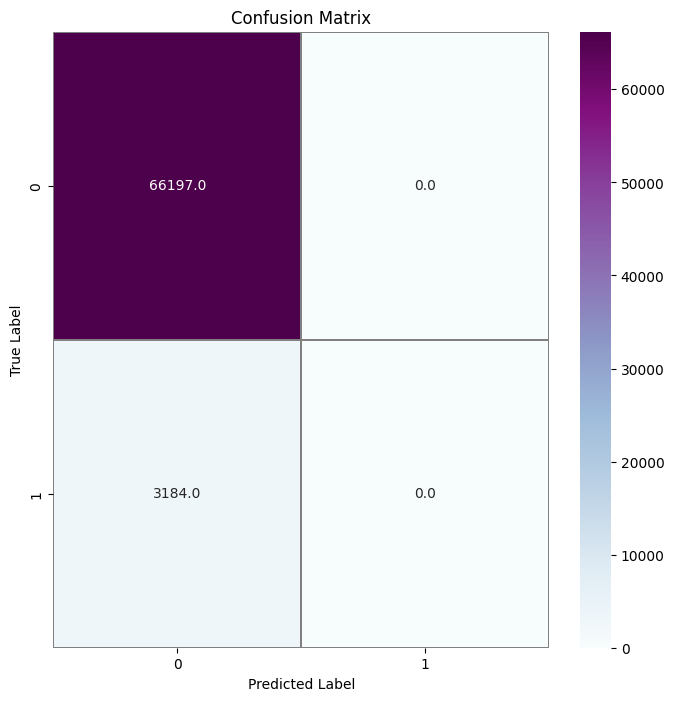

In [55]:
from sklearn.metrics import confusion_matrix
Y_pred = model.predict(X_test)
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
Y_true = np.argmax(y_test,axis = 1) 
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="BuPu",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [56]:
prediction = model.predict(X_test)
prediction

2169/2169 [==============================] - 29s 13ms/step


array([[0.9453161 , 0.05468394],
       [0.9453161 , 0.05468394],
       [0.9453161 , 0.05468394],
       ...,
       [0.9453161 , 0.05468394],
       [0.9453161 , 0.05468394],
       [0.9453161 , 0.05468394]], dtype=float32)

Test accuracy for VGG16 applied on this dataset is 95.41%